In [1]:
# only adjust settings in this cell
state = 'AL'
root_name = 'Jefferson'# which county will root our district (or county_cluster==multi-district)?
k = 7                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 2               # size=1 for single district, size=2 for double district, ...
time_limit = 48*3600   # time limit in seconds

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size
G._time_limit = time_limit

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 7 districts
We seek a multi-district (county cluster) of size = 2


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 717754
Single district upper population limit U = 717755


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Jefferson County to be the root. In our graph, this is vertex # 22


In [6]:
import simple_enumerator
districts = simple_enumerator.simple_enumerator(G)

Sol# Node# Time(s) district
1 15608 0.12 [22, 45, 0, 64, 14, 26, 43, 36, 33, 56, 54, 39]
2 37976 0.3 [22, 45, 0, 64, 14, 43, 54, 39, 33, 46, 51, 40]
3 143594 1.22 [22, 45, 0, 64, 58, 50, 26, 43, 52, 54]
4 146638 1.25 [22, 45, 0, 64, 58, 50, 2, 36, 17, 56, 54, 39]
5 238484 2.14 [22, 45, 0, 64, 58, 26, 43, 36, 33, 46, 40, 13, 20, 53]
6 281860 2.53 [22, 45, 0, 64, 58, 26, 32, 39, 33, 1, 9, 56]
7 319564 2.9 [22, 45, 0, 64, 58, 2, 43, 17, 56, 65, 9, 46, 40, 53]
8 403960 3.69 [22, 45, 0, 64, 58, 43, 52, 36, 33, 32, 17, 46, 54, 37]
9 443019 4.04 [22, 45, 0, 64, 58, 43, 36, 33, 32, 65, 46, 40, 20, 54, 37]
10 742840 7.06 [22, 45, 0, 64, 23, 52, 2, 43, 36, 33, 9, 17, 46, 39]
11 746505 7.1 [22, 45, 0, 64, 23, 52, 2, 43, 17, 39, 33, 46, 40, 53, 37]
12 895149 8.59 [22, 45, 0, 64, 23, 57, 2, 43, 17, 54, 32, 39, 33, 46, 40]
13 899367 8.62 [22, 45, 0, 64, 23, 57, 2, 43, 39, 33, 46, 51, 40, 53, 37]
14 914460 8.78 [22, 45, 0, 64, 23, 57, 2, 56, 33, 9, 51, 40, 53, 39]
15 933764 8.97 [22, 45, 0, 64, 23, 5

109 13159044 140.34 [22, 45, 0, 58, 23, 2, 43, 17, 56, 33, 9, 51, 65, 54, 37, 39]
110 13379071 142.68 [22, 45, 0, 58, 23, 2, 17, 56, 33, 9, 51, 40, 11, 65, 37]
111 13440783 143.33 [22, 45, 0, 58, 23, 43, 4, 24, 36, 33, 1, 9, 32]
112 13461397 143.54 [22, 45, 0, 58, 23, 43, 4, 36, 33, 1, 46, 40, 20, 53, 39]
113 13511592 144.07 [22, 45, 0, 58, 23, 43, 36, 33, 1, 9, 51, 65, 53, 37]
114 13531472 144.3 [22, 45, 0, 58, 23, 43, 36, 33, 9, 11, 65, 46, 40, 13, 53, 37]
115 13561429 144.63 [22, 45, 0, 58, 23, 43, 36, 33, 46, 51, 48, 40, 54, 37, 39]
116 13956106 148.45 [22, 45, 0, 58, 50, 28, 62, 32, 24, 53, 46, 37]
117 13995344 148.88 [22, 45, 0, 58, 50, 28, 1, 2, 56, 65, 46, 53, 13, 39]
118 14193625 150.78 [22, 45, 0, 58, 50, 28, 54, 39, 33, 9, 56, 46, 40, 20, 53]
119 14365900 152.49 [22, 45, 0, 58, 50, 26, 2, 36, 56, 65, 9, 11, 46, 40, 20, 37]
120 14630438 155.34 [22, 45, 0, 58, 50, 26, 4, 24, 44, 36, 33, 46, 40, 20]
121 14730681 156.47 [22, 45, 0, 58, 50, 26, 36, 33, 56, 46, 54, 8, 63, 61, 37]


212 36002154 376.51 [22, 45, 0, 58, 2, 36, 33, 65, 56, 46, 51, 40, 20, 54, 8, 63, 61, 39]
213 36093284 377.43 [22, 45, 0, 58, 2, 36, 32, 8, 17, 56, 65, 9, 11, 46, 40, 13, 53, 37]
214 36998795 386.85 [22, 45, 0, 58, 2, 17, 56, 33, 1, 9, 51, 40, 11, 13, 65, 20, 46]
215 37007659 386.95 [22, 45, 0, 58, 2, 17, 56, 33, 1, 65, 11, 54, 8, 53, 40, 37, 39]
216 37211980 389.07 [22, 45, 0, 58, 2, 56, 33, 9, 51, 11, 65, 54, 21, 37]
217 38902459 409.13 [22, 45, 0, 58, 43, 52, 36, 33, 9, 32, 8, 17, 46, 40, 53, 37, 39]
218 39254154 413.14 [22, 45, 0, 58, 43, 52, 54, 8, 39, 33, 1, 9, 46, 53, 13, 37]
219 39346786 414.12 [22, 45, 0, 58, 43, 4, 35, 24, 8, 36, 33, 46, 53, 13, 55, 39]
220 40108841 422.7 [22, 45, 0, 58, 43, 4, 24, 32, 54, 39, 33, 46, 40, 13, 20, 53, 62]
221 40593188 427.98 [22, 45, 0, 58, 43, 4, 36, 37, 1, 53, 13, 55, 61, 63, 8, 39]
222 40812628 430.39 [22, 45, 0, 58, 43, 4, 54, 8, 63, 61, 39, 33, 9, 51, 20, 46, 53, 13]
223 40956741 431.95 [22, 45, 0, 58, 43, 36, 33, 1, 9, 51, 20, 46, 54, 53

316 54718517 579.08 [22, 45, 0, 23, 28, 1, 43, 17, 46, 51, 20, 54, 32, 53, 13, 55, 37]
317 54773867 579.64 [22, 45, 0, 23, 28, 1, 43, 46, 54, 8, 44, 24, 53, 37, 39]
318 54790855 579.79 [22, 45, 0, 23, 28, 1, 43, 54, 53, 13, 29, 55, 5]
319 54837776 580.26 [22, 45, 0, 23, 28, 1, 36, 46, 54, 53, 13, 29, 30, 20]
320 54928618 581.19 [22, 45, 0, 23, 28, 1, 46, 54, 8, 53, 13, 55, 61, 39, 56, 65]
321 55085612 582.68 [22, 45, 0, 23, 28, 52, 19, 26, 2, 43, 17, 56, 65, 9, 46, 37]
322 56523875 597.96 [22, 45, 0, 23, 28, 57, 15, 26, 54, 32, 37, 33, 9, 65, 56, 46, 53]
323 56633292 599.45 [22, 45, 0, 23, 28, 57, 15, 36, 33, 9, 51, 40, 11, 54, 32, 39]
324 57421535 607.8 [22, 45, 0, 23, 28, 57, 43, 36, 33, 9, 46, 40, 54, 8, 24]
325 57421560 607.81 [22, 45, 0, 23, 28, 57, 43, 36, 33, 9, 46, 40, 54, 8, 32, 39]
326 57671146 610.51 [22, 45, 0, 23, 28, 57, 54, 8, 39, 33, 9, 51, 40, 13, 65, 53]
327 58387280 618.14 [22, 45, 0, 23, 28, 2, 43, 36, 33, 9, 51, 40, 17, 65, 56, 20, 46, 39]
328 58487187 619.41 [22, 

413 87023393 949.0 [22, 45, 0, 23, 26, 36, 33, 9, 51, 40, 54, 8, 24, 63, 4, 53, 37]
414 87023628 949.01 [22, 45, 0, 23, 26, 36, 33, 9, 51, 40, 54, 8, 63, 32, 4, 53, 37, 39]
415 87131039 950.22 [22, 45, 0, 23, 26, 36, 33, 9, 46, 40, 13, 55, 54, 32, 24, 4, 61, 53, 39]
416 87383769 953.2 [22, 45, 0, 23, 26, 36, 33, 54, 8, 63, 61, 55, 29, 13, 39]
417 87387776 953.24 [22, 45, 0, 23, 26, 36, 54, 21, 32, 37, 39, 56, 65, 9, 51, 20]
418 87459760 954.08 [22, 45, 0, 23, 26, 36, 54, 32, 37, 1, 46, 40, 30, 6, 13, 20, 53, 39]
419 87764265 957.68 [22, 45, 0, 23, 26, 54, 8, 63, 32, 37, 1, 33, 46, 51, 40, 20, 53]
420 88115278 961.66 [22, 45, 0, 23, 26, 54, 32, 37, 1, 33, 9, 51, 56, 53, 13, 29]
421 88750953 968.83 [22, 45, 0, 23, 2, 43, 36, 33, 9, 51, 40, 13, 55, 65, 56, 54, 32, 61, 39]
422 88799119 969.38 [22, 45, 0, 23, 2, 43, 36, 33, 9, 51, 46, 54, 8, 63, 32, 61, 53, 37, 39]
423 89172231 973.91 [22, 45, 0, 23, 2, 43, 36, 17, 56, 54, 32, 37, 1, 46, 51, 53, 13, 55, 61]
424 89181076 974.01 [22, 45, 0, 2

513 104773898 1145.75 [22, 45, 0, 50, 28, 26, 37, 33, 65, 11, 56, 46, 40, 13, 55, 61, 63, 53]
514 104794696 1145.95 [22, 45, 0, 50, 28, 26, 39, 33, 46, 40, 13, 29, 7, 20]
515 105120662 1149.64 [22, 45, 0, 50, 28, 2, 43, 56, 33, 9, 51, 40, 13, 65, 54, 8]
516 105506860 1153.82 [22, 45, 0, 50, 28, 2, 17, 52, 56, 65, 9, 51, 40, 11, 13, 46, 53, 39]
517 106157003 1161.28 [22, 45, 0, 50, 28, 43, 36, 33, 9, 51, 48, 46, 54, 8, 32]
518 106516554 1165.45 [22, 45, 0, 50, 28, 43, 54, 8, 32, 37, 33, 46, 51, 48, 40, 53]
519 106849826 1169.48 [22, 45, 0, 50, 28, 36, 33, 46, 40, 20, 54, 8, 44, 24, 4, 39]
520 106881142 1169.83 [22, 45, 0, 50, 28, 36, 39, 56, 65, 9, 11, 46, 53, 13, 29, 55]
521 107860827 1180.89 [22, 45, 0, 50, 26, 2, 43, 36, 33, 1, 17, 56, 46, 51, 40, 13, 54, 32, 39]
522 108037901 1182.9 [22, 45, 0, 50, 26, 2, 43, 36, 33, 17, 46, 51, 40, 20, 54, 8, 32, 53, 37]
523 108421215 1187.01 [22, 45, 0, 50, 26, 2, 43, 17, 54, 32, 37, 1, 46, 9, 53, 13, 55, 61, 39]
524 108483802 1187.65 [22, 45, 0, 

607 130124897 1435.99 [22, 45, 0, 50, 36, 33, 1, 54, 8, 44, 63, 61, 53, 40, 13, 20, 37]
608 130316391 1438.09 [22, 45, 0, 50, 36, 33, 9, 51, 40, 13, 55, 5, 20, 54, 32, 61, 63, 53, 39]
609 130443465 1439.71 [22, 45, 0, 50, 36, 33, 9, 51, 20, 46, 54, 32, 24, 53, 13, 55, 7]
610 130648950 1442.19 [22, 45, 0, 50, 36, 33, 9, 46, 40, 54, 8, 24, 32, 53, 62, 39]
611 130667774 1442.39 [22, 45, 0, 50, 36, 33, 9, 54, 8, 63, 32, 61, 55, 7, 37, 39]
612 131300149 1449.64 [22, 45, 0, 50, 36, 54, 8, 44, 24, 63, 61, 55, 13, 53, 46, 51, 20]
613 131308992 1449.72 [22, 45, 0, 50, 36, 54, 8, 44, 63, 32, 61, 55, 13, 53, 46, 51, 20, 39]
614 131427418 1450.95 [22, 45, 0, 50, 36, 54, 8, 37, 1, 62, 53, 13, 39, 56, 65, 9]
615 131540513 1452.26 [22, 45, 0, 50, 36, 54, 37, 1, 46, 9, 11, 65, 53, 13, 29, 55, 39]
616 131644311 1453.33 [22, 45, 0, 50, 54, 21, 8, 24, 63, 61, 55, 39, 33]
617 131793437 1454.78 [22, 45, 0, 50, 54, 8, 44, 63, 39, 33, 46, 51, 40, 53, 62]
618 132106640 1458.12 [22, 45, 0, 50, 54, 8, 63, 32, 3

704 152152160 1681.86 [22, 45, 0, 28, 1, 26, 2, 56, 65, 54, 8, 32, 53, 40, 13, 55, 20, 39]
705 152341341 1684.11 [22, 45, 0, 28, 1, 26, 2, 46, 40, 13, 29, 55, 54, 61, 63, 37, 39]
706 152496664 1686.03 [22, 45, 0, 28, 1, 26, 43, 52, 19, 46, 9, 40, 54, 8, 32, 37]
707 152545655 1686.66 [22, 45, 0, 28, 1, 26, 43, 52, 57, 36, 17, 46, 9, 40, 20, 54, 32, 53, 39]
708 152713026 1688.57 [22, 45, 0, 28, 1, 26, 43, 52, 36, 54, 8, 63, 32, 61, 53, 40, 20, 39]
709 153218291 1694.31 [22, 45, 0, 28, 1, 26, 43, 17, 46, 51, 40, 13, 55, 7, 20, 54, 39]
710 153253770 1694.72 [22, 45, 0, 28, 1, 26, 43, 17, 46, 40, 20, 54, 8, 63, 61, 55, 53, 37]
711 153537664 1697.82 [22, 45, 0, 28, 1, 26, 43, 54, 8, 63, 53, 40, 51, 9, 13, 65, 20, 39]
712 153609494 1698.57 [22, 45, 0, 28, 1, 26, 36, 46, 9, 51, 40, 30, 29, 54, 37, 39]
713 153730711 1699.91 [22, 45, 0, 28, 1, 26, 36, 46, 51, 20, 30, 6, 54, 8, 32, 53, 39]
714 154092130 1703.98 [22, 45, 0, 28, 1, 26, 46, 51, 40, 13, 29, 55, 6, 54, 53, 37]
715 154178674 1704.98 [2

796 204415485 2287.24 [22, 45, 0, 26, 2, 43, 52, 17, 56, 33, 1, 9, 65, 46, 54, 8, 63, 32, 39]
797 204775563 2291.56 [22, 45, 0, 26, 2, 43, 52, 17, 54, 21, 62, 53, 46, 9, 37]
798 206521701 2311.61 [22, 45, 0, 26, 2, 43, 36, 33, 1, 9, 51, 40, 13, 29, 65, 56, 46, 37, 39]
799 206846856 2315.82 [22, 45, 0, 26, 2, 43, 36, 33, 1, 17, 56, 46, 40, 13, 55, 54, 8, 53, 37, 39]
800 208167470 2332.88 [22, 45, 0, 26, 2, 43, 36, 33, 17, 65, 56, 46, 40, 13, 54, 8, 53, 62, 37, 39]
801 208490214 2337.04 [22, 45, 0, 26, 2, 43, 36, 33, 65, 11, 56, 46, 40, 13, 29, 54, 8, 32, 37, 39]
802 209758742 2351.86 [22, 45, 0, 26, 2, 43, 36, 56, 54, 8, 63, 61, 37, 1, 46, 9, 51, 40, 13, 20]
803 210305324 2358.08 [22, 45, 0, 26, 2, 43, 17, 56, 33, 9, 51, 46, 54, 53, 62, 13, 29, 39]
804 210799330 2364.0 [22, 45, 0, 26, 2, 43, 17, 56, 65, 9, 11, 46, 1, 40, 20, 54, 8, 63, 32, 61]
805 210863399 2364.77 [22, 45, 0, 26, 2, 43, 17, 56, 65, 9, 46, 40, 13, 54, 8, 63, 53, 62, 39]
806 210958545 2365.85 [22, 45, 0, 26, 2, 43, 17, 5

886 268238673 3036.07 [22, 45, 0, 26, 36, 54, 21, 62, 63, 32, 61, 53, 46, 51, 20, 39, 56]
887 268281665 3036.47 [22, 45, 0, 26, 36, 54, 21, 63, 32, 61, 55, 5, 13, 40, 51, 46, 53]
888 268292496 3036.57 [22, 45, 0, 26, 36, 54, 21, 63, 61, 55, 13, 40, 51, 20, 53, 1]
889 268500742 3038.72 [22, 45, 0, 26, 36, 54, 8, 24, 63, 4, 37, 1, 53, 40, 51, 9, 13, 55]
890 268677601 3040.59 [22, 45, 0, 26, 36, 54, 8, 63, 32, 4, 37, 1, 53, 40, 51, 9, 13, 55, 39]
891 268825642 3042.15 [22, 45, 0, 26, 36, 54, 8, 32, 37, 1, 46, 9, 51, 40, 13, 55, 20, 61, 39, 56]
892 269529297 3049.78 [22, 45, 0, 26, 54, 21, 62, 32, 53, 40, 13, 55, 5, 37, 39]
893 269653050 3051.09 [22, 45, 0, 26, 54, 21, 8, 32, 39, 33, 1, 9, 65, 56, 46, 53]
894 269698466 3051.5 [22, 45, 0, 26, 54, 21, 63, 32, 24, 44, 39, 33, 9, 51, 40, 46]
895 269906921 3053.67 [22, 45, 0, 26, 54, 21, 63, 39, 33, 1, 65, 11, 53, 13, 29]
896 272468381 3081.73 [22, 45, 0, 26, 54, 8, 63, 32, 4, 61, 55, 13, 37, 1, 33, 9, 51, 20, 46]
897 273480027 3093.59 [22, 45,

976 363780253 4188.44 [22, 45, 0, 43, 36, 33, 9, 51, 40, 13, 29, 7, 65, 54, 8, 53, 39]
977 363927607 4190.14 [22, 45, 0, 43, 36, 33, 9, 51, 40, 13, 46, 54, 21, 32, 24, 4, 35]
978 363975725 4190.69 [22, 45, 0, 43, 36, 33, 9, 51, 40, 46, 54, 21, 8, 32, 4, 53, 37]
979 365434152 4208.64 [22, 45, 0, 43, 36, 33, 9, 17, 46, 53, 62, 21, 8, 32]
980 365866731 4214.35 [22, 45, 0, 43, 36, 33, 9, 46, 40, 20, 48, 54, 21, 8, 63]
981 365934198 4215.19 [22, 45, 0, 43, 36, 33, 9, 54, 21, 63, 32, 24, 61, 55, 13, 53, 37, 39]
982 367509228 4234.58 [22, 45, 0, 43, 36, 33, 65, 11, 56, 46, 51, 54, 53, 62, 13, 29, 55, 61]
983 368271748 4243.74 [22, 45, 0, 43, 36, 33, 65, 46, 51, 40, 13, 29, 7, 55, 20, 61, 63, 39]
984 369143187 4253.83 [22, 45, 0, 43, 36, 33, 46, 51, 40, 30, 6, 20, 54, 8, 32, 53, 62]
985 369171474 4254.16 [22, 45, 0, 43, 36, 33, 46, 51, 40, 13, 29, 55, 61, 63, 8, 24, 53, 39]
986 369315384 4255.87 [22, 45, 0, 43, 36, 33, 46, 51, 53, 13, 55, 61, 63, 21, 8, 32]
987 369499694 4257.97 [22, 45, 0, 43

1072 409520879 4731.81 [22, 45, 64, 14, 27, 26, 28, 1, 2, 36, 17, 52, 57, 37, 39]
1073 409555155 4732.17 [22, 45, 64, 14, 27, 26, 28, 1, 43, 4, 24, 32, 46, 51, 40]
1074 409571869 4732.33 [22, 45, 64, 14, 27, 26, 28, 1, 43, 36, 46, 40, 13, 53, 39, 56, 65]
1075 409597571 4732.6 [22, 45, 64, 14, 27, 26, 28, 1, 4, 36, 53, 40, 13, 55, 20]
1076 409644627 4733.06 [22, 45, 64, 14, 27, 26, 28, 2, 43, 52, 17, 56, 65, 54, 8]
1077 409694738 4733.57 [22, 45, 64, 14, 27, 26, 28, 2, 43, 54, 8, 63, 61, 37, 33, 46]
1078 409803083 4734.65 [22, 45, 64, 14, 27, 26, 28, 2, 56, 33, 9, 54, 8, 63, 61]
1079 410067828 4737.69 [22, 45, 64, 14, 27, 26, 28, 36, 33, 46, 40, 54, 8, 24, 53, 39]
1080 410157434 4738.63 [22, 45, 64, 14, 27, 26, 2, 43, 52, 57, 36, 33, 9, 17, 56, 46, 53, 39]
1081 411112333 4749.23 [22, 45, 64, 14, 27, 26, 2, 17, 52, 57, 56, 33, 9, 51, 40, 13, 39]
1082 411253752 4750.86 [22, 45, 64, 14, 27, 26, 43, 52, 19, 57, 36, 33, 9, 51, 20, 46]
1083 411551738 4754.56 [22, 45, 64, 14, 27, 26, 43, 4, 24

1168 430836179 4964.49 [22, 45, 64, 14, 58, 50, 54, 39, 33, 1, 62, 56, 53, 40, 37]
1169 431418397 4970.3 [22, 45, 64, 14, 58, 35, 34, 43, 32, 54, 28, 37, 33, 9, 46]
1170 431436583 4970.48 [22, 45, 64, 14, 58, 35, 34, 43, 39, 33, 1, 9, 53, 40, 13]
1171 431504944 4971.17 [22, 45, 64, 14, 58, 35, 34, 36, 33, 1, 32, 54, 53, 40, 13, 39]
1172 431861945 4975.11 [22, 45, 64, 14, 58, 35, 26, 28, 1, 4, 36, 32, 53, 40, 51, 20, 37]
1173 435427828 5015.65 [22, 45, 64, 14, 58, 35, 26, 43, 4, 32, 8, 63, 61, 55, 37, 1]
1174 435628991 5018.07 [22, 45, 64, 14, 58, 35, 26, 43, 36, 33, 1, 32, 8, 46, 51, 20, 54]
1175 444325821 5121.1 [22, 45, 64, 14, 58, 35, 43, 4, 24, 32, 54, 28, 1, 53, 40, 51, 37]
1176 445832930 5140.19 [22, 45, 64, 14, 58, 35, 43, 32, 8, 63, 54, 61, 55, 13, 39, 33, 9, 46]
1177 446226748 5145.1 [22, 45, 64, 14, 58, 35, 43, 54, 28, 62, 53, 13, 46, 9, 51, 20]
1178 446525755 5148.35 [22, 45, 64, 14, 58, 35, 4, 24, 44, 36, 33, 1, 9, 46, 40, 20, 54]
1179 446534635 5148.47 [22, 45, 64, 14, 58,

1258 479817534 5531.37 [22, 45, 64, 14, 58, 43, 52, 19, 15, 32, 39, 33, 1, 9, 51, 46]
1259 479999741 5533.3 [22, 45, 64, 14, 58, 43, 52, 19, 57, 17, 54, 39, 33, 9, 51, 40, 46, 53, 37]
1260 480261270 5536.17 [22, 45, 64, 14, 58, 43, 52, 19, 36, 33, 1, 17, 54, 8, 63, 37]
1261 480291427 5536.49 [22, 45, 64, 14, 58, 43, 52, 19, 36, 33, 9, 51, 54, 8, 63, 61, 39]
1262 480384107 5537.47 [22, 45, 64, 14, 58, 43, 52, 19, 36, 32, 8, 37, 1, 46, 40, 20, 39]
1263 481074056 5544.68 [22, 45, 64, 14, 58, 43, 52, 57, 36, 33, 1, 9, 51, 54, 8, 39]
1264 481185576 5545.94 [22, 45, 64, 14, 58, 43, 52, 57, 36, 33, 32, 8, 46, 53, 13, 55, 61, 39]
1265 481380344 5548.09 [22, 45, 64, 14, 58, 43, 52, 57, 32, 17, 39, 33, 46, 51, 20, 53, 62, 37]
1266 481460824 5549.01 [22, 45, 64, 14, 58, 43, 52, 57, 54, 28, 1, 46, 40, 13, 20, 53, 37, 39]
1267 482855638 5564.44 [22, 45, 64, 14, 58, 43, 52, 36, 33, 46, 54, 21, 28, 53]
1268 483003107 5565.89 [22, 45, 64, 14, 58, 43, 52, 32, 8, 63, 17, 54, 61, 39, 33, 1, 9]
1269 48357

1352 506552439 5825.36 [22, 45, 64, 14, 23, 50, 2, 36, 17, 56, 65, 9, 51, 46, 53, 13, 55, 61, 37]
1353 506584196 5825.7 [22, 45, 64, 14, 23, 50, 2, 17, 56, 33, 9, 65, 46, 40, 53, 37, 28, 39]
1354 506613554 5826.0 [22, 45, 64, 14, 23, 50, 2, 56, 33, 1, 28, 46, 51, 40, 53, 39]
1355 506908677 5829.25 [22, 45, 64, 14, 23, 50, 43, 4, 36, 32, 54, 37, 1, 46, 9, 40, 13, 53, 39]
1356 507103264 5831.38 [22, 45, 64, 14, 23, 50, 43, 36, 33, 46, 51, 48, 40, 20, 37, 28]
1357 507568777 5836.32 [22, 45, 64, 14, 23, 50, 4, 32, 39, 33, 1, 28, 9, 51, 40]
1358 507853730 5839.25 [22, 45, 64, 14, 23, 52, 19, 38, 15, 57, 43, 39, 33, 9, 46, 37]
1359 508312978 5843.77 [22, 45, 64, 14, 23, 52, 19, 38, 39, 33, 46, 40, 13, 29, 53, 37]
1360 509465142 5856.39 [22, 45, 64, 14, 23, 52, 19, 15, 43, 36, 33, 17, 46, 51, 53, 37, 28, 39]
1361 511384859 5877.3 [22, 45, 64, 14, 23, 52, 19, 57, 26, 28, 1, 43, 17, 46, 54, 53, 37]
1362 511749366 5881.5 [22, 45, 64, 14, 23, 52, 19, 57, 26, 36, 33, 1, 9, 51, 20, 53, 37, 39]
1363

1440 581409354 6683.6 [22, 45, 64, 14, 23, 57, 43, 4, 39, 33, 9, 46, 53, 62, 13, 55, 61, 63]
1441 581449133 6684.02 [22, 45, 64, 14, 23, 57, 43, 36, 33, 1, 62, 9, 51, 65, 46, 53, 13]
1442 581457098 6684.11 [22, 45, 64, 14, 23, 57, 43, 36, 33, 1, 28, 9, 51, 11, 65, 20, 46, 53]
1443 581470865 6684.25 [22, 45, 64, 14, 23, 57, 43, 36, 33, 1, 28, 17, 46, 51, 40, 20, 54, 53, 39]
1444 581557668 6685.22 [22, 45, 64, 14, 23, 57, 43, 36, 33, 9, 51, 40, 30, 13, 53, 37, 28, 54]
1445 581723317 6687.16 [22, 45, 64, 14, 23, 57, 43, 36, 33, 46, 40, 13, 55, 5, 20, 53, 37, 28, 54]
1446 581899086 6688.96 [22, 45, 64, 14, 23, 57, 43, 39, 33, 1, 28, 9, 51, 40, 56, 20, 54, 32]
1447 581907097 6689.04 [22, 45, 64, 14, 23, 57, 43, 39, 33, 1, 28, 65, 56, 54, 8, 63, 32]
1448 581985245 6689.86 [22, 45, 64, 14, 23, 57, 43, 39, 33, 9, 46, 40, 13, 55, 20, 61, 63, 37, 28]
1449 582834285 6699.1 [22, 45, 64, 14, 23, 57, 4, 36, 33, 1, 32, 8, 63, 46, 51, 54, 61, 53, 13]
1450 583124695 6702.3 [22, 45, 64, 14, 23, 57, 4, 3

1529 613562702 7051.92 [22, 45, 64, 14, 23, 36, 33, 65, 46, 51, 53, 62, 21, 54, 37, 39]
1530 613674054 7053.08 [22, 45, 64, 14, 23, 36, 33, 46, 40, 13, 29, 37, 28, 62, 54, 39]
1531 613807310 7054.43 [22, 45, 64, 14, 23, 36, 37, 1, 53, 40, 30, 48, 13, 55, 20, 61, 63, 39]
1532 614437313 7060.8 [22, 45, 64, 14, 50, 47, 66, 39, 33, 9, 56, 46, 37]
1533 614755891 7063.74 [22, 45, 64, 14, 50, 47, 35, 4, 36, 33, 1, 53, 40, 51, 39]
1534 615362295 7069.58 [22, 45, 64, 14, 50, 47, 2, 39, 33, 1, 28, 46, 54, 53, 37]
1535 615991032 7075.63 [22, 45, 64, 14, 50, 66, 15, 57, 43, 4, 24, 39, 33, 9, 46, 37]
1536 616004461 7075.75 [22, 45, 64, 14, 50, 66, 15, 57, 4, 24, 36, 33, 32, 46, 54, 37, 39]
1537 616052641 7076.2 [22, 45, 64, 14, 50, 66, 15, 26, 2, 36, 33, 17, 65, 11, 56, 37, 39]
1538 616168359 7077.28 [22, 45, 64, 14, 50, 66, 15, 2, 36, 33, 1, 46, 40, 13, 20]
1539 616287977 7078.46 [22, 45, 64, 14, 50, 66, 15, 36, 33, 1, 9, 51, 65, 53, 39]
1540 616292419 7078.51 [22, 45, 64, 14, 50, 66, 15, 36, 33, 

1619 679143303 7810.47 [22, 45, 64, 14, 50, 43, 4, 24, 8, 63, 36, 32, 61, 37, 1, 62, 39]
1620 679438193 7813.99 [22, 45, 64, 14, 50, 43, 4, 24, 8, 36, 54, 28, 1, 46, 9, 51, 53]
1621 681140039 7835.61 [22, 45, 64, 14, 50, 43, 4, 36, 33, 9, 51, 40, 32, 8, 63, 13, 20, 46, 54, 53, 37]
1622 681227412 7836.65 [22, 45, 64, 14, 50, 43, 4, 36, 33, 9, 51, 32, 54, 21, 63, 61, 37, 39]
1623 681793843 7843.61 [22, 45, 64, 14, 50, 43, 4, 36, 33, 46, 51, 20, 37, 28, 21, 54, 39]
1624 682522369 7851.9 [22, 45, 64, 14, 50, 43, 4, 32, 54, 28, 62, 1, 33, 53, 40, 20, 37]
1625 683970586 7870.15 [22, 45, 64, 14, 50, 43, 36, 37, 28, 62, 1, 46, 9, 51, 40, 65]
1626 683991467 7870.37 [22, 45, 64, 14, 50, 43, 36, 37, 28, 1, 46, 51, 48, 40, 13, 55, 20]
1627 684441099 7875.83 [22, 45, 64, 14, 50, 43, 39, 33, 1, 9, 46, 40, 13, 55, 7, 6, 53]
1628 684587072 7877.52 [22, 45, 64, 14, 50, 43, 39, 33, 9, 56, 46, 40, 13, 53, 37, 28, 54, 8, 63, 61]
1629 684594642 7877.6 [22, 45, 64, 14, 50, 43, 39, 33, 9, 46, 40, 13, 55, 7, 

1709 874639269 10226.79 [22, 45, 64, 14, 26, 28, 21, 8, 44, 36, 33, 46, 54, 53, 13, 37, 39]
1710 874724077 10227.82 [22, 45, 64, 14, 26, 28, 21, 8, 63, 2, 36, 33, 32, 17, 46, 53, 39]
1711 874735037 10227.95 [22, 45, 64, 14, 26, 28, 21, 8, 63, 2, 56, 33, 46, 40, 20, 53, 39]
1712 874748568 10228.11 [22, 45, 64, 14, 26, 28, 21, 8, 63, 43, 36, 33, 9, 11, 65, 37]
1713 874901081 10229.9 [22, 45, 64, 14, 26, 28, 21, 8, 36, 33, 46, 51, 40, 30, 37]
1714 875065223 10231.76 [22, 45, 64, 14, 26, 28, 21, 1, 63, 2, 43, 17, 46, 40, 13, 61, 53]
1715 875164198 10233.1 [22, 45, 64, 14, 26, 28, 21, 1, 63, 43, 36, 54, 32, 53, 40, 20, 37, 39]
1716 875477476 10236.47 [22, 45, 64, 14, 26, 28, 21, 1, 2, 43, 36, 56, 65, 11, 46, 53, 13, 39]
1717 875641551 10238.15 [22, 45, 64, 14, 26, 28, 21, 1, 43, 46, 51, 54, 53, 13, 55, 61, 37]
1718 875701828 10238.76 [22, 45, 64, 14, 26, 28, 21, 1, 46, 9, 40, 13, 55, 65, 56, 37]
1719 875716155 10238.9 [22, 45, 64, 14, 26, 28, 21, 1, 53, 40, 30, 13, 55, 20, 39]
1720 87605486

1794 951145766 11151.48 [22, 45, 64, 14, 26, 2, 43, 36, 33, 9, 51, 40, 17, 13, 55, 46, 61, 63, 8, 32, 37, 39]
1795 951731606 11158.66 [22, 45, 64, 14, 26, 2, 43, 36, 56, 65, 11, 37, 1, 62, 21, 63]
1796 951934393 11161.26 [22, 45, 64, 14, 26, 2, 43, 17, 56, 33, 9, 65, 46, 40, 13, 55, 20, 61, 63, 8, 54, 53, 39]
1797 952407098 11167.01 [22, 45, 64, 14, 26, 2, 43, 56, 33, 1, 62, 21, 65, 11, 53, 13]
1798 952407402 11167.01 [22, 45, 64, 14, 26, 2, 43, 56, 33, 1, 62, 21, 46, 40, 20, 53]
1799 974736455 11446.22 [22, 45, 64, 14, 26, 2, 36, 33, 9, 51, 40, 13, 29, 7, 55, 46, 61, 53, 37]
1800 975074826 11450.19 [22, 45, 64, 14, 26, 2, 36, 33, 9, 46, 53, 62, 13, 55, 61, 63, 8, 32, 37, 39]
1801 975423476 11454.4 [22, 45, 64, 14, 26, 2, 36, 33, 17, 46, 51, 20, 53, 62, 21, 63, 54, 39]
1802 975761050 11458.4 [22, 45, 64, 14, 26, 2, 36, 17, 52, 57, 15, 56, 65, 9, 46, 40, 13, 55, 61, 63, 37, 39]
1803 976288263 11464.49 [22, 45, 64, 14, 26, 2, 17, 52, 19, 38, 56, 65, 9, 51, 11, 20, 37, 1, 53]
1804 9763204

1879 1138212289 13403.45 [22, 45, 64, 14, 2, 17, 52, 19, 57, 56, 65, 9, 46, 40, 53, 62, 28, 37, 39]
1880 1139007771 13412.07 [22, 45, 64, 14, 2, 17, 52, 57, 56, 65, 9, 51, 40, 11, 13, 46, 53, 62, 28]
1881 1139688302 13419.53 [22, 45, 64, 14, 2, 17, 52, 56, 65, 9, 51, 40, 13, 55, 46, 1, 61, 63, 8, 54]
1882 1140845593 13432.76 [22, 45, 64, 14, 2, 17, 56, 33, 9, 46, 53, 37, 28, 54, 8, 63, 61, 55, 7]
1883 1141933696 13445.58 [22, 45, 64, 14, 2, 17, 39, 33, 9, 46, 40, 13, 29, 20, 53, 37, 28, 54, 8, 63]
1884 1142257932 13449.05 [22, 45, 64, 14, 2, 56, 33, 1, 62, 28, 65, 46, 51, 54, 8, 63, 61, 37]
1885 1142866154 13456.11 [22, 45, 64, 14, 2, 56, 33, 1, 53, 40, 13, 55, 7, 61, 63, 8, 32, 54, 37, 39]
1886 1144021363 13469.13 [22, 45, 64, 14, 2, 56, 65, 9, 51, 40, 53, 1, 28, 21, 63, 61, 37]
1887 1144106723 13470.1 [22, 45, 64, 14, 2, 56, 65, 9, 46, 1, 62, 28, 40, 13, 55, 20, 54, 61, 37]
1888 1145627177 13486.91 [22, 45, 64, 14, 43, 52, 19, 38, 15, 36, 33, 46, 51, 40, 13, 55, 61, 53, 39]
1889 1145

1964 1251233244 14728.75 [22, 45, 64, 14, 4, 39, 33, 46, 51, 37, 28, 21, 63, 61, 55, 7]
1965 1251437783 14730.85 [22, 45, 64, 14, 36, 33, 1, 62, 21, 8, 63, 32, 65, 46, 37]
1966 1251465684 14731.12 [22, 45, 64, 14, 36, 33, 1, 62, 21, 65, 11, 56, 46, 54, 32, 53, 13, 39]
1967 1252197858 14739.26 [22, 45, 64, 14, 36, 33, 1, 28, 65, 11, 46, 40, 13, 29, 7, 54, 32, 53]
1968 1252881025 14747.16 [22, 45, 64, 14, 36, 33, 1, 9, 46, 53, 13, 29, 7, 30, 48, 20, 39]
1969 1253044497 14749.24 [22, 45, 64, 14, 36, 33, 1, 65, 46, 51, 20, 53, 13, 55, 61, 63, 21, 54, 32]
1970 1253230289 14751.48 [22, 45, 64, 14, 36, 33, 1, 53, 40, 51, 13, 55, 5, 31, 20, 61, 63, 8, 32, 54, 37]
1971 1253726593 14756.99 [22, 45, 64, 14, 36, 33, 9, 51, 40, 11, 13, 55, 20, 61, 63, 8, 32, 53, 37, 28, 39]
1972 1253813950 14757.97 [22, 45, 64, 14, 36, 33, 9, 51, 40, 13, 55, 5, 18, 20, 61, 53, 62, 37]
1973 1253954409 14759.63 [22, 45, 64, 14, 36, 33, 9, 51, 11, 20, 46, 53, 13, 29, 55, 61, 63, 8, 32, 37, 39]
1974 1255606958 14781.31

2056 1278190250 15023.12 [22, 45, 64, 27, 47, 26, 43, 52, 36, 33, 9, 51, 40, 53, 62, 37]
2057 1278399542 15025.37 [22, 45, 64, 27, 47, 26, 43, 36, 33, 46, 40, 13, 55, 7, 31, 53, 37, 39]
2058 1278747338 15029.15 [22, 45, 64, 27, 47, 26, 37, 1, 33, 9, 51, 40, 13, 55, 56, 20, 46, 61]
2059 1278770586 15029.39 [22, 45, 64, 27, 47, 26, 37, 1, 46, 9, 51, 40, 13, 55, 5, 61, 53, 39]
2060 1278921847 15030.93 [22, 45, 64, 27, 47, 2, 43, 52, 19, 38, 17, 56, 33, 46, 53, 13, 39]
2061 1278979063 15031.51 [22, 45, 64, 27, 47, 2, 43, 52, 19, 17, 56, 33, 9, 51, 40, 46, 53, 37, 39]
2062 1279258961 15034.46 [22, 45, 64, 27, 47, 2, 43, 36, 33, 1, 28, 17, 53, 13, 55, 61, 39]
2063 1279316239 15035.08 [22, 45, 64, 27, 47, 2, 43, 36, 33, 9, 51, 40, 17, 13, 55, 56, 61, 63, 39]
2064 1279417522 15036.18 [22, 45, 64, 27, 47, 2, 43, 36, 33, 46, 53, 62, 13, 55, 61, 63, 37, 39]
2065 1280127200 15043.73 [22, 45, 64, 27, 47, 2, 36, 17, 56, 65, 9, 51, 40, 13, 55, 20, 46, 61, 63, 37]
2066 1280168733 15044.15 [22, 45, 64,

2147 1301786075 15263.65 [22, 45, 64, 27, 58, 23, 54, 28, 39, 33, 9, 51, 48, 40, 46]
2148 1301816364 15263.95 [22, 45, 64, 27, 58, 23, 54, 39, 33, 1, 9, 51, 20, 30, 13, 46]
2149 1302445016 15270.3 [22, 45, 64, 27, 58, 50, 35, 26, 43, 36, 33, 1, 32, 46, 54, 53, 37, 39]
2150 1304273277 15291.52 [22, 45, 64, 27, 58, 50, 35, 32, 54, 39, 33, 1, 9, 51, 40, 46, 53]
2151 1304800516 15296.66 [22, 45, 64, 27, 58, 50, 26, 2, 43, 36, 33, 1, 17, 65, 56, 46, 53, 39]
2152 1304892571 15297.6 [22, 45, 64, 27, 58, 50, 26, 2, 43, 17, 56, 33, 9, 51, 65, 46, 54, 53, 39]
2153 1304921622 15297.89 [22, 45, 64, 27, 58, 50, 26, 2, 43, 56, 65, 9, 46, 40, 13, 55, 37, 39]
2154 1305285172 15301.83 [22, 45, 64, 27, 58, 50, 26, 2, 32, 8, 17, 54, 37, 1, 33, 53]
2155 1305327449 15302.24 [22, 45, 64, 27, 58, 50, 26, 2, 32, 17, 56, 33, 9, 65, 46, 40, 13, 53, 39]
2156 1305391628 15302.87 [22, 45, 64, 27, 58, 50, 26, 2, 17, 56, 33, 9, 51, 40, 11, 65, 46, 53]
2157 1305866024 15307.48 [22, 45, 64, 27, 58, 50, 26, 43, 36, 33,

2234 1356052789 15854.56 [22, 45, 64, 27, 58, 26, 43, 52, 19, 57, 17, 37, 1, 46, 9, 51, 40]
2235 1356066213 15854.69 [22, 45, 64, 27, 58, 26, 43, 52, 19, 57, 54, 39, 33, 9, 51, 40, 13, 46, 53]
2236 1357076149 15865.66 [22, 45, 64, 27, 58, 26, 43, 52, 57, 32, 8, 37, 1, 46, 9, 40, 53]
2237 1357164912 15866.59 [22, 45, 64, 27, 58, 26, 43, 52, 57, 32, 39, 33, 46, 51, 20, 53, 62, 13]
2238 1357266938 15867.65 [22, 45, 64, 27, 58, 26, 43, 52, 57, 39, 33, 1, 62, 46, 40, 20]
2239 1358238721 15878.89 [22, 45, 64, 27, 58, 26, 43, 52, 36, 33, 46, 51, 20, 54, 53, 13, 55, 61, 63, 37, 39]
2240 1358344285 15879.93 [22, 45, 64, 27, 58, 26, 43, 52, 32, 8, 63, 17, 54, 39, 33, 46, 51, 40, 13]
2241 1358659701 15883.13 [22, 45, 64, 27, 58, 26, 43, 52, 17, 37, 1, 33, 46, 51, 20, 53, 13, 55, 61]
2242 1358880603 15885.58 [22, 45, 64, 27, 58, 26, 43, 4, 24, 8, 44, 36, 33, 32, 46, 51, 54, 37, 39]
2243 1359213581 15889.03 [22, 45, 64, 27, 58, 26, 43, 4, 24, 36, 33, 1, 9, 54, 53, 13, 55, 61, 37]
2244 1359342027 15

2320 1397486178 16313.16 [22, 45, 64, 27, 58, 43, 52, 17, 54, 8, 63, 61, 55, 13, 40, 51, 9, 39]
2321 1397601917 16314.36 [22, 45, 64, 27, 58, 43, 52, 54, 21, 63, 61, 55, 39, 33, 9]
2322 1398055448 16319.14 [22, 45, 64, 27, 58, 43, 4, 24, 8, 63, 32, 54, 39, 33, 1, 9, 46, 40]
2323 1398958638 16330.27 [22, 45, 64, 27, 58, 43, 4, 24, 36, 32, 54, 21, 37, 1, 53, 40]
2324 1400578658 16349.25 [22, 45, 64, 27, 58, 43, 4, 36, 32, 54, 28, 62, 1, 46, 9, 53]
2325 1401492807 16359.54 [22, 45, 64, 27, 58, 43, 4, 54, 21, 62, 53, 46, 51, 33, 37]
2326 1401908586 16363.82 [22, 45, 64, 27, 58, 43, 36, 33, 1, 62, 32, 65, 56, 46, 51, 40, 54, 53]
2327 1402199979 16367.52 [22, 45, 64, 27, 58, 43, 36, 33, 1, 9, 32, 65, 56, 53, 13, 55, 7]
2328 1402707286 16373.02 [22, 45, 64, 27, 58, 43, 36, 33, 9, 51, 40, 11, 32, 8, 63, 13, 65, 61, 53, 39]
2329 1402790334 16373.94 [22, 45, 64, 27, 58, 43, 36, 33, 9, 51, 40, 32, 17, 13, 55, 7, 46, 54]
2330 1402825479 16374.34 [22, 45, 64, 27, 58, 43, 36, 33, 9, 51, 40, 13, 29, 

2409 1469497112 17090.3 [22, 45, 64, 27, 23, 66, 50, 15, 57, 26, 39, 33, 46, 53]
2410 1469843803 17093.37 [22, 45, 64, 27, 23, 66, 15, 35, 26, 4, 36, 33, 1, 53, 39]
2411 1469848962 17093.42 [22, 45, 64, 27, 23, 66, 15, 35, 26, 36, 33, 9, 46, 40, 53, 37]
2412 1469890425 17093.8 [22, 45, 64, 27, 23, 66, 15, 35, 43, 4, 39, 33, 46, 51, 40, 20, 37]
2413 1469958265 17094.42 [22, 45, 64, 27, 23, 66, 15, 57, 2, 56, 65, 9, 46, 40, 13, 20, 39]
2414 1470095044 17095.71 [22, 45, 64, 27, 23, 66, 15, 43, 36, 33, 46, 40, 20, 37, 28, 39]
2415 1470129783 17096.03 [22, 45, 64, 27, 23, 66, 15, 39, 33, 1, 28, 54, 53, 13, 37]
2416 1470548005 17100.0 [22, 45, 64, 27, 23, 66, 52, 26, 43, 17, 37, 33, 9, 46, 40, 13, 53]
2417 1470946151 17103.74 [22, 45, 64, 27, 23, 66, 35, 26, 28, 4, 24, 39, 33, 46, 40]
2418 1471609000 17110.03 [22, 45, 64, 27, 23, 66, 57, 26, 36, 33, 46, 53, 13, 30, 6, 39]
2419 1471889676 17112.68 [22, 45, 64, 27, 23, 66, 26, 2, 36, 17, 56, 37, 1, 53, 13, 55]
2420 1472056979 17114.33 [22, 45,

2497 1540116629 17869.14 [22, 45, 64, 27, 23, 35, 4, 24, 8, 36, 33, 1, 9, 32, 54, 53, 40, 13, 39]
2498 1540270061 17870.76 [22, 45, 64, 27, 23, 35, 4, 24, 44, 36, 33, 1, 28, 54, 53, 40, 51]
2499 1540477334 17872.96 [22, 45, 64, 27, 23, 35, 4, 24, 36, 33, 1, 32, 46, 40, 13, 55, 20, 61, 63, 39]
2500 1541298942 17883.03 [22, 45, 64, 27, 23, 35, 4, 36, 33, 9, 32, 46, 53, 37, 28, 21]
2501 1542331171 17894.97 [22, 45, 64, 27, 23, 35, 36, 33, 1, 62, 28, 9, 51, 40, 46]
2502 1543340593 17906.16 [22, 45, 64, 27, 23, 57, 15, 3, 43, 36, 33, 46, 40, 13, 20, 53, 37]
2503 1544373965 17916.9 [22, 45, 64, 27, 23, 57, 15, 26, 28, 2, 43, 36, 33, 9, 17, 65, 56, 46, 39]
2504 1544422301 17917.43 [22, 45, 64, 27, 23, 57, 15, 26, 28, 2, 17, 54, 8, 32, 37, 33, 9]
2505 1544501501 17918.31 [22, 45, 64, 27, 23, 57, 15, 26, 28, 36, 33, 9, 51, 40, 13, 55, 39]
2506 1544547268 17918.82 [22, 45, 64, 27, 23, 57, 15, 26, 28, 54, 37, 33, 65, 11, 56, 46, 51, 40, 20, 53]
2507 1544596129 17919.36 [22, 45, 64, 27, 23, 57, 15

2581 1561770904 18113.12 [22, 45, 64, 27, 23, 26, 39, 33, 1, 46, 53, 13, 29, 7, 30, 20]
2582 1561890726 18114.3 [22, 45, 64, 27, 23, 26, 39, 56, 65, 9, 51, 20, 46, 1, 62, 53, 13, 55]
2583 1561959332 18115.05 [22, 45, 64, 27, 23, 2, 43, 36, 33, 1, 28, 65, 11, 56, 54, 53, 40, 51, 13, 39]
2584 1562529005 18121.83 [22, 45, 64, 27, 23, 2, 43, 36, 56, 65, 9, 11, 37, 1, 53, 40, 13, 55, 61, 63, 39]
2585 1562877115 18125.71 [22, 45, 64, 27, 23, 2, 43, 56, 33, 1, 62, 65, 11, 46, 51, 40, 13, 53, 37]
2586 1562986935 18127.01 [22, 45, 64, 27, 23, 2, 43, 56, 33, 9, 11, 65, 46, 53, 13, 55, 61, 37, 28, 54, 32]
2587 1563019560 18127.4 [22, 45, 64, 27, 23, 2, 43, 56, 33, 65, 11, 46, 40, 13, 55, 7, 37, 28]
2588 1564164607 18141.45 [22, 45, 64, 27, 23, 2, 36, 33, 46, 51, 40, 20, 37, 28, 21, 54, 39]
2589 1564290980 18143.01 [22, 45, 64, 27, 23, 2, 36, 17, 37, 28, 62, 1, 46, 40, 13, 54, 32, 39]
2590 1564881688 18149.6 [22, 45, 64, 27, 23, 2, 17, 39, 33, 9, 51, 40, 53, 37, 28, 21]
2591 1565368797 18154.94 [2

2669 1606383117 18616.37 [22, 45, 64, 27, 50, 26, 28, 62, 1, 33, 9, 2, 36, 56, 46, 37, 39]
2670 1606651443 18619.51 [22, 45, 64, 27, 50, 26, 28, 62, 2, 36, 17, 56, 54, 53, 13, 55, 46, 37, 39]
2671 1607007686 18623.94 [22, 45, 64, 27, 50, 26, 28, 62, 36, 33, 65, 11, 53, 40, 13, 55, 37, 39]
2672 1607075423 18624.64 [22, 45, 64, 27, 50, 26, 28, 62, 54, 8, 32, 53, 46, 9, 51, 65, 20]
2673 1607829681 18633.11 [22, 45, 64, 27, 50, 26, 28, 1, 33, 43, 36, 17, 46, 51, 20, 54, 8, 37, 39]
2674 1608089869 18636.37 [22, 45, 64, 27, 50, 26, 28, 1, 33, 54, 53, 13, 30, 48, 6, 20, 37]
2675 1608519761 18640.99 [22, 45, 64, 27, 50, 26, 28, 1, 2, 56, 65, 11, 54, 32, 53, 40, 51, 13, 20, 37, 39]
2676 1608546504 18641.28 [22, 45, 64, 27, 50, 26, 28, 1, 2, 56, 46, 40, 13, 29, 20, 54, 32, 53]
2677 1608613702 18642.0 [22, 45, 64, 27, 50, 26, 28, 1, 43, 52, 19, 57, 36, 46, 51, 20, 37, 39]
2678 1608639635 18642.26 [22, 45, 64, 27, 50, 26, 28, 1, 43, 52, 57, 36, 17, 46, 9, 54, 32, 53, 39]
2679 1608818508 18644.13 [

2754 1639190549 18985.67 [22, 45, 64, 27, 35, 26, 28, 62, 4, 53, 40, 13, 29, 55, 46, 9, 61]
2755 1639486422 18988.91 [22, 45, 64, 27, 35, 26, 28, 62, 54, 8, 63, 32, 61, 55, 13, 40, 39, 33]
2756 1639691427 18991.17 [22, 45, 64, 27, 35, 26, 28, 62, 53, 40, 51, 9, 13, 29, 55, 37, 39]
2757 1639732001 18991.62 [22, 45, 64, 27, 35, 26, 28, 62, 53, 13, 55, 7, 37, 33, 9, 51, 20]
2758 1640739068 19003.78 [22, 45, 64, 27, 35, 26, 28, 1, 33, 9, 51, 43, 4, 24, 32, 20, 46, 53, 13, 55]
2759 1642093696 19019.22 [22, 45, 64, 27, 35, 26, 28, 1, 33, 9, 4, 24, 36, 46, 40, 13, 55, 61, 63, 37]
2760 1650793454 19122.07 [22, 45, 64, 27, 35, 26, 28, 1, 43, 4, 46, 54, 53, 13, 29, 55, 61, 63, 37, 39]
2761 1650948426 19123.81 [22, 45, 64, 27, 35, 26, 28, 1, 43, 36, 46, 9, 40, 13, 55, 20, 54, 61, 63, 53, 37, 39]
2762 1662973174 19271.56 [22, 45, 64, 27, 35, 26, 28, 43, 4, 24, 8, 63, 61, 55, 13, 40, 51, 53, 39, 33]
2763 1665792948 19307.12 [22, 45, 64, 27, 35, 26, 28, 43, 54, 32, 37, 33, 9, 46, 40, 13, 55, 7, 61, 

2839 1899373200 22084.62 [22, 45, 64, 27, 26, 28, 62, 1, 36, 46, 9, 11, 65, 56, 54, 53, 13, 55, 61, 37]
2840 1899604380 22087.13 [22, 45, 64, 27, 26, 28, 62, 2, 43, 52, 19, 15, 36, 17, 56, 65, 53, 40]
2841 1899710312 22088.29 [22, 45, 64, 27, 26, 28, 62, 2, 43, 52, 57, 15, 17, 56, 33, 9, 65, 53]
2842 1900959891 22102.99 [22, 45, 64, 27, 26, 28, 62, 2, 36, 33, 9, 51, 17, 52, 19, 15, 37]
2843 1901054653 22104.1 [22, 45, 64, 27, 26, 28, 62, 2, 36, 33, 9, 54, 8, 63, 32, 61, 53, 40, 20]
2844 1901328448 22107.25 [22, 45, 64, 27, 26, 28, 62, 2, 36, 17, 52, 54, 53, 40, 13, 55, 46, 9, 37, 39]
2845 1901399443 22108.19 [22, 45, 64, 27, 26, 28, 62, 2, 36, 17, 54, 8, 63, 32, 61, 53, 40, 13, 46, 37, 39]
2846 1901612766 22110.74 [22, 45, 64, 27, 26, 28, 62, 2, 17, 52, 19, 15, 56, 65, 9, 46, 40, 39]
2847 1901989170 22114.99 [22, 45, 64, 27, 26, 28, 62, 2, 17, 56, 54, 32, 53, 13, 55, 7, 46, 61, 37, 39]
2848 1902101385 22116.26 [22, 45, 64, 27, 26, 28, 62, 2, 17, 54, 32, 53, 40, 13, 55, 46, 9, 61, 63, 3

2920 1947922049 22663.13 [22, 45, 64, 27, 26, 2, 43, 52, 19, 17, 56, 33, 65, 11, 46, 53, 13, 55, 7, 61, 63]
2921 1948943968 22674.83 [22, 45, 64, 27, 26, 2, 43, 52, 57, 17, 56, 33, 1, 65, 11, 46, 53, 13, 55, 7]
2922 1950991363 22699.76 [22, 45, 64, 27, 26, 2, 43, 36, 33, 1, 62, 17, 56, 46, 40, 13, 55, 61, 63, 53, 39]
2923 1951151296 22701.98 [22, 45, 64, 27, 26, 2, 43, 36, 33, 1, 9, 56, 46, 40, 13, 29, 7, 20, 37, 39]
2924 1951855592 22711.25 [22, 45, 64, 27, 26, 2, 43, 36, 33, 17, 46, 51, 40, 13, 55, 7, 20, 53, 62, 39]
2925 1952086025 22714.25 [22, 45, 64, 27, 26, 2, 43, 36, 33, 46, 51, 53, 62, 13, 55, 61, 63, 8, 32, 37, 39]
2926 1952319080 22717.05 [22, 45, 64, 27, 26, 2, 43, 36, 56, 65, 9, 51, 20, 46, 53, 62, 21, 63]
2927 1952826829 22723.13 [22, 45, 64, 27, 26, 2, 43, 17, 56, 65, 9, 51, 11, 20, 37, 1, 62, 53, 13, 55, 61]
2928 1954683130 22745.11 [22, 45, 64, 27, 26, 2, 36, 33, 1, 62, 9, 51, 40, 17, 13, 55, 65, 56, 20, 39]
2929 1955896122 22759.47 [22, 45, 64, 27, 26, 2, 36, 33, 9, 5

3003 2015619659 23465.28 [22, 45, 64, 27, 2, 36, 56, 65, 9, 51, 40, 11, 13, 55, 20, 61, 63, 53, 62, 1, 39]
3004 2016584114 23476.68 [22, 45, 64, 27, 2, 36, 37, 28, 21, 1, 46, 51, 40, 13, 55, 20, 54, 39]
3005 2017199801 23483.62 [22, 45, 64, 27, 2, 17, 52, 19, 38, 56, 33, 9, 46, 53, 13, 55, 7, 37, 39]
3006 2017933326 23491.82 [22, 45, 64, 27, 2, 17, 52, 19, 56, 33, 65, 11, 46, 51, 40, 13, 55, 61, 63, 8, 54, 39]
3007 2018099556 23493.73 [22, 45, 64, 27, 2, 17, 52, 19, 39, 33, 1, 28, 54, 8, 53, 40, 51, 13, 20, 37]
3008 2018409020 23497.15 [22, 45, 64, 27, 2, 17, 52, 57, 15, 56, 33, 9, 51, 40, 13, 29, 7, 46]
3009 2018631040 23499.7 [22, 45, 64, 27, 2, 17, 52, 57, 56, 33, 1, 28, 65, 46, 40, 54, 8, 63, 32, 53]
3010 2018751789 23501.12 [22, 45, 64, 27, 2, 17, 52, 57, 56, 33, 9, 51, 40, 53, 37, 28, 54, 8, 63, 32, 61]
3011 2018964267 23503.72 [22, 45, 64, 27, 2, 17, 52, 57, 56, 65, 9, 51, 20, 46, 1, 53, 13, 55, 7, 61, 37]
3012 2019269217 23507.48 [22, 45, 64, 27, 2, 17, 52, 56, 33, 1, 62, 28, 9

3086 2063901941 24027.42 [22, 45, 64, 27, 36, 33, 1, 28, 21, 8, 63, 46, 54, 61, 5, 37, 39]
3087 2063924264 24027.65 [22, 45, 64, 27, 36, 33, 1, 28, 21, 9, 51, 40, 11, 13, 65, 20, 54, 37]
3088 2064020941 24028.72 [22, 45, 64, 27, 36, 33, 1, 28, 21, 46, 53, 13, 29, 30, 37]
3089 2064182598 24030.64 [22, 45, 64, 27, 36, 33, 1, 28, 9, 51, 40, 13, 29, 7, 46, 54, 32, 37]
3090 2064354491 24032.73 [22, 45, 64, 27, 36, 33, 1, 28, 9, 51, 20, 53, 13, 55, 5, 61, 63, 8, 32]
3091 2064651746 24036.81 [22, 45, 64, 27, 36, 33, 1, 28, 9, 46, 54, 32, 24, 4, 53, 13, 29, 7]
3092 2065464611 24046.38 [22, 45, 64, 27, 36, 33, 1, 28, 54, 32, 53, 13, 29, 30, 55, 20, 51, 61, 39]
3093 2065579038 24047.68 [22, 45, 64, 27, 36, 33, 1, 9, 51, 40, 30, 6, 10, 13, 20, 37]
3094 2066263234 24056.03 [22, 45, 64, 27, 36, 33, 1, 56, 46, 51, 40, 13, 55, 20, 61, 63, 21, 54, 53, 37]
3095 2067339103 24068.26 [22, 45, 64, 27, 36, 33, 9, 51, 40, 13, 55, 7, 5, 46, 61, 63, 53, 37, 28, 54, 39]
3096 2067691954 24072.47 [22, 45, 64, 27,

3176 2090043927 24314.07 [22, 45, 64, 58, 23, 66, 52, 43, 36, 54, 8, 63, 37, 1, 46, 53, 39]
3177 2090650699 24320.16 [22, 45, 64, 58, 23, 66, 52, 36, 33, 1, 9, 51, 40, 17, 46, 54, 37]
3178 2091419316 24327.98 [22, 45, 64, 58, 23, 66, 57, 19, 26, 37, 1, 33, 9, 46, 40, 53]
3179 2092020835 24334.08 [22, 45, 64, 58, 23, 66, 57, 26, 28, 1, 4, 24, 53, 40, 20]
3180 2092045799 24334.33 [22, 45, 64, 58, 23, 66, 57, 26, 28, 2, 36, 33, 32, 46, 40, 20, 39]
3181 2092441149 24338.3 [22, 45, 64, 58, 23, 66, 57, 26, 2, 32, 17, 56, 33, 1, 9, 46, 53]
3182 2092657350 24340.51 [22, 45, 64, 58, 23, 66, 57, 26, 43, 36, 33, 9, 51, 40, 32, 17, 46, 53]
3183 2092691554 24340.93 [22, 45, 64, 58, 23, 66, 57, 26, 43, 36, 33, 65, 54, 21]
3184 2093499682 24349.09 [22, 45, 64, 58, 23, 66, 57, 2, 43, 56, 65, 9, 11, 46, 54, 28, 53, 37]
3185 2093980203 24354.0 [22, 45, 64, 58, 23, 66, 57, 2, 36, 32, 17, 56, 65, 9, 51, 40, 11, 20, 39]
3186 2094460675 24358.87 [22, 45, 64, 58, 23, 66, 57, 43, 4, 32, 39, 33, 46, 51, 20, 53

3265 2109928842 24523.28 [22, 45, 64, 58, 23, 50, 52, 19, 43, 36, 33, 1, 32, 8, 63, 46]
3266 2111603455 24541.01 [22, 45, 64, 58, 23, 50, 52, 57, 15, 43, 32, 17, 54, 28, 39, 33, 9]
3267 2112687332 24552.64 [22, 45, 64, 58, 23, 50, 52, 57, 26, 43, 17, 37, 1, 46, 40, 13, 55, 39]
3268 2115656556 24583.73 [22, 45, 64, 58, 23, 50, 52, 57, 36, 33, 9, 46, 40, 13, 29, 20, 53, 39]
3269 2115677717 24583.96 [22, 45, 64, 58, 23, 50, 52, 57, 36, 33, 32, 8, 46, 40, 53, 37, 28]
3270 2115778458 24585.05 [22, 45, 64, 58, 23, 50, 52, 57, 36, 33, 46, 51, 40, 20, 54, 53, 62, 37]
3271 2116838752 24596.56 [22, 45, 64, 58, 23, 50, 52, 26, 2, 43, 36, 33, 9, 11, 17, 65, 56, 46, 40, 39]
3272 2116842242 24596.6 [22, 45, 64, 58, 23, 50, 52, 26, 2, 43, 36, 33, 9, 32, 17, 46, 40, 13, 54, 53]
3273 2116930369 24597.56 [22, 45, 64, 58, 23, 50, 52, 26, 2, 43, 32, 17, 37, 1, 33, 46, 40, 13, 20]
3274 2116956506 24597.84 [22, 45, 64, 58, 23, 50, 52, 26, 2, 43, 17, 56, 33, 1, 9, 51, 20, 54]
3275 2120715350 24638.53 [22, 45

3350 2143880751 24892.01 [22, 45, 64, 58, 23, 50, 57, 43, 36, 33, 9, 46, 40, 13, 55, 5, 31, 54, 61]
3351 2143900545 24892.22 [22, 45, 64, 58, 23, 50, 57, 43, 36, 33, 32, 8, 63, 17, 46, 51, 40, 13, 54]
3352 2143945548 24892.77 [22, 45, 64, 58, 23, 50, 57, 43, 36, 33, 32, 24, 46, 40, 13, 55, 20, 61, 63, 37]
3353 2144180475 24895.29 [22, 45, 64, 58, 23, 50, 57, 43, 36, 37, 1, 62, 39, 56, 65, 9, 51]
3354 2144588839 24899.58 [22, 45, 64, 58, 23, 50, 57, 43, 54, 8, 39, 33, 46, 51, 40, 30, 20, 53, 37]
3355 2145034385 24904.24 [22, 45, 64, 58, 23, 50, 57, 4, 24, 8, 44, 63, 36, 61, 37, 1, 39]
3356 2145142802 24905.35 [22, 45, 64, 58, 23, 50, 57, 4, 24, 44, 32, 54, 28, 39, 33, 9, 46, 53]
3357 2145297780 24907.0 [22, 45, 64, 58, 23, 50, 57, 4, 24, 32, 39, 33, 9, 51, 20, 46, 53, 62]
3358 2145981240 24914.39 [22, 45, 64, 58, 23, 50, 57, 36, 33, 1, 9, 11, 32, 8, 46, 40, 37, 39]
3359 2146174625 24916.54 [22, 45, 64, 58, 23, 50, 57, 36, 33, 9, 51, 46, 54, 21, 53, 37, 39]
3360 2146213194 24916.96 [22, 

3435 2171581034 25196.55 [22, 45, 64, 58, 23, 50, 43, 32, 39, 33, 9, 46, 40, 13, 55, 61, 53, 62]
3436 2171641472 25197.16 [22, 45, 64, 58, 23, 50, 43, 17, 54, 28, 1, 46, 51, 40, 13, 55, 37, 39]
3437 2171825798 25199.13 [22, 45, 64, 58, 23, 50, 43, 54, 21, 28, 1, 63, 46, 39]
3438 2171954054 25200.51 [22, 45, 64, 58, 23, 50, 43, 54, 8, 63, 39, 33, 9, 51, 40, 11, 65, 56, 46, 37]
3439 2172066011 25201.75 [22, 45, 64, 58, 23, 50, 43, 39, 33, 1, 9, 53, 13, 30, 55, 6, 61]
3440 2172151812 25202.67 [22, 45, 64, 58, 23, 50, 43, 39, 33, 46, 51, 53, 13, 30, 55, 7, 61, 37]
3441 2172221538 25203.35 [22, 45, 64, 58, 23, 50, 4, 35, 24, 8, 63, 36, 33, 9, 51, 32, 20, 54]
3442 2172649984 25208.11 [22, 45, 64, 58, 23, 50, 4, 35, 36, 33, 9, 32, 46, 40, 13, 55, 61, 63, 53, 37]
3443 2173925629 25222.47 [22, 45, 64, 58, 23, 50, 4, 36, 33, 1, 9, 51, 40, 13, 55, 20, 46, 61, 39]
3444 2175276586 25237.56 [22, 45, 64, 58, 23, 50, 36, 33, 1, 9, 51, 40, 32, 8, 65, 56, 46, 54]
3445 2175336020 25238.21 [22, 45, 64, 58

3519 2245684802 26038.89 [22, 45, 64, 58, 23, 52, 57, 15, 26, 43, 32, 37, 1, 62, 46, 40, 13, 39]
3520 2248286140 26068.53 [22, 45, 64, 58, 23, 52, 57, 15, 2, 43, 32, 8, 17, 56, 33, 9, 51, 20, 54, 39]
3521 2248420067 26070.07 [22, 45, 64, 58, 23, 52, 57, 15, 2, 43, 17, 56, 33, 9, 46, 40, 13, 55, 61, 53, 37]
3522 2252030802 26111.73 [22, 45, 64, 58, 23, 52, 57, 15, 43, 32, 8, 17, 39, 33, 46, 40, 13, 29]
3523 2254251192 26135.83 [22, 45, 64, 58, 23, 52, 57, 15, 36, 33, 1, 32, 8, 17, 46, 53, 13, 55]
3524 2254480521 26138.42 [22, 45, 64, 58, 23, 52, 57, 15, 36, 33, 9, 51, 20, 46, 53, 13, 55, 37, 28]
3525 2259641520 26197.45 [22, 45, 64, 58, 23, 52, 57, 26, 2, 43, 36, 33, 32, 17, 46, 51, 40, 13, 55, 61, 37, 39]
3526 2259824944 26199.55 [22, 45, 64, 58, 23, 52, 57, 26, 2, 43, 32, 8, 63, 17, 56, 65, 37, 1, 53, 13]
3527 2266129932 26274.87 [22, 45, 64, 58, 23, 52, 57, 26, 43, 32, 17, 54, 37, 1, 62, 46, 40, 20, 53, 39]
3528 2270166925 26321.72 [22, 45, 64, 58, 23, 52, 57, 26, 36, 33, 9, 51, 32, 

3602 2433634124 28205.28 [22, 45, 64, 58, 23, 57, 15, 26, 4, 24, 8, 44, 63, 61, 55, 13, 39, 33]
3603 2434101434 28210.67 [22, 45, 64, 58, 23, 57, 15, 26, 4, 36, 33, 1, 9, 46, 40, 13, 55, 20, 61, 39]
3604 2434552064 28215.93 [22, 45, 64, 58, 23, 57, 15, 26, 4, 54, 21, 8, 37, 33, 9, 46]
3605 2434833061 28219.02 [22, 45, 64, 58, 23, 57, 15, 26, 36, 33, 1, 9, 32, 8, 65, 56, 46, 40, 54]
3606 2435074327 28221.95 [22, 45, 64, 58, 23, 57, 15, 26, 36, 33, 9, 32, 46, 40, 13, 55, 5, 31, 61, 37, 39]
3607 2435980960 28232.36 [22, 45, 64, 58, 23, 57, 15, 26, 54, 8, 63, 61, 55, 13, 40, 51, 9, 53, 37, 39]
3608 2435998079 28232.56 [22, 45, 64, 58, 23, 57, 15, 26, 54, 8, 63, 61, 39, 33, 9, 51, 40, 13, 20, 46, 53]
3609 2436002130 28232.6 [22, 45, 64, 58, 23, 57, 15, 26, 54, 8, 63, 37, 1, 33, 46, 51, 48, 20]
3610 2436021147 28232.81 [22, 45, 64, 58, 23, 57, 15, 26, 54, 8, 37, 1, 46, 51, 40, 13, 55, 20, 61]
3611 2436148470 28234.53 [22, 45, 64, 58, 23, 57, 15, 26, 54, 39, 33, 65, 46, 51, 53, 62, 13, 29]
36

3685 2494589535 28901.55 [22, 45, 64, 58, 23, 57, 19, 36, 33, 32, 46, 40, 13, 20, 54, 21, 63, 53, 37]
3686 2495755087 28914.29 [22, 45, 64, 58, 23, 57, 19, 32, 54, 39, 33, 9, 51, 40, 13, 55, 46, 53, 62]
3687 2495857206 28915.42 [22, 45, 64, 58, 23, 57, 19, 32, 39, 33, 9, 51, 40, 13, 55, 7, 20, 61, 53, 37]
3688 2495960903 28916.47 [22, 45, 64, 58, 23, 57, 19, 54, 21, 39, 33, 1, 46, 53, 13, 55, 37]
3689 2496685391 28924.57 [22, 45, 64, 58, 23, 57, 26, 28, 21, 63, 43, 32, 61, 37, 33, 65, 11]
3690 2496753410 28925.34 [22, 45, 64, 58, 23, 57, 26, 28, 21, 4, 35, 36, 33, 9, 46, 37]
3691 2496870698 28926.56 [22, 45, 64, 58, 23, 57, 26, 28, 62, 1, 2, 36, 56, 46, 51, 20, 53, 37]
3692 2497208043 28930.19 [22, 45, 64, 58, 23, 57, 26, 28, 62, 2, 32, 8, 17, 53, 40, 51, 39]
3693 2497721356 28935.92 [22, 45, 64, 58, 23, 57, 26, 28, 62, 32, 8, 63, 61, 53, 40, 20, 46, 37]
3694 2498814670 28948.35 [22, 45, 64, 58, 23, 57, 26, 28, 1, 33, 4, 35, 24, 44, 46, 40, 20, 37]
3695 2499235379 28953.48 [22, 45, 64,

3766 2536247574 29389.97 [22, 45, 64, 58, 23, 57, 26, 32, 8, 39, 56, 65, 9, 51, 46, 1, 62, 53]
3767 2536752342 29395.53 [22, 45, 64, 58, 23, 57, 26, 32, 54, 39, 33, 1, 9, 51, 20, 30, 13, 55, 46, 61]
3768 2537477023 29403.48 [22, 45, 64, 58, 23, 57, 26, 54, 8, 63, 39, 33, 1, 65, 56, 46, 53, 13, 29]
3769 2537593771 29404.76 [22, 45, 64, 58, 23, 57, 26, 54, 37, 1, 33, 9, 51, 56, 20, 53, 13, 55, 7]
3770 2537654335 29405.47 [22, 45, 64, 58, 23, 57, 26, 54, 37, 1, 53, 40, 51, 9, 13, 29, 55, 39, 56]
3771 2537747186 29406.59 [22, 45, 64, 58, 23, 57, 26, 54, 37, 33, 46, 40, 30, 48, 13, 55, 7, 20]
3772 2537767520 29406.82 [22, 45, 64, 58, 23, 57, 26, 54, 39, 33, 1, 9, 51, 40, 13, 29, 56, 20, 46, 53]
3773 2537820667 29407.56 [22, 45, 64, 58, 23, 57, 26, 54, 39, 33, 9, 46, 40, 30, 29, 55, 13, 20, 53]
3774 2537961963 29409.14 [22, 45, 64, 58, 23, 57, 26, 37, 1, 46, 9, 53, 13, 29, 7, 5, 31]
3775 2545026525 29493.6 [22, 45, 64, 58, 23, 57, 2, 43, 36, 33, 9, 51, 40, 32, 13, 55, 46, 53, 62]
3776 254519

3848 2585537080 29971.72 [22, 45, 64, 58, 23, 57, 43, 32, 8, 39, 33, 1, 9, 51, 65, 20, 46, 53, 13, 55]
3849 2585973476 29976.69 [22, 45, 64, 58, 23, 57, 43, 32, 24, 39, 33, 1, 62, 28, 46, 40, 20, 37]
3850 2586622090 29984.11 [22, 45, 64, 58, 23, 57, 43, 32, 39, 33, 1, 28, 21, 63, 65, 61]
3851 2586929469 29987.44 [22, 45, 64, 58, 23, 57, 43, 17, 54, 28, 8, 63, 61, 55, 13, 53, 46, 51, 20, 37, 39]
3852 2587596007 29995.2 [22, 45, 64, 58, 23, 57, 43, 54, 21, 39, 33, 56, 46, 51, 40, 13, 55, 20, 53]
3853 2588001318 29999.74 [22, 45, 64, 58, 23, 57, 43, 54, 8, 63, 61, 55, 7, 13, 39, 33, 1, 65]
3854 2588064065 30000.52 [22, 45, 64, 58, 23, 57, 43, 54, 8, 63, 39, 33, 9, 51, 40, 11, 46, 53, 62]
3855 2588209169 30002.25 [22, 45, 64, 58, 23, 57, 43, 54, 39, 33, 9, 51, 40, 13, 29, 55, 65, 56, 46, 61, 53]
3856 2588327423 30003.62 [22, 45, 64, 58, 23, 57, 43, 39, 33, 1, 62, 46, 51, 53, 13, 55, 5, 61, 37]
3857 2588365902 30004.05 [22, 45, 64, 58, 23, 57, 43, 39, 33, 1, 9, 11, 65, 56, 53, 13, 29, 7]
38

3933 2611133839 30265.14 [22, 45, 64, 58, 23, 26, 28, 62, 4, 24, 8, 32, 39, 33, 46, 51, 40]
3934 2611231527 30266.24 [22, 45, 64, 58, 23, 26, 28, 62, 4, 36, 33, 9, 32, 8, 46, 40, 20]
3935 2614339393 30302.43 [22, 45, 64, 58, 23, 26, 28, 1, 33, 43, 32, 46, 40, 30, 29, 53, 37]
3936 2615392317 30314.53 [22, 45, 64, 58, 23, 26, 28, 1, 2, 43, 36, 32, 56, 65, 11, 46, 51, 40, 13, 20, 53]
3937 2617274179 30335.96 [22, 45, 64, 58, 23, 26, 28, 1, 43, 36, 32, 8, 63, 46, 9, 40, 20, 61, 37]
3938 2617444853 30337.89 [22, 45, 64, 58, 23, 26, 28, 1, 43, 32, 8, 24, 63, 46, 51, 40, 61, 37, 39]
3939 2617484207 30338.32 [22, 45, 64, 58, 23, 26, 28, 1, 43, 32, 8, 53, 40, 30, 51, 9, 39]
3940 2617567539 30339.3 [22, 45, 64, 58, 23, 26, 28, 1, 43, 32, 46, 51, 40, 13, 55, 20, 61, 37, 39, 56, 65]
3941 2617970945 30343.7 [22, 45, 64, 58, 23, 26, 28, 1, 4, 24, 36, 46, 9, 51, 40, 13, 55, 61, 37]
3942 2618055744 30344.64 [22, 45, 64, 58, 23, 26, 28, 1, 4, 36, 32, 46, 9, 51, 40, 13, 55, 61, 37, 39]
3943 2618276800 3

4015 2680863099 31089.8 [22, 45, 64, 58, 23, 26, 43, 37, 1, 62, 46, 9, 51, 40, 13, 29, 20]
4016 2680948230 31090.77 [22, 45, 64, 58, 23, 26, 43, 37, 1, 46, 9, 51, 40, 30, 6, 7, 13, 53]
4017 2681052344 31091.95 [22, 45, 64, 58, 23, 26, 43, 37, 33, 9, 51, 20, 30, 29, 55, 6, 13, 61]
4018 2681164704 31093.22 [22, 45, 64, 58, 23, 26, 43, 37, 33, 46, 53, 62, 13, 29, 7, 55]
4019 2681348791 31095.21 [22, 45, 64, 58, 23, 26, 43, 39, 33, 46, 40, 13, 29, 7, 5, 31, 20, 61, 63]
4020 2683330512 31118.1 [22, 45, 64, 58, 23, 26, 4, 35, 36, 33, 9, 51, 40, 13, 29, 55, 46, 53, 37, 39]
4021 2684899126 31135.88 [22, 45, 64, 58, 23, 26, 4, 35, 37, 1, 53, 40, 51, 13, 55, 20, 61, 63, 8, 39]
4022 2685107206 31138.1 [22, 45, 64, 58, 23, 26, 4, 24, 8, 21, 36, 33, 32, 46, 51, 20, 37, 39]
4023 2685325879 31141.18 [22, 45, 64, 58, 23, 26, 4, 24, 8, 44, 32, 39, 33, 9, 51, 40, 13, 55, 61]
4024 2686890654 31159.09 [22, 45, 64, 58, 23, 26, 4, 24, 36, 33, 1, 9, 32, 46, 40, 13, 29, 20, 53, 39]
4025 2687622085 31168.28 [2

4098 2762664734 32048.79 [22, 45, 64, 58, 23, 2, 36, 54, 21, 62, 53, 40, 13, 20, 46, 9, 37, 39]
4099 2762669827 32048.84 [22, 45, 64, 58, 23, 2, 36, 54, 21, 8, 37, 1, 53, 13, 55, 61, 39]
4100 2762677057 32048.91 [22, 45, 64, 58, 23, 2, 36, 54, 28, 62, 8, 1, 63, 46, 40, 61, 39]
4101 2762910673 32052.05 [22, 45, 64, 58, 23, 2, 32, 8, 21, 62, 17, 53, 40, 51, 46]
4102 2762966345 32052.64 [22, 45, 64, 58, 23, 2, 32, 8, 21, 56, 33, 1, 9, 65, 54, 37, 39]
4103 2762970755 32052.69 [22, 45, 64, 58, 23, 2, 32, 8, 21, 56, 33, 46, 51, 40, 13, 20, 54, 37, 39]
4104 2764269947 32067.61 [22, 45, 64, 58, 23, 2, 32, 8, 63, 17, 56, 33, 1, 62, 46, 40, 61, 53, 39]
4105 2764346008 32068.52 [22, 45, 64, 58, 23, 2, 32, 8, 63, 17, 56, 33, 65, 11, 46, 51, 61, 55, 37, 28]
4106 2764533237 32070.96 [22, 45, 64, 58, 23, 2, 32, 8, 63, 17, 39, 33, 1, 62, 53, 40, 13, 20, 37]
4107 2764773513 32073.82 [22, 45, 64, 58, 23, 2, 32, 8, 63, 56, 65, 9, 46, 1, 40, 13, 29, 61, 39]
4108 2766979633 32099.11 [22, 45, 64, 58, 23, 2,

4182 2834257492 32882.66 [22, 45, 64, 58, 23, 4, 54, 28, 62, 53, 13, 55, 7, 46, 51, 20, 61, 39]
4183 2836166432 32904.65 [22, 45, 64, 58, 23, 36, 33, 1, 62, 28, 32, 53, 40, 13, 29, 37]
4184 2836260751 32905.82 [22, 45, 64, 58, 23, 36, 33, 1, 62, 9, 32, 8, 65, 46, 40, 13, 20, 53, 39]
4185 2836384083 32907.21 [22, 45, 64, 58, 23, 36, 33, 1, 62, 65, 11, 53, 13, 55, 7, 61, 63]
4186 2836395145 32907.34 [22, 45, 64, 58, 23, 36, 33, 1, 62, 65, 46, 51, 40, 20, 54, 8, 63, 61, 37]
4187 2836449412 32907.94 [22, 45, 64, 58, 23, 36, 33, 1, 28, 21, 63, 32, 24, 61, 53, 13]
4188 2837050234 32915.6 [22, 45, 64, 58, 23, 36, 33, 1, 9, 51, 40, 30, 54, 8, 63, 61, 55, 37]
4189 2837674153 32922.87 [22, 45, 64, 58, 23, 36, 33, 1, 9, 56, 46, 40, 13, 29, 7, 55, 37]
4190 2838266597 32929.8 [22, 45, 64, 58, 23, 36, 33, 1, 32, 46, 51, 40, 13, 20, 54, 21, 63, 37, 39]
4191 2839828554 32948.09 [22, 45, 64, 58, 23, 36, 33, 9, 51, 40, 13, 29, 7, 56, 46, 54, 8, 37]
4192 2840050511 32950.68 [22, 45, 64, 58, 23, 36, 33, 9

4270 2863607193 33208.68 [22, 45, 64, 58, 50, 47, 43, 4, 35, 54, 21, 8, 39]
4271 2864170966 33215.1 [22, 45, 64, 58, 50, 47, 43, 36, 33, 1, 9, 51, 11, 32, 65, 20, 54, 39]
4272 2864335268 33216.82 [22, 45, 64, 58, 50, 47, 43, 36, 33, 9, 65, 46, 40, 13, 20, 54, 28, 39]
4273 2864347820 33216.97 [22, 45, 64, 58, 50, 47, 43, 36, 33, 32, 8, 24, 63, 46, 40, 54, 37, 39]
4274 2864364512 33217.15 [22, 45, 64, 58, 50, 47, 43, 36, 33, 32, 8, 46, 51, 48, 40, 20]
4275 2864405410 33217.58 [22, 45, 64, 58, 50, 47, 43, 36, 33, 32, 65, 56, 46, 40, 13, 55, 20, 54, 37, 39]
4276 2864414590 33217.68 [22, 45, 64, 58, 50, 47, 43, 36, 33, 32, 46, 51, 48, 30, 6, 39]
4277 2864477794 33218.36 [22, 45, 64, 58, 50, 47, 43, 36, 33, 56, 46, 54, 21, 53, 13, 37]
4278 2864569511 33219.24 [22, 45, 64, 58, 50, 47, 43, 32, 8, 44, 39, 33, 1, 9, 37]
4279 2864699901 33220.67 [22, 45, 64, 58, 50, 47, 43, 32, 54, 39, 33, 1, 65, 11, 53, 40, 51, 20, 37]
4280 2864719575 33220.87 [22, 45, 64, 58, 50, 47, 43, 32, 39, 33, 1, 56, 53, 

4360 2878648174 33363.99 [22, 45, 64, 58, 50, 66, 57, 2, 56, 33, 9, 51, 40, 13, 29, 46]
4361 2878648450 33363.99 [22, 45, 64, 58, 50, 66, 57, 2, 56, 33, 9, 51, 40, 13, 55, 54, 61, 53]
4362 2878840403 33365.98 [22, 45, 64, 58, 50, 66, 57, 43, 4, 24, 36, 33, 1, 9, 53, 40, 20]
4363 2878912504 33366.75 [22, 45, 64, 58, 50, 66, 57, 43, 4, 36, 33, 1, 9, 32, 53, 40, 20, 39]
4364 2878924390 33366.88 [22, 45, 64, 58, 50, 66, 57, 43, 4, 36, 33, 1, 46, 54, 53, 13, 55, 37]
4365 2879147444 33369.39 [22, 45, 64, 58, 50, 66, 57, 43, 36, 33, 9, 51, 48, 40, 32, 54, 37, 39]
4366 2879206284 33370.14 [22, 45, 64, 58, 50, 66, 57, 43, 36, 33, 9, 56, 46, 54, 53, 13, 55, 61, 37, 39]
4367 2879213350 33370.23 [22, 45, 64, 58, 50, 66, 57, 43, 36, 33, 32, 8, 63, 17, 46, 51, 20, 37]
4368 2879416403 33372.45 [22, 45, 64, 58, 50, 66, 57, 43, 32, 54, 39, 33, 9, 65, 46, 40, 13, 55, 61]
4369 2879553444 33373.91 [22, 45, 64, 58, 50, 66, 57, 4, 35, 24, 44, 36, 33, 46, 40, 13, 37, 39]
4370 2880216479 33380.77 [22, 45, 64,

4447 2896746117 33553.93 [22, 45, 64, 58, 50, 26, 28, 62, 1, 33, 2, 43, 36, 65, 11, 56, 46, 37, 39]
4448 2897420425 33561.07 [22, 45, 64, 58, 50, 26, 28, 62, 1, 32, 8, 24, 63, 53, 13, 37, 39]
4449 2897421777 33561.08 [22, 45, 64, 58, 50, 26, 28, 62, 1, 32, 8, 63, 46, 40, 13, 61, 37]
4450 2898561147 33574.17 [22, 45, 64, 58, 50, 26, 28, 62, 2, 36, 33, 9, 32, 53, 13, 29, 39]
4451 2899095633 33579.91 [22, 45, 64, 58, 50, 26, 28, 62, 43, 52, 19, 36, 33, 32, 53, 40, 51]
4452 2900240853 33592.13 [22, 45, 64, 58, 50, 26, 28, 62, 43, 39, 33, 9, 51, 20, 30, 6, 13]
4453 2900378629 33593.57 [22, 45, 64, 58, 50, 26, 28, 62, 4, 24, 8, 44, 63, 53, 13, 46, 37]
4454 2900959229 33600.04 [22, 45, 64, 58, 50, 26, 28, 62, 32, 8, 63, 53, 13, 30, 20, 51, 39]
4455 2902500935 33617.75 [22, 45, 64, 58, 50, 26, 28, 1, 33, 9, 2, 36, 32, 8, 17, 46, 40, 20, 37]
4456 2902924866 33622.58 [22, 45, 64, 58, 50, 26, 28, 1, 33, 9, 43, 36, 53, 13, 55, 7, 37, 39]
4457 2903222650 33626.19 [22, 45, 64, 58, 50, 26, 28, 1, 33,

4528 2992487323 34680.36 [22, 45, 64, 58, 50, 26, 43, 52, 19, 54, 8, 63, 61, 55, 13, 40, 51, 9, 20]
4529 3003613867 34810.16 [22, 45, 64, 58, 50, 26, 43, 52, 36, 33, 9, 32, 8, 17, 46, 40, 13, 29, 54]
4530 3004505804 34820.67 [22, 45, 64, 58, 50, 26, 43, 52, 36, 17, 54, 8, 37, 1, 46, 51, 40, 13, 55, 61]
4531 3004566674 34821.34 [22, 45, 64, 58, 50, 26, 43, 52, 36, 54, 8, 63, 61, 55, 7, 37, 1, 39]
4532 3006794472 34847.19 [22, 45, 64, 58, 50, 26, 43, 52, 54, 8, 39, 33, 1, 53, 13, 55, 7, 61]
4533 3007058779 34850.08 [22, 45, 64, 58, 50, 26, 43, 52, 37, 1, 46, 51, 40, 13, 55, 7, 20, 61, 63]
4534 3007328811 34852.97 [22, 45, 64, 58, 50, 26, 43, 4, 35, 34, 24, 36, 32, 37, 1, 46, 40, 13, 53]
4535 3007423528 34853.98 [22, 45, 64, 58, 50, 26, 43, 4, 35, 34, 36, 33, 46, 40, 13, 29, 54, 53]
4536 3008417291 34865.12 [22, 45, 64, 58, 50, 26, 43, 4, 35, 24, 36, 33, 9, 51, 32, 20, 46, 54, 53, 13, 29]
4537 3009920071 34882.88 [22, 45, 64, 58, 50, 26, 43, 4, 35, 36, 33, 46, 53, 62, 21, 13, 39]
4538 301

4611 3055792861 35419.98 [22, 45, 64, 58, 50, 26, 54, 8, 63, 61, 55, 7, 6, 30, 37, 33, 9]
4612 3055983284 35422.2 [22, 45, 64, 58, 50, 26, 54, 8, 63, 61, 39, 33, 9, 46, 40, 30, 29, 6]
4613 3056254523 35425.36 [22, 45, 64, 58, 50, 26, 54, 8, 39, 33, 46, 51, 40, 13, 55, 5, 61, 53, 62]
4614 3057456630 35439.17 [22, 45, 64, 58, 50, 26, 37, 33, 56, 46, 53, 62, 21, 8, 63, 61]
4615 3057828000 35443.08 [22, 45, 64, 58, 50, 26, 39, 33, 46, 53, 13, 29, 55, 5, 18, 63, 31, 61]
4616 3057914936 35444.01 [22, 45, 64, 58, 50, 2, 43, 52, 19, 38, 15, 36, 33, 32, 17, 65, 56, 46, 37, 39]
4617 3058657690 35451.93 [22, 45, 64, 58, 50, 2, 43, 52, 19, 15, 57, 17, 56, 65, 9, 51, 11, 20, 46, 54, 53, 39]
4618 3062841117 35500.15 [22, 45, 64, 58, 50, 2, 43, 52, 19, 36, 33, 1, 9, 51, 40, 32, 17, 13, 56, 37, 39]
4619 3063566293 35508.46 [22, 45, 64, 58, 50, 2, 43, 52, 19, 36, 17, 56, 65, 9, 51, 40, 11, 13, 54, 8, 37]
4620 3063960756 35512.78 [22, 45, 64, 58, 50, 2, 43, 52, 19, 32, 17, 56, 33, 9, 51, 65, 20, 46, 53,

4692 3175854660 36838.5 [22, 45, 64, 58, 50, 2, 32, 17, 52, 19, 15, 57, 56, 65, 9, 11, 46, 40, 13, 20, 53, 39]
4693 3176147047 36842.3 [22, 45, 64, 58, 50, 2, 32, 17, 52, 57, 15, 56, 65, 9, 51, 11, 46, 54, 28, 53, 37]
4694 3176238734 36843.48 [22, 45, 64, 58, 50, 2, 32, 17, 52, 57, 56, 33, 65, 46, 51, 40, 13, 29, 55, 39]
4695 3176271086 36843.86 [22, 45, 64, 58, 50, 2, 32, 17, 52, 57, 56, 65, 9, 51, 11, 54, 21, 63]
4696 3176377365 36845.09 [22, 45, 64, 58, 50, 2, 32, 17, 52, 56, 33, 1, 9, 51, 40, 11, 13, 65, 20, 46, 54, 53, 37]
4697 3177934809 36863.86 [22, 45, 64, 58, 50, 2, 32, 56, 33, 9, 51, 40, 11, 13, 29, 65, 46, 53, 62]
4698 3178149334 36866.43 [22, 45, 64, 58, 50, 2, 32, 56, 33, 65, 46, 51, 40, 13, 55, 20, 54, 21, 61, 39]
4699 3178513612 36871.01 [22, 45, 64, 58, 50, 2, 32, 54, 28, 62, 1, 33, 9, 51, 40, 13, 46, 53]
4700 3179191573 36878.73 [22, 45, 64, 58, 50, 2, 17, 52, 19, 15, 39, 33, 1, 62, 46, 51, 40]
4701 3179245403 36879.33 [22, 45, 64, 58, 50, 2, 17, 52, 19, 57, 56, 33, 6

4774 3266697053 37898.77 [22, 45, 64, 58, 50, 43, 36, 37, 28, 21, 62, 8, 53, 46, 39]
4775 3267389291 37906.32 [22, 45, 64, 58, 50, 43, 32, 8, 44, 63, 39, 33, 46, 40, 13, 29, 55, 53, 37]
4776 3268035145 37913.55 [22, 45, 64, 58, 50, 43, 32, 8, 24, 54, 28, 1, 46, 51, 40, 13, 55, 53, 39]
4777 3268659333 37920.74 [22, 45, 64, 58, 50, 43, 32, 8, 63, 54, 61, 55, 13, 40, 20, 48, 46, 1, 53, 37, 39]
4778 3268729415 37921.61 [22, 45, 64, 58, 50, 43, 32, 8, 63, 54, 39, 33, 9, 51, 48, 46, 53, 62, 13]
4779 3268908025 37923.65 [22, 45, 64, 58, 50, 43, 32, 8, 63, 61, 39, 33, 65, 11, 46, 51, 53, 62, 28]
4780 3268918195 37923.77 [22, 45, 64, 58, 50, 43, 32, 8, 63, 61, 39, 56, 65, 9, 46, 40, 53, 62, 28]
4781 3269251742 37927.74 [22, 45, 64, 58, 50, 43, 32, 8, 54, 39, 33, 9, 51, 40, 13, 55, 7, 65, 20, 61]
4782 3271445487 37952.9 [22, 45, 64, 58, 50, 43, 32, 54, 21, 28, 39, 33, 9, 51, 65, 56, 20, 46, 53]
4783 3271462774 37953.08 [22, 45, 64, 58, 50, 43, 32, 54, 21, 63, 61, 39, 33, 9, 51, 40, 11, 13, 65, 5

4859 3316698391 38481.99 [22, 45, 64, 58, 50, 32, 8, 21, 62, 44, 54, 53, 13, 46, 51]
4860 3316781557 38482.8 [22, 45, 64, 58, 50, 32, 8, 21, 63, 61, 39, 33, 9, 11, 65, 46, 40, 20, 37]
4861 3318269691 38499.01 [22, 45, 64, 58, 50, 32, 8, 63, 54, 28, 1, 46, 51, 61, 5, 7, 31]
4862 3318285370 38499.17 [22, 45, 64, 58, 50, 32, 8, 63, 54, 28, 61, 55, 7, 39, 33, 9, 11, 65]
4863 3318432650 38500.9 [22, 45, 64, 58, 50, 32, 8, 63, 54, 61, 5, 7, 29, 13, 40, 20, 46, 9]
4864 3318470813 38501.35 [22, 45, 64, 58, 50, 32, 8, 63, 54, 61, 39, 33, 1, 62, 9, 51, 11, 65, 53]
4865 3319194347 38510.25 [22, 45, 64, 58, 50, 32, 8, 39, 33, 1, 56, 46, 51, 40, 13, 29, 55, 61, 37]
4866 3319200081 38510.32 [22, 45, 64, 58, 50, 32, 8, 39, 33, 1, 46, 51, 53, 13, 55, 7, 5, 61, 37]
4867 3319672380 38515.59 [22, 45, 64, 58, 50, 32, 24, 54, 21, 62, 1, 46, 51, 40, 20, 37]
4868 3320580936 38526.03 [22, 45, 64, 58, 50, 32, 54, 21, 62, 28, 53, 46, 9, 51, 65, 37]
4869 3320596698 38526.19 [22, 45, 64, 58, 50, 32, 54, 21, 62, 6

4945 3355863890 38926.38 [22, 45, 64, 58, 26, 28, 62, 1, 32, 8, 53, 40, 51, 9, 13, 55, 20, 61]
4946 3355874681 38926.5 [22, 45, 64, 58, 26, 28, 62, 1, 32, 24, 44, 46, 53, 13, 55, 7, 37]
4947 3355978044 38927.66 [22, 45, 64, 58, 26, 28, 62, 1, 32, 53, 40, 30, 29, 55, 51, 37]
4948 3356379944 38932.07 [22, 45, 64, 58, 26, 28, 62, 2, 43, 52, 19, 57, 32, 17, 56, 65, 53, 40, 51, 20]
4949 3362762564 39008.59 [22, 45, 64, 58, 26, 28, 62, 2, 43, 32, 53, 40, 13, 55, 7, 20, 46, 61, 63, 39]
4950 3369052465 39084.27 [22, 45, 64, 58, 26, 28, 62, 2, 36, 33, 32, 17, 65, 11, 56, 46, 40, 13, 29, 37, 39]
4951 3369120768 39085.1 [22, 45, 64, 58, 26, 28, 62, 2, 36, 33, 32, 56, 53, 40, 13, 55, 7, 20, 61, 39]
4952 3369867347 39094.11 [22, 45, 64, 58, 26, 28, 62, 2, 36, 17, 52, 19, 57, 56, 53, 40, 51, 13, 46, 37, 39]
4953 3370571974 39102.37 [22, 45, 64, 58, 26, 28, 62, 2, 32, 8, 63, 17, 56, 65, 61, 55, 7, 37]
4954 3370604758 39102.75 [22, 45, 64, 58, 26, 28, 62, 2, 32, 8, 63, 17, 53, 13, 55, 46, 9, 51, 37, 3

5027 3577521882 41666.98 [22, 45, 64, 58, 26, 28, 43, 39, 33, 9, 46, 40, 13, 55, 7, 5, 18, 31]
5028 3589309743 41814.86 [22, 45, 64, 58, 26, 28, 36, 33, 9, 51, 56, 46, 53, 13, 55, 7, 61, 63, 8, 37, 39]
5029 3589743327 41820.34 [22, 45, 64, 58, 26, 28, 36, 33, 9, 32, 24, 46, 53, 13, 29, 7, 55, 61, 63]
5030 3590356854 41828.26 [22, 45, 64, 58, 26, 28, 36, 33, 32, 8, 63, 46, 51, 40, 13, 55, 7, 31, 20, 53]
5031 3593046719 41861.14 [22, 45, 64, 58, 26, 28, 32, 8, 63, 61, 55, 29, 13, 40, 51, 48, 20, 46, 53]
5032 3596263667 41900.32 [22, 45, 64, 58, 26, 28, 37, 33, 46, 40, 30, 6, 10, 31, 5, 20, 53]
5033 3596531225 41903.69 [22, 45, 64, 58, 26, 2, 43, 52, 19, 38, 3, 57, 36, 33, 17, 54, 37]
5034 3596900085 41907.9 [22, 45, 64, 58, 26, 2, 43, 52, 19, 38, 15, 36, 33, 9, 51, 40, 17, 20, 46, 53, 37]
5035 3597662947 41916.88 [22, 45, 64, 58, 26, 2, 43, 52, 19, 38, 57, 17, 56, 65, 9, 51, 20, 46, 1, 53, 39]
5036 3601089716 41957.41 [22, 45, 64, 58, 26, 2, 43, 52, 19, 15, 57, 32, 17, 56, 65, 11, 37, 1,

5105 3945582504 46351.75 [22, 45, 64, 58, 26, 2, 36, 32, 17, 52, 19, 56, 65, 11, 37, 1, 62, 53, 40, 51, 20, 39]
5106 3945731894 46353.61 [22, 45, 64, 58, 26, 2, 36, 32, 17, 52, 57, 56, 65, 37, 1, 46, 40, 13, 29, 55, 20, 53]
5107 3946645067 46364.9 [22, 45, 64, 58, 26, 2, 36, 32, 56, 65, 9, 51, 54, 21, 62, 53, 13, 55, 37]
5108 3947330213 46373.07 [22, 45, 64, 58, 26, 2, 36, 17, 52, 19, 57, 56, 65, 9, 46, 40, 13, 55, 20, 54, 8, 61, 39]
5109 3948119199 46383.77 [22, 45, 64, 58, 26, 2, 36, 17, 52, 56, 65, 9, 11, 46, 54, 53, 62, 13, 29, 55, 39]
5110 3948245056 46385.32 [22, 45, 64, 58, 26, 2, 36, 17, 52, 56, 65, 37, 1, 46, 40, 13, 29, 7, 55, 61]
5111 3948698420 46390.7 [22, 45, 64, 58, 26, 2, 36, 17, 56, 65, 9, 51, 40, 13, 29, 55, 20, 46, 54, 8, 63, 53]
5112 3948820163 46392.2 [22, 45, 64, 58, 26, 2, 36, 17, 56, 65, 9, 51, 54, 21, 63, 61, 55, 29, 39]
5113 3952370983 46434.45 [22, 45, 64, 58, 26, 2, 32, 8, 21, 17, 52, 56, 37, 1, 46, 51, 40, 13, 53]
5114 3961004391 46540.82 [22, 45, 64, 58, 2

5184 4169125750 49053.82 [22, 45, 64, 58, 26, 43, 4, 35, 34, 24, 32, 54, 37, 33, 46, 51, 40, 13, 55, 61, 63, 53]
5185 4169525874 49058.29 [22, 45, 64, 58, 26, 43, 4, 35, 34, 36, 33, 1, 46, 54, 8, 53, 13, 55, 61, 37]
5186 4170666739 49071.02 [22, 45, 64, 58, 26, 43, 4, 35, 34, 54, 8, 63, 61, 55, 13, 53, 1, 46, 9]
5187 4170980223 49074.45 [22, 45, 64, 58, 26, 43, 4, 35, 24, 8, 21, 63, 36, 33, 9, 51, 46, 53, 13]
5188 4171381540 49079.08 [22, 45, 64, 58, 26, 43, 4, 35, 24, 8, 44, 63, 32, 54, 61, 55, 13, 53, 46, 9, 51, 33]
5189 4171440471 49079.88 [22, 45, 64, 58, 26, 43, 4, 35, 24, 8, 44, 63, 32, 37, 1, 53, 40, 51, 13, 55, 39]
5190 4171448428 49079.97 [22, 45, 64, 58, 26, 43, 4, 35, 24, 8, 44, 63, 32, 39, 33, 1, 46, 51, 40, 13, 20, 53]
5191 4175973331 49136.37 [22, 45, 64, 58, 26, 43, 4, 35, 24, 44, 36, 33, 32, 46, 51, 20, 53, 13, 29, 7, 37]
5192 4178385183 49166.0 [22, 45, 64, 58, 26, 43, 4, 35, 24, 36, 33, 9, 46, 40, 13, 55, 20, 61, 63, 53, 62, 37, 39]
5193 4178633053 49169.19 [22, 45, 6

5265 4298224606 50641.74 [22, 45, 64, 58, 26, 43, 32, 54, 21, 63, 18, 39, 33, 1, 9, 51, 20, 46]
5266 4298336693 50643.1 [22, 45, 64, 58, 26, 43, 32, 54, 21, 63, 37, 1, 33, 9, 51, 48, 40, 13, 20]
5267 4298444959 50644.44 [22, 45, 64, 58, 26, 43, 32, 54, 21, 39, 33, 1, 9, 51, 56, 20, 53, 13, 29]
5268 4299820936 50661.2 [22, 45, 64, 58, 26, 43, 32, 37, 1, 62, 46, 40, 30, 48, 6, 7, 20, 53]
5269 4300864463 50674.03 [22, 45, 64, 58, 26, 43, 32, 39, 33, 1, 9, 51, 48, 30, 6, 13, 55, 20, 46, 61, 63]
5270 4303299542 50702.26 [22, 45, 64, 58, 26, 43, 17, 54, 8, 63, 25, 39]
5271 4307778385 50755.13 [22, 45, 64, 58, 26, 43, 54, 21, 62, 63, 61, 55, 13, 40, 20, 46, 33, 65, 11]
5272 4308500686 50763.46 [22, 45, 64, 58, 26, 43, 54, 8, 41, 37, 1, 33, 46, 40]
5273 4310998745 50793.52 [22, 45, 64, 58, 26, 43, 54, 8, 63, 61, 55, 7, 13, 40, 51, 20, 37, 1, 33, 65, 11]
5274 4311488743 50799.65 [22, 45, 64, 58, 26, 43, 54, 8, 63, 37, 1, 62, 46, 40, 13, 29, 6, 20, 53]
5275 4312413838 50810.6 [22, 45, 64, 58, 26

5348 4435057427 52287.83 [22, 45, 64, 58, 26, 32, 54, 21, 62, 1, 63, 46, 40, 13, 55, 5, 39]
5349 4435329276 52290.82 [22, 45, 64, 58, 26, 32, 54, 21, 63, 61, 5, 7, 29, 31, 13, 53, 39, 33]
5350 4439813670 52343.78 [22, 45, 64, 58, 26, 54, 21, 62, 8, 39, 33, 9, 51, 40, 30, 13]
5351 4439814867 52343.79 [22, 45, 64, 58, 26, 54, 21, 62, 8, 39, 33, 46, 40, 13, 55, 5, 20]
5352 4440257821 52348.69 [22, 45, 64, 58, 26, 54, 21, 8, 63, 61, 55, 13, 30, 6, 20, 51, 46, 37, 39]
5353 4440654737 52353.21 [22, 45, 64, 58, 26, 54, 21, 63, 61, 5, 7, 29, 13, 40, 51, 46, 33]
5354 4440799702 52354.94 [22, 45, 64, 58, 26, 54, 21, 63, 37, 1, 46, 53, 13, 30, 55, 7, 20, 39]
5355 4445517335 52410.0 [22, 45, 64, 58, 26, 54, 8, 63, 61, 37, 1, 62, 33, 9, 46, 53, 13, 30, 48]
5356 4445751875 52412.88 [22, 45, 64, 58, 26, 54, 8, 63, 37, 1, 46, 53, 13, 29, 7, 55, 5, 31, 39]
5357 4446751097 52424.65 [22, 45, 64, 58, 26, 54, 8, 39, 56, 65, 9, 51, 40, 13, 29, 7, 55, 20, 46, 61, 53]
5358 4448939450 52450.9 [22, 45, 64, 58, 

5426 4619200352 54513.14 [22, 45, 64, 58, 2, 43, 52, 36, 33, 1, 62, 21, 9, 51, 63, 17]
5427 4619211332 54513.26 [22, 45, 64, 58, 2, 43, 52, 36, 33, 1, 62, 21, 17, 65, 56, 46, 40, 39]
5428 4621749955 54544.34 [22, 45, 64, 58, 2, 43, 52, 36, 33, 1, 9, 17, 53, 40, 13, 29, 7, 55, 39]
5429 4622995679 54559.93 [22, 45, 64, 58, 2, 43, 52, 36, 33, 1, 17, 56, 46, 51, 40, 54, 21, 8, 39]
5430 4625367342 54588.92 [22, 45, 64, 58, 2, 43, 52, 36, 33, 9, 51, 40, 17, 13, 29, 7, 54, 8, 53, 39]
5431 4627871768 54622.36 [22, 45, 64, 58, 2, 43, 52, 36, 33, 9, 17, 46, 40, 13, 53, 37, 28, 21, 63, 61]
5432 4630221970 54655.82 [22, 45, 64, 58, 2, 43, 52, 36, 33, 32, 17, 65, 56, 46, 51, 53, 62, 21, 13, 39]
5433 4630236151 54656.02 [22, 45, 64, 58, 2, 43, 52, 36, 33, 32, 17, 65, 56, 46, 40, 13, 55, 7, 20, 61, 37, 28, 39]
5434 4630982351 54665.34 [22, 45, 64, 58, 2, 43, 52, 36, 33, 17, 65, 11, 56, 46, 51, 20, 54, 8, 53, 13, 55, 7, 39]
5435 4633843556 54700.41 [22, 45, 64, 58, 2, 43, 52, 36, 32, 8, 63, 17, 56, 65

5506 5125609055 60740.93 [22, 45, 64, 58, 2, 36, 33, 1, 9, 32, 17, 52, 19, 46, 40, 54, 21, 63, 37]
5507 5126959653 60758.03 [22, 45, 64, 58, 2, 36, 33, 1, 32, 8, 21, 63, 17, 52, 57, 56, 53, 37, 39]
5508 5126970189 60758.15 [22, 45, 64, 58, 2, 36, 33, 1, 32, 8, 21, 63, 17, 46, 51, 61, 55, 53, 39]
5509 5142831314 60953.89 [22, 45, 64, 58, 2, 36, 33, 9, 51, 40, 11, 32, 8, 63, 17, 13, 29, 55, 65, 56, 37, 39]
5510 5145031498 60982.73 [22, 45, 64, 58, 2, 36, 33, 9, 51, 40, 32, 17, 52, 19, 15, 13, 20, 46, 54, 53, 62, 39]
5511 5145121979 60983.89 [22, 45, 64, 58, 2, 36, 33, 9, 51, 40, 32, 17, 52, 13, 29, 55, 65, 56, 54, 28, 39]
5512 5145401771 60987.52 [22, 45, 64, 58, 2, 36, 33, 9, 51, 40, 17, 52, 19, 15, 57, 13, 55, 46, 54, 61, 63, 37, 39]
5513 5149466199 61038.12 [22, 45, 64, 58, 2, 36, 33, 9, 51, 17, 52, 19, 15, 57, 56, 20, 46, 54, 8, 63, 61, 37, 39]
5514 5149483606 61038.33 [22, 45, 64, 58, 2, 36, 33, 9, 51, 17, 52, 19, 15, 56, 37, 28, 62, 53, 13, 39]
5515 5149580688 61039.53 [22, 45, 64,

5584 5253023363 62300.49 [22, 45, 64, 58, 2, 32, 17, 52, 19, 15, 39, 33, 1, 28, 9, 51, 40, 13, 55]
5585 5253552130 62307.01 [22, 45, 64, 58, 2, 32, 17, 52, 19, 56, 33, 1, 28, 9, 51, 46, 53, 13, 55, 61, 37, 39]
5586 5253605951 62307.7 [22, 45, 64, 58, 2, 32, 17, 52, 19, 56, 33, 1, 9, 46, 40, 13, 29, 55, 61, 53, 37]
5587 5253922289 62311.71 [22, 45, 64, 58, 2, 32, 17, 52, 19, 56, 33, 46, 40, 13, 20, 53, 62, 21, 37]
5588 5253934232 62311.86 [22, 45, 64, 58, 2, 32, 17, 52, 19, 56, 33, 54, 28, 62, 53, 13, 55, 7]
5589 5254395527 62317.36 [22, 45, 64, 58, 2, 32, 17, 52, 57, 66, 15, 56, 33, 46, 51, 20, 54, 28, 53]
5590 5255224165 62327.17 [22, 45, 64, 58, 2, 32, 17, 52, 57, 56, 33, 9, 51, 40, 13, 29, 55, 46, 61, 63, 53, 37, 39]
5591 5255635233 62332.2 [22, 45, 64, 58, 2, 32, 17, 52, 57, 56, 54, 28, 62, 53, 40, 51, 13, 55, 61, 63, 37]
5592 5256752156 62345.76 [22, 45, 64, 58, 2, 32, 17, 52, 56, 33, 9, 46, 53, 13, 29, 37, 28, 21]
5593 5257795184 62358.41 [22, 45, 64, 58, 2, 32, 17, 52, 39, 33, 1

5666 5342365675 63360.13 [22, 45, 64, 58, 43, 52, 19, 15, 36, 33, 9, 32, 8, 17, 46, 40, 13, 29, 54, 37, 39]
5667 5343904439 63379.34 [22, 45, 64, 58, 43, 52, 19, 15, 36, 32, 8, 63, 17, 54, 37, 1, 62, 46, 40]
5668 5344364204 63384.71 [22, 45, 64, 58, 43, 52, 19, 15, 36, 54, 21, 8, 63, 61, 37, 1, 46, 39]
5669 5348404724 63430.74 [22, 45, 64, 58, 43, 52, 19, 57, 66, 36, 17, 54, 37, 1, 46, 53, 13, 55, 61, 39]
5670 5348406012 63430.76 [22, 45, 64, 58, 43, 52, 19, 57, 66, 36, 17, 37, 28, 1, 46, 40, 13, 39]
5671 5363058603 63606.09 [22, 45, 64, 58, 43, 52, 19, 57, 36, 33, 32, 17, 46, 51, 54, 53, 13, 29, 55, 61, 63, 37, 39]
5672 5364169688 63619.65 [22, 45, 64, 58, 43, 52, 19, 57, 36, 32, 8, 63, 54, 37, 1, 62, 46, 40, 13, 53]
5673 5364221001 63620.25 [22, 45, 64, 58, 43, 52, 19, 57, 36, 32, 8, 54, 28, 62, 53, 40, 20, 46, 9]
5674 5367798059 63661.8 [22, 45, 64, 58, 43, 52, 19, 57, 17, 54, 8, 63, 61, 55, 7, 13, 53, 1, 33]
5675 5401765420 64068.37 [22, 45, 64, 58, 43, 52, 19, 36, 33, 32, 46, 51, 

5748 5679382658 67400.21 [22, 45, 64, 58, 43, 4, 35, 54, 28, 1, 53, 40, 51, 9, 13, 29, 55, 61, 63, 37]
5749 5681126207 67421.38 [22, 45, 64, 58, 43, 4, 35, 39, 33, 1, 28, 21, 8, 9, 46, 40, 20]
5750 5682676333 67438.84 [22, 45, 64, 58, 43, 4, 24, 8, 21, 44, 36, 33, 32, 46, 40, 13, 55, 54, 37]
5751 5685357141 67471.73 [22, 45, 64, 58, 43, 4, 24, 8, 44, 63, 32, 54, 39, 33, 9, 46, 40, 13, 55, 7, 20]
5752 5686039252 67479.86 [22, 45, 64, 58, 43, 4, 24, 8, 44, 63, 61, 55, 29, 39, 33, 1, 46, 51, 53, 37]
5753 5686113200 67480.76 [22, 45, 64, 58, 43, 4, 24, 8, 44, 63, 61, 55, 39, 33, 1, 28, 53, 40, 51, 37]
5754 5686649025 67487.19 [22, 45, 64, 58, 43, 4, 24, 8, 44, 36, 33, 9, 51, 40, 13, 53, 62, 28, 39]
5755 5686693267 67487.75 [22, 45, 64, 58, 43, 4, 24, 8, 44, 36, 33, 9, 51, 46, 53, 62, 13, 29, 39]
5756 5687246521 67494.31 [22, 45, 64, 58, 43, 4, 24, 8, 44, 36, 37, 1, 46, 40, 13, 29, 55, 20, 61, 53, 39]
5757 5700285908 67654.09 [22, 45, 64, 58, 43, 4, 24, 8, 32, 54, 28, 62, 1, 46, 9, 40, 13, 

5831 5853145005 69604.85 [22, 45, 64, 58, 43, 36, 37, 1, 62, 21, 63, 46, 51, 61, 55, 5, 31]
5832 5853876520 69614.47 [22, 45, 64, 58, 43, 32, 8, 21, 62, 1, 63, 46, 51, 54, 61, 39, 56, 65]
5833 5854103290 69617.03 [22, 45, 64, 58, 43, 32, 8, 21, 28, 1, 33, 9, 65, 56, 46, 40, 20, 37]
5834 5854190151 69618.03 [22, 45, 64, 58, 43, 32, 8, 21, 28, 24, 39, 33, 46, 40, 13, 29, 53]
5835 5854285581 69619.17 [22, 45, 64, 58, 43, 32, 8, 21, 44, 24, 63, 61, 55, 13, 40, 53, 1]
5836 5854668209 69624.04 [22, 45, 64, 58, 43, 32, 8, 21, 63, 54, 61, 55, 13, 40, 46, 1, 9, 65, 53]
5837 5854690822 69624.37 [22, 45, 64, 58, 43, 32, 8, 21, 63, 54, 39, 33, 1, 9, 51, 20, 30, 13]
5838 5854705856 69624.55 [22, 45, 64, 58, 43, 32, 8, 21, 63, 61, 55, 29, 5, 13, 53, 39, 33, 37]
5839 5858400911 69672.61 [22, 45, 64, 58, 43, 32, 8, 44, 54, 28, 62, 53, 13, 55, 46, 9, 51, 33, 61]
5840 5858651203 69675.78 [22, 45, 64, 58, 43, 32, 8, 44, 39, 33, 1, 62, 28, 46, 51, 40, 13, 20, 53]
5841 5860238359 69698.02 [22, 45, 64, 58, 

5915 5981950856 71593.64 [22, 45, 64, 58, 4, 24, 44, 36, 33, 1, 62, 9, 51, 40, 13, 55, 20, 61, 63, 39]
5916 5983489456 71615.67 [22, 45, 64, 58, 4, 24, 44, 36, 33, 9, 51, 32, 46, 54, 53, 62, 13, 29, 55, 39]
5917 5988545842 71694.88 [22, 45, 64, 58, 4, 24, 36, 33, 1, 62, 28, 46, 40, 13, 55, 7, 20, 53]
5918 5995798597 71814.91 [22, 45, 64, 58, 4, 24, 36, 32, 54, 21, 62, 63, 61, 55, 29, 13, 39]
5919 6000695577 71886.94 [22, 45, 64, 58, 4, 24, 54, 21, 62, 53, 40, 13, 55, 7, 46, 9, 39]
5920 6000890334 71890.45 [22, 45, 64, 58, 4, 24, 54, 21, 63, 61, 55, 7, 13, 53, 1, 33, 9, 37]
5921 6000960771 71891.62 [22, 45, 64, 58, 4, 24, 54, 21, 63, 61, 39, 33, 1, 9, 46, 40, 13, 29, 53]
5922 6001189711 71895.73 [22, 45, 64, 58, 4, 24, 54, 28, 62, 53, 40, 51, 9, 33, 13, 55, 7, 20, 46]
5923 6004741498 71953.35 [22, 45, 64, 58, 4, 36, 33, 1, 62, 21, 46, 51, 40, 13, 55, 20, 61, 37]
5924 6004905031 71955.89 [22, 45, 64, 58, 4, 36, 33, 1, 62, 28, 32, 46, 40, 13, 55, 7, 20, 53, 39]
5925 6012599275 72081.17 [2

6000 6114273729 73701.23 [22, 45, 64, 58, 36, 54, 8, 63, 61, 55, 7, 13, 40, 51, 20, 46, 1, 62, 53]
6001 6114494810 73704.77 [22, 45, 64, 58, 36, 54, 8, 63, 37, 1, 62, 46, 53, 13, 29, 55, 39, 56, 65, 11]
6002 6115436237 73719.35 [22, 45, 64, 58, 36, 37, 28, 21, 63, 61, 55, 13, 30, 40, 51, 9, 46, 53, 39]
6003 6115459390 73719.76 [22, 45, 64, 58, 36, 37, 28, 62, 1, 46, 51, 48, 20, 53, 13, 55, 7, 61]
6004 6115613585 73722.35 [22, 45, 64, 58, 36, 37, 28, 1, 46, 9, 40, 11, 13, 29, 7, 55, 65, 56, 20]
6005 6116331787 73733.82 [22, 45, 64, 58, 36, 37, 1, 53, 40, 51, 13, 29, 7, 5, 18, 63, 20, 61, 39]
6006 6116931405 73741.2 [22, 45, 64, 58, 32, 8, 21, 62, 63, 54, 61, 55, 53, 40, 51, 9, 65]
6007 6117285098 73745.8 [22, 45, 64, 58, 32, 8, 21, 28, 54, 39, 33, 9, 46, 40, 13, 55, 5, 61]
6008 6117347586 73746.59 [22, 45, 64, 58, 32, 8, 21, 44, 24, 39, 33, 1, 46, 40, 13, 55, 61, 37]
6009 6117501759 73748.48 [22, 45, 64, 58, 32, 8, 21, 24, 63, 54, 61, 39, 33, 46, 51, 40, 13, 29, 20]
6010 6117653786 7375

6087 6164353287 74461.66 [22, 45, 64, 23, 66, 16, 57, 39, 33, 1, 9, 51, 46, 53, 13]
6088 6164392292 74462.08 [22, 45, 64, 23, 66, 16, 26, 2, 43, 56, 65, 11, 37, 1, 46, 53]
6089 6164396520 74462.12 [22, 45, 64, 23, 66, 16, 26, 2, 36, 33, 9, 51, 40, 56, 37, 39]
6090 6164455427 74462.76 [22, 45, 64, 23, 66, 16, 26, 37, 33, 9, 11, 65, 46, 40, 13, 20, 53]
6091 6164519438 74463.53 [22, 45, 64, 23, 66, 16, 2, 17, 56, 33, 65, 11, 46, 51, 20, 53, 13, 39]
6092 6164624004 74464.74 [22, 45, 64, 23, 66, 16, 39, 33, 1, 9, 65, 46, 40, 13, 20, 53]
6093 6164747888 74466.03 [22, 45, 64, 23, 66, 47, 50, 15, 26, 2, 37, 33, 46, 51]
6094 6164837194 74467.07 [22, 45, 64, 23, 66, 47, 50, 2, 56, 65, 9, 51, 20, 46, 53, 13]
6095 6165193530 74471.07 [22, 45, 64, 23, 66, 47, 15, 52, 43, 36, 33, 1, 17, 53, 37, 39]
6096 6165201159 74471.14 [22, 45, 64, 23, 66, 47, 15, 52, 43, 39, 33, 9, 46, 40, 13, 20, 37]
6097 6165248089 74471.68 [22, 45, 64, 23, 66, 47, 15, 57, 2, 43, 36, 33, 46, 51, 40, 37, 39]
6098 6165253304 74

6175 6191185495 74829.45 [22, 45, 64, 23, 66, 15, 57, 26, 28, 1, 54, 8, 24, 63, 61, 53, 13]
6176 6191186044 74829.46 [22, 45, 64, 23, 66, 15, 57, 26, 28, 1, 54, 8, 63, 32, 61, 53, 13, 39]
6177 6191231930 74830.13 [22, 45, 64, 23, 66, 15, 57, 26, 28, 2, 43, 56, 65, 9, 51, 11, 20, 46, 54, 32]
6178 6191451724 74833.38 [22, 45, 64, 23, 66, 15, 57, 26, 28, 36, 33, 9, 51, 40, 13, 65, 56, 46, 54, 53]
6179 6191715290 74837.17 [22, 45, 64, 23, 66, 15, 57, 26, 2, 36, 33, 1, 62, 56, 46, 40, 53, 39]
6180 6191906513 74839.72 [22, 45, 64, 23, 66, 15, 57, 26, 2, 56, 65, 11, 37, 1, 46, 40, 13, 29, 39]
6181 6191966379 74840.55 [22, 45, 64, 23, 66, 15, 57, 26, 43, 36, 33, 1, 9, 56, 46, 40, 13, 55, 61]
6182 6192230989 74844.31 [22, 45, 64, 23, 66, 15, 57, 26, 36, 33, 9, 51, 11, 65, 46, 53, 13, 55, 61, 63, 37]
6183 6193047031 74855.33 [22, 45, 64, 23, 66, 15, 57, 2, 36, 56, 65, 11, 37, 28, 62, 1, 39]
6184 6193062089 74855.5 [22, 45, 64, 23, 66, 15, 57, 2, 36, 37, 28, 62, 1, 54, 32, 53, 13]
6185 6193375690

6262 6229167337 75368.86 [22, 45, 64, 23, 66, 57, 26, 28, 62, 54, 8, 24, 4, 53, 40, 13, 37]
6263 6229174796 75368.97 [22, 45, 64, 23, 66, 57, 26, 28, 62, 54, 8, 53, 40, 46, 39, 56, 65, 11]
6264 6229305080 75371.12 [22, 45, 64, 23, 66, 57, 26, 28, 1, 33, 9, 51, 54, 8, 32, 53, 13, 37]
6265 6229349745 75371.83 [22, 45, 64, 23, 66, 57, 26, 28, 1, 33, 9, 43, 11, 46, 54, 53, 13, 55, 37]
6266 6229516495 75374.55 [22, 45, 64, 23, 66, 57, 26, 28, 1, 33, 43, 36, 65, 56, 46, 40, 20, 54, 32, 53, 37]
6267 6229869542 75379.61 [22, 45, 64, 23, 66, 57, 26, 28, 1, 2, 56, 46, 40, 13, 29, 54, 32, 39]
6268 6229946701 75380.64 [22, 45, 64, 23, 66, 57, 26, 28, 1, 43, 36, 54, 8, 44, 53, 40, 13]
6269 6229949324 75380.67 [22, 45, 64, 23, 66, 57, 26, 28, 1, 43, 36, 54, 32, 24, 53, 40, 51, 13, 20, 37]
6270 6230001288 75381.3 [22, 45, 64, 23, 66, 57, 26, 28, 1, 43, 46, 9, 11, 54, 8, 63, 53, 13]
6271 6230095885 75382.59 [22, 45, 64, 23, 66, 57, 26, 28, 1, 36, 53, 40, 13, 29, 7]
6272 6230104636 75382.77 [22, 45, 64

6345 6247363874 75643.73 [22, 45, 64, 23, 66, 26, 2, 43, 36, 33, 1, 65, 56, 46, 51, 40, 13, 29, 53, 39]
6346 6248015805 75655.23 [22, 45, 64, 23, 66, 26, 2, 43, 37, 1, 33, 46, 51, 40, 13, 29, 7]
6347 6248914579 75668.17 [22, 45, 64, 23, 66, 26, 2, 17, 37, 1, 46, 40, 13, 55, 20, 61, 63, 8, 54, 53, 39]
6348 6249043516 75669.78 [22, 45, 64, 23, 66, 26, 2, 56, 33, 1, 9, 51, 40, 13, 29, 7]
6349 6249269993 75672.95 [22, 45, 64, 23, 66, 26, 2, 56, 37, 1, 46, 9, 51, 40, 13, 55, 7, 61, 53]
6350 6249430440 75675.36 [22, 45, 64, 23, 66, 26, 2, 37, 33, 46, 51, 53, 62, 21, 63, 13]
6351 6249675088 75679.15 [22, 45, 64, 23, 66, 26, 43, 36, 33, 1, 46, 53, 13, 29, 30, 55, 20, 37]
6352 6249884586 75682.18 [22, 45, 64, 23, 66, 26, 43, 36, 33, 17, 46, 51, 53, 62, 13, 55, 7, 39]
6353 6249926626 75682.79 [22, 45, 64, 23, 66, 26, 43, 36, 33, 65, 56, 46, 40, 13, 55, 20, 61, 63, 8, 32, 53, 37]
6354 6249976431 75683.66 [22, 45, 64, 23, 66, 26, 43, 36, 33, 46, 51, 20, 30, 29, 7, 6, 39]
6355 6251091173 75701.57 [

6431 6271570021 75993.74 [22, 45, 64, 23, 50, 47, 26, 36, 33, 9, 46, 40, 13, 55, 5, 20, 61, 53, 39]
6432 6272150248 76001.08 [22, 45, 64, 23, 50, 47, 2, 17, 56, 33, 46, 40, 13, 37, 28, 54, 8, 39]
6433 6272616546 76007.59 [22, 45, 64, 23, 50, 47, 43, 39, 33, 9, 65, 56, 46, 53, 13, 29, 55, 37]
6434 6272825312 76010.76 [22, 45, 64, 23, 50, 47, 36, 33, 46, 51, 40, 30, 6, 13, 55, 61, 37, 39]
6435 6273231088 76016.7 [22, 45, 64, 23, 50, 52, 19, 38, 15, 26, 2, 43, 17, 56, 65, 9, 51, 46, 37, 39]
6436 6273637720 76022.9 [22, 45, 64, 23, 50, 52, 19, 38, 57, 26, 43, 36, 33, 1, 9, 51, 20, 53]
6437 6273648432 76023.02 [22, 45, 64, 23, 50, 52, 19, 38, 57, 26, 43, 36, 17, 37, 1, 46, 51, 53, 13, 39]
6438 6273755379 76024.28 [22, 45, 64, 23, 50, 52, 19, 38, 57, 2, 43, 17, 39, 33, 1, 46, 51, 40, 20]
6439 6273975369 76027.3 [22, 45, 64, 23, 50, 52, 19, 38, 57, 36, 17, 37, 1, 62, 46, 9, 39]
6440 6274084931 76028.77 [22, 45, 64, 23, 50, 52, 19, 38, 26, 28, 1, 43, 36, 46, 51, 40, 13]
6441 6274606080 76036.1

6513 6352694746 77921.67 [22, 45, 64, 23, 50, 57, 15, 2, 43, 36, 56, 65, 9, 11, 37, 28, 1, 54, 32, 53, 13, 39]
6514 6352714514 77922.07 [22, 45, 64, 23, 50, 57, 15, 2, 43, 36, 56, 37, 28, 1, 46, 9, 40, 20, 54, 32, 53, 39]
6515 6352792841 77923.33 [22, 45, 64, 23, 50, 57, 15, 2, 43, 17, 56, 33, 9, 51, 65, 46, 53, 13, 55, 7, 37]
6516 6353085303 77928.38 [22, 45, 64, 23, 50, 57, 15, 2, 43, 56, 65, 9, 46, 1, 28, 40, 13, 54, 8]
6517 6353190917 77930.14 [22, 45, 64, 23, 50, 57, 15, 2, 43, 39, 33, 46, 51, 20, 53, 62, 21]
6518 6353806161 77940.79 [22, 45, 64, 23, 50, 57, 15, 2, 36, 33, 46, 40, 13, 29, 7, 55, 20, 61, 39]
6519 6354075487 77945.15 [22, 45, 64, 23, 50, 57, 15, 2, 17, 56, 33, 1, 9, 53, 40, 13, 55, 7, 61]
6520 6354152656 77946.4 [22, 45, 64, 23, 50, 57, 15, 2, 17, 56, 33, 65, 46, 51, 40, 13, 55, 61, 37, 28, 54, 32]
6521 6354919373 77957.61 [22, 45, 64, 23, 50, 57, 15, 43, 36, 33, 1, 28, 65, 56, 53, 13, 55, 61, 63, 37, 39]
6522 6355256424 77962.91 [22, 45, 64, 23, 50, 57, 15, 43, 36,

6594 6382245102 78392.88 [22, 45, 64, 23, 50, 57, 26, 36, 33, 1, 46, 40, 13, 55, 7, 6, 61, 63, 53, 39]
6595 6382755105 78401.63 [22, 45, 64, 23, 50, 57, 26, 37, 1, 62, 33, 46, 53, 13, 29, 55, 6]
6596 6382878826 78403.62 [22, 45, 64, 23, 50, 57, 26, 37, 1, 33, 46, 51, 53, 13, 30, 55, 61, 63, 8, 54]
6597 6383136068 78407.89 [22, 45, 64, 23, 50, 57, 26, 37, 33, 65, 11, 56, 46, 40, 13, 55, 61, 63, 21, 54]
6598 6383474865 78413.32 [22, 45, 64, 23, 50, 57, 26, 39, 33, 9, 46, 53, 62, 13, 30, 48, 55, 20, 61]
6599 6383711701 78417.17 [22, 45, 64, 23, 50, 57, 2, 43, 36, 33, 1, 28, 9, 46, 40, 13, 55, 54, 32, 53, 39]
6600 6384809046 78434.4 [22, 45, 64, 23, 50, 57, 2, 43, 36, 17, 37, 28, 1, 46, 9, 51, 40, 54, 8, 32]
6601 6385404946 78443.56 [22, 45, 64, 23, 50, 57, 2, 43, 17, 56, 65, 9, 46, 53, 62, 13, 55, 61, 63, 8]
6602 6386013539 78453.73 [22, 45, 64, 23, 50, 57, 2, 43, 56, 33, 46, 51, 20, 53, 13, 55, 7, 61, 63, 8, 37]
6603 6386184129 78456.59 [22, 45, 64, 23, 50, 57, 2, 43, 39, 33, 1, 28, 46, 

6675 6404078788 78749.07 [22, 45, 64, 23, 50, 26, 28, 62, 36, 33, 65, 46, 40, 13, 55, 7, 20, 37]
6676 6404119581 78749.73 [22, 45, 64, 23, 50, 26, 28, 62, 36, 33, 46, 51, 20, 54, 8, 24, 63, 4, 39]
6677 6404229964 78751.55 [22, 45, 64, 23, 50, 26, 28, 62, 36, 54, 53, 40, 51, 13, 29, 55, 61, 39]
6678 6404232993 78751.6 [22, 45, 64, 23, 50, 26, 28, 62, 36, 54, 53, 40, 13, 55, 20, 37, 39, 56, 65, 9, 11]
6679 6404580589 78757.02 [22, 45, 64, 23, 50, 26, 28, 62, 54, 53, 40, 30, 13, 55, 20, 61, 63, 39, 33]
6680 6404632914 78757.94 [22, 45, 64, 23, 50, 26, 28, 62, 54, 37, 33, 9, 65, 56, 46, 40, 13, 55, 61, 63]
6681 6404955158 78765.45 [22, 45, 64, 23, 50, 26, 28, 1, 33, 9, 51, 2, 40, 17, 13, 55, 20, 54, 61, 63]
6682 6405016529 78768.03 [22, 45, 64, 23, 50, 26, 28, 1, 33, 9, 51, 2, 11, 36, 17, 65, 56, 20, 46, 53, 13, 37, 39]
6683 6405171779 78773.62 [22, 45, 64, 23, 50, 26, 28, 1, 33, 9, 51, 40, 43, 13, 29, 54, 32, 4, 37]
6684 6405205758 78774.21 [22, 45, 64, 23, 50, 26, 28, 1, 33, 9, 51, 40, 3

6756 6445072490 80071.2 [22, 45, 64, 23, 50, 2, 56, 33, 1, 28, 21, 9, 63, 46, 54, 32, 61, 39]
6757 6445079833 80071.3 [22, 45, 64, 23, 50, 2, 56, 33, 1, 28, 21, 65, 11, 46, 40, 20, 54, 37, 39]
6758 6446087237 80088.75 [22, 45, 64, 23, 50, 2, 56, 33, 65, 11, 46, 51, 20, 53, 13, 37, 28, 21, 54, 32, 39]
6759 6446779172 80099.67 [22, 45, 64, 23, 50, 2, 56, 65, 9, 46, 40, 13, 53, 62, 28, 54, 8, 63, 32, 37]
6760 6447202942 80105.63 [22, 45, 64, 23, 50, 2, 39, 33, 1, 46, 51, 20, 53, 13, 29, 55, 61, 63, 8, 54]
6761 6447981482 80117.84 [22, 45, 64, 23, 50, 43, 36, 33, 1, 62, 21, 9, 51, 63, 20, 37]
6762 6447994724 80117.98 [22, 45, 64, 23, 50, 43, 36, 33, 1, 62, 21, 65, 56, 46, 40, 20, 37, 39]
6763 6448006214 80118.2 [22, 45, 64, 23, 50, 43, 36, 33, 1, 62, 28, 9, 51, 11, 65, 20, 46, 54, 32, 39]
6764 6448189414 80121.5 [22, 45, 64, 23, 50, 43, 36, 33, 1, 28, 21, 9, 51, 20, 46, 53, 13, 39]
6765 6448539079 80128.12 [22, 45, 64, 23, 50, 43, 36, 33, 1, 28, 9, 46, 54, 8, 53, 13, 55, 5, 31]
6766 644926

6840 6490699483 81570.46 [22, 45, 64, 23, 52, 19, 15, 57, 26, 28, 1, 54, 32, 53, 13, 29, 55, 61, 37]
6841 6494759121 81767.93 [22, 45, 64, 23, 52, 19, 15, 57, 2, 43, 17, 56, 33, 9, 46, 40, 13, 55, 7, 61, 63]
6842 6496914540 81857.55 [22, 45, 64, 23, 52, 19, 15, 57, 43, 36, 33, 9, 51, 40, 13, 55, 46, 61, 63, 8, 54, 37]
6843 6498089501 81897.87 [22, 45, 64, 23, 52, 19, 15, 57, 36, 33, 1, 28, 9, 54, 8, 53, 13, 55, 61]
6844 6498806571 81923.41 [22, 45, 64, 23, 52, 19, 15, 57, 36, 33, 17, 46, 51, 40, 13, 55, 53, 37, 28, 54, 8]
6845 6500292951 81970.63 [22, 45, 64, 23, 52, 19, 15, 57, 39, 33, 46, 37, 28, 54, 8, 63, 61, 55, 29]
6846 6500464058 81978.23 [22, 45, 64, 23, 52, 19, 15, 26, 28, 21, 63, 54, 32, 61, 55, 13, 40, 39]
6847 6500670188 81987.57 [22, 45, 64, 23, 52, 19, 15, 26, 28, 62, 1, 43, 46, 51, 40, 20, 54, 32, 37, 39]
6848 6500677980 81987.96 [22, 45, 64, 23, 52, 19, 15, 26, 28, 62, 1, 36, 17, 46, 51, 40, 20, 54, 53, 39]
6849 6501041058 82003.54 [22, 45, 64, 23, 52, 19, 15, 26, 28, 6

6919 6654175440 87421.08 [22, 45, 64, 23, 52, 57, 15, 2, 43, 17, 56, 65, 9, 46, 1, 62, 28, 40, 20, 53]
6920 6654214506 87422.27 [22, 45, 64, 23, 52, 57, 15, 2, 43, 17, 39, 33, 1, 28, 46, 51, 20, 54, 8, 32, 53, 13]
6921 6660951876 87616.64 [22, 45, 64, 23, 52, 57, 15, 43, 36, 33, 17, 46, 51, 40, 13, 55, 7, 61, 37, 28, 54, 39]
6922 6662236376 87658.01 [22, 45, 64, 23, 52, 57, 15, 43, 17, 39, 33, 9, 46, 40, 13, 55, 53, 37, 28, 54, 8, 63]
6923 6670442394 87809.68 [22, 45, 64, 23, 52, 57, 26, 28, 21, 8, 1, 43, 17, 54, 53, 40, 20, 39]
6924 6670662713 87812.25 [22, 45, 64, 23, 52, 57, 26, 28, 21, 8, 43, 36, 33, 32, 17, 46, 51, 53, 37]
6925 6671576781 87823.59 [22, 45, 64, 23, 52, 57, 26, 28, 21, 63, 17, 54, 61, 39, 33, 9, 46, 40, 13, 20, 53]
6926 6671810008 87827.07 [22, 45, 64, 23, 52, 57, 26, 28, 21, 43, 36, 33, 9, 51, 40, 13, 55, 46]
6927 6672089618 87830.49 [22, 45, 64, 23, 52, 57, 26, 28, 62, 1, 33, 9, 51, 40, 43, 46, 54, 8]
6928 6673199899 87845.47 [22, 45, 64, 23, 52, 57, 26, 28, 62, 2

7001 6963172453 92102.95 [22, 45, 64, 23, 57, 15, 16, 36, 33, 1, 28, 65, 11, 46, 40, 20, 54]
7002 6963216132 92103.47 [22, 45, 64, 23, 57, 15, 16, 36, 33, 9, 46, 40, 53, 37, 28, 54, 32, 24]
7003 6963222847 92103.55 [22, 45, 64, 23, 57, 15, 16, 36, 33, 65, 11, 37, 28, 54, 8, 63, 61]
7004 6963359944 92105.2 [22, 45, 64, 23, 57, 15, 49, 3, 26, 39, 33, 46, 51, 40, 13, 20]
7005 6965822995 92136.19 [22, 45, 64, 23, 57, 15, 49, 43, 36, 37, 1, 62, 46, 9, 51, 40, 39]
7006 6966022961 92139.45 [22, 45, 64, 23, 57, 15, 49, 36, 33, 1, 53, 40, 51, 13, 55, 20, 61, 63, 39]
7007 6966664640 92148.14 [22, 45, 64, 23, 57, 15, 3, 38, 43, 39, 33, 46, 51, 40, 13, 37, 28, 54]
7008 6967654414 92159.39 [22, 45, 64, 23, 57, 15, 3, 26, 28, 62, 43, 36, 33, 9, 51, 39]
7009 6969877078 92187.63 [22, 45, 64, 23, 57, 15, 3, 43, 36, 37, 28, 1, 46, 51, 54, 8, 32, 39]
7010 6970084655 92190.69 [22, 45, 64, 23, 57, 15, 3, 43, 39, 33, 46, 53, 62, 13, 55, 7, 37]
7011 6970849540 92201.41 [22, 45, 64, 23, 57, 15, 38, 19, 26, 28

7081 7021344746 92928.3 [22, 45, 64, 23, 57, 15, 26, 28, 1, 36, 46, 9, 40, 13, 55, 7, 20, 54, 61, 63]
7082 7021360777 92928.51 [22, 45, 64, 23, 57, 15, 26, 28, 1, 36, 46, 9, 40, 20, 54, 8, 63, 32, 4, 35, 53]
7083 7021416659 92929.55 [22, 45, 64, 23, 57, 15, 26, 28, 1, 36, 46, 51, 40, 13, 55, 5, 18, 20, 37]
7084 7021426290 92929.79 [22, 45, 64, 23, 57, 15, 26, 28, 1, 36, 46, 51, 40, 54, 8, 44, 24, 63, 32, 37]
7085 7021526902 92931.65 [22, 45, 64, 23, 57, 15, 26, 28, 1, 36, 46, 53, 13, 30, 55, 7, 61, 63, 37, 39]
7086 7021677927 92934.55 [22, 45, 64, 23, 57, 15, 26, 28, 1, 46, 9, 51, 48, 53, 13, 55, 7, 61, 37]
7087 7021758302 92935.85 [22, 45, 64, 23, 57, 15, 26, 28, 1, 46, 9, 51, 53, 13, 29, 7, 6, 37]
7088 7021827192 92937.1 [22, 45, 64, 23, 57, 15, 26, 28, 1, 46, 9, 40, 13, 55, 54, 8, 24, 63, 4, 39]
7089 7021948201 92939.05 [22, 45, 64, 23, 57, 15, 26, 28, 1, 46, 51, 40, 54, 8, 24, 63, 4, 35, 32, 53, 39]
7090 7022061877 92940.58 [22, 45, 64, 23, 57, 15, 26, 28, 1, 46, 40, 20, 54, 8, 63,

7159 7061606339 93533.14 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 62, 21, 65, 56, 46, 51, 20, 53, 39]
7160 7062208179 93541.13 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 28, 9, 54, 8, 24, 63, 4, 35, 32, 37, 39]
7161 7062210690 93541.17 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 28, 9, 54, 8, 63, 61, 5, 31, 53, 13, 37, 39]
7162 7062660941 93547.61 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 28, 46, 54, 8, 53, 13, 30, 48, 6]
7163 7062836073 93550.23 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 9, 51, 65, 56, 20, 53, 13, 55, 61, 63, 8, 32, 54]
7164 7063302742 93557.25 [22, 45, 64, 23, 57, 15, 43, 36, 33, 1, 46, 51, 48, 40, 13, 29, 7, 20, 53, 39]
7165 7064201735 93570.06 [22, 45, 64, 23, 57, 15, 43, 36, 33, 9, 51, 46, 53, 13, 55, 61, 63, 8, 44, 24, 32, 54, 39]
7166 7066218187 93598.03 [22, 45, 64, 23, 57, 15, 43, 36, 33, 46, 40, 30, 13, 55, 61, 53, 62, 28, 54, 32, 39]
7167 7066256086 93598.52 [22, 45, 64, 23, 57, 15, 43, 36, 33, 46, 40, 13, 55, 20, 37, 28, 21, 8]
7168 7066318735 93599.31 [22, 45, 64, 23, 

7241 7168030027 95035.13 [22, 45, 64, 23, 57, 26, 28, 21, 8, 1, 63, 2, 43, 32, 56, 46, 53, 37, 39]
7242 7168093501 95036.07 [22, 45, 64, 23, 57, 26, 28, 21, 8, 1, 63, 46, 9, 11, 61, 53, 13, 37, 39]
7243 7168095819 95036.11 [22, 45, 64, 23, 57, 26, 28, 21, 8, 1, 63, 46, 51, 53, 13, 30, 39]
7244 7168180055 95037.29 [22, 45, 64, 23, 57, 26, 28, 21, 8, 1, 2, 43, 36, 17, 56, 65, 46, 54, 37]
7245 7168651307 95042.85 [22, 45, 64, 23, 57, 26, 28, 21, 8, 24, 4, 36, 33, 9, 46, 40, 13, 20, 37]
7246 7168792938 95044.45 [22, 45, 64, 23, 57, 26, 28, 21, 8, 63, 2, 56, 33, 9, 65, 61, 55, 39]
7247 7168821233 95044.78 [22, 45, 64, 23, 57, 26, 28, 21, 8, 63, 43, 36, 33, 32, 46, 51, 40, 13, 61]
7248 7168864913 95045.3 [22, 45, 64, 23, 57, 26, 28, 21, 8, 63, 43, 54, 61, 5, 31, 37, 33, 46, 51]
7249 7168881209 95045.49 [22, 45, 64, 23, 57, 26, 28, 21, 8, 63, 36, 33, 9, 51, 40, 13, 54, 53, 39]
7250 7168950082 95046.47 [22, 45, 64, 23, 57, 26, 28, 21, 8, 63, 54, 61, 55, 13, 37, 33, 9, 51]
7251 7168965063 95046

7320 7205602557 95600.69 [22, 45, 64, 23, 57, 26, 28, 1, 36, 54, 8, 63, 53, 40, 13, 29, 55, 5, 39]
7321 7205983952 95606.73 [22, 45, 64, 23, 57, 26, 28, 1, 46, 9, 51, 40, 13, 29, 20, 54, 8, 24, 4, 37]
7322 7205984075 95606.73 [22, 45, 64, 23, 57, 26, 28, 1, 46, 9, 51, 40, 13, 29, 20, 54, 8, 32, 4, 37, 39]
7323 7206138227 95609.81 [22, 45, 64, 23, 57, 26, 28, 1, 46, 9, 51, 53, 13, 29, 7, 55, 31, 61, 39]
7324 7207443032 95630.27 [22, 45, 64, 23, 57, 26, 28, 1, 54, 32, 53, 40, 51, 48, 9, 13, 55, 7, 61, 37]
7325 7209155249 95655.84 [22, 45, 64, 23, 57, 26, 28, 2, 43, 36, 17, 56, 65, 9, 51, 40, 13, 55, 7, 46, 54, 53, 37]
7326 7209270851 95657.64 [22, 45, 64, 23, 57, 26, 28, 2, 43, 36, 56, 65, 9, 51, 40, 11, 20, 54, 8, 63, 61, 55, 39]
7327 7211222145 95690.45 [22, 45, 64, 23, 57, 26, 28, 2, 43, 56, 65, 11, 54, 8, 63, 61, 55, 29, 13, 40, 53]
7328 7216150590 95767.68 [22, 45, 64, 23, 57, 26, 28, 2, 17, 54, 8, 63, 32, 61, 37, 33, 9, 46, 40, 13, 29, 53]
7329 7219758716 95824.56 [22, 45, 64, 23, 

7398 7267605219 96545.81 [22, 45, 64, 23, 57, 2, 43, 36, 33, 9, 51, 65, 56, 46, 53, 13, 55, 37, 28, 21, 39]
7399 7271158015 96598.57 [22, 45, 64, 23, 57, 2, 43, 36, 17, 56, 65, 9, 11, 46, 40, 13, 29, 53, 37, 28, 54, 8, 32]
7400 7272547309 96618.71 [22, 45, 64, 23, 57, 2, 43, 36, 56, 65, 9, 37, 28, 1, 54, 8, 32, 53, 40, 13, 55, 20, 61]
7401 7273364490 96631.28 [22, 45, 64, 23, 57, 2, 43, 36, 37, 28, 1, 46, 51, 53, 13, 29, 55, 61, 63, 8]
7402 7273737441 96638.21 [22, 45, 64, 23, 57, 2, 43, 17, 56, 33, 1, 62, 65, 53, 40, 51, 13, 55, 7, 61, 39]
7403 7273797684 96639.28 [22, 45, 64, 23, 57, 2, 43, 17, 56, 33, 1, 28, 9, 51, 40, 11, 13, 29, 65, 20, 46, 54]
7404 7275494951 96666.99 [22, 45, 64, 23, 57, 2, 43, 17, 56, 33, 37, 28, 62, 54, 32, 53, 13, 55, 7, 61, 63]
7405 7275828853 96671.66 [22, 45, 64, 23, 57, 2, 43, 17, 39, 33, 1, 62, 9, 53, 40, 13, 29, 7, 20]
7406 7276060660 96674.99 [22, 45, 64, 23, 57, 2, 43, 17, 39, 33, 1, 28, 46, 51, 40, 13, 29, 55, 20, 54, 32, 37]
7407 7277202173 96690.72

7476 7336230827 97551.92 [22, 45, 64, 23, 57, 43, 39, 33, 1, 46, 51, 40, 13, 55, 5, 18, 63, 8, 54, 61, 53]
7477 7337030001 97562.72 [22, 45, 64, 23, 57, 43, 39, 33, 9, 51, 40, 13, 55, 7, 20, 61, 63, 8, 24, 4, 32, 54, 37]
7478 7337378766 97567.1 [22, 45, 64, 23, 57, 43, 39, 33, 9, 51, 56, 37, 28, 54, 8, 63, 32, 61, 55, 7, 13, 53]
7479 7338103483 97577.38 [22, 45, 64, 23, 57, 43, 39, 33, 9, 46, 40, 53, 62, 21, 28, 8, 32]
7480 7338110365 97577.47 [22, 45, 64, 23, 57, 43, 39, 33, 9, 46, 53, 62, 28, 13, 29, 7, 54, 32, 24]
7481 7339170265 97593.33 [22, 45, 64, 23, 57, 43, 39, 33, 65, 37, 28, 21, 8, 63, 61, 55, 13, 40, 51]
7482 7339657473 97600.78 [22, 45, 64, 23, 57, 43, 39, 33, 46, 51, 40, 13, 25, 53, 37]
7483 7339782822 97602.44 [22, 45, 64, 23, 57, 43, 39, 33, 46, 40, 30, 29, 7, 55, 6, 20, 53, 62]
7484 7340319732 97609.08 [22, 45, 64, 23, 57, 43, 39, 56, 65, 9, 11, 46, 40, 13, 29, 55, 61, 63, 8, 54, 28, 53]
7485 7340469689 97611.5 [22, 45, 64, 23, 57, 36, 33, 1, 62, 21, 8, 24, 63, 46, 40,

7559 7368522613 98022.75 [22, 45, 64, 23, 26, 28, 21, 62, 53, 40, 13, 55, 5, 31, 20, 46, 9]
7560 7369117122 98029.87 [22, 45, 64, 23, 26, 28, 21, 8, 1, 24, 43, 4, 35, 32, 46, 51, 20, 39]
7561 7369213538 98031.33 [22, 45, 64, 23, 26, 28, 21, 8, 1, 63, 33, 9, 51, 2, 36, 54, 37, 39]
7562 7369394181 98033.4 [22, 45, 64, 23, 26, 28, 21, 8, 1, 63, 2, 43, 36, 56, 65, 54, 53, 40, 39]
7563 7369411812 98033.61 [22, 45, 64, 23, 26, 28, 21, 8, 1, 63, 2, 43, 56, 65, 54, 61, 55, 37]
7564 7369605167 98035.9 [22, 45, 64, 23, 26, 28, 21, 8, 1, 63, 46, 9, 51, 65, 56, 54, 61, 53, 13]
7565 7369857271 98038.99 [22, 45, 64, 23, 26, 28, 21, 8, 1, 2, 43, 36, 17, 56, 46, 9, 53, 13, 37]
7566 7370100577 98042.34 [22, 45, 64, 23, 26, 28, 21, 8, 1, 46, 40, 13, 55, 20, 48, 53, 39]
7567 7370329961 98044.99 [22, 45, 64, 23, 26, 28, 21, 8, 44, 63, 43, 36, 33, 32, 46, 40, 13, 54, 37]
7568 7370897851 98051.87 [22, 45, 64, 23, 26, 28, 21, 8, 24, 63, 4, 32, 61, 39, 33, 9, 51, 40, 46]
7569 7371834304 98064.06 [22, 45, 64, 

7641 7403625227 98528.47 [22, 45, 64, 23, 26, 28, 62, 36, 33, 65, 11, 54, 8, 63, 32, 61, 53, 13, 29, 37, 39]
7642 7404563188 98540.28 [22, 45, 64, 23, 26, 28, 62, 36, 54, 8, 63, 53, 13, 29, 7, 46, 51, 37]
7643 7404618461 98540.96 [22, 45, 64, 23, 26, 28, 62, 36, 54, 8, 53, 40, 51, 9, 13, 55, 5, 20, 46, 61, 37]
7644 7404994595 98547.31 [22, 45, 64, 23, 26, 28, 62, 36, 54, 39, 56, 65, 9, 51, 40, 11, 13, 29, 7]
7645 7407290314 98578.71 [22, 45, 64, 23, 26, 28, 62, 54, 32, 53, 40, 13, 55, 7, 20, 61, 37, 39, 56, 65, 9, 11]
7646 7407291705 98578.73 [22, 45, 64, 23, 26, 28, 62, 54, 32, 53, 40, 13, 55, 5, 18, 63, 31, 46, 33]
7647 7408201729 98590.61 [22, 45, 64, 23, 26, 28, 62, 53, 13, 55, 7, 5, 18, 63, 46, 9, 39]
7648 7412131111 98648.67 [22, 45, 64, 23, 26, 28, 1, 33, 9, 51, 40, 43, 13, 55, 7, 56, 20, 54, 32, 61, 63]
7649 7412790582 98658.72 [22, 45, 64, 23, 26, 28, 1, 33, 9, 51, 43, 11, 20, 54, 8, 53, 13, 55, 7, 37]
7650 7418743185 98751.24 [22, 45, 64, 23, 26, 28, 1, 33, 9, 46, 40, 20, 54,

7720 7546126150 100697.28 [22, 45, 64, 23, 26, 43, 39, 33, 1, 62, 21, 8, 63, 32, 61, 53, 40, 20]
7721 7548046910 100725.54 [22, 45, 64, 23, 26, 36, 33, 1, 62, 21, 63, 65, 11, 56, 61, 53, 40, 51, 37, 39]
7722 7548083281 100726.02 [22, 45, 64, 23, 26, 36, 33, 1, 62, 21, 63, 53, 40, 13, 29, 20, 37]
7723 7549153243 100741.67 [22, 45, 64, 23, 26, 36, 33, 1, 65, 11, 56, 46, 51, 20, 53, 13, 29, 55, 61, 63, 8, 54, 37]
7724 7549756421 100750.47 [22, 45, 64, 23, 26, 36, 33, 1, 46, 51, 20, 53, 13, 55, 5, 31, 10, 6, 39]
7725 7549830910 100751.43 [22, 45, 64, 23, 26, 36, 33, 1, 53, 40, 30, 29, 7, 55, 61, 63, 8, 37]
7726 7553049411 100801.23 [22, 45, 64, 23, 26, 36, 33, 46, 53, 13, 29, 7, 55, 61, 63, 21, 54, 32, 37]
7727 7553125598 100802.29 [22, 45, 64, 23, 26, 36, 37, 1, 62, 21, 63, 46, 51, 20, 30, 6, 54, 61]
7728 7553455801 100806.52 [22, 45, 64, 23, 26, 36, 37, 1, 46, 9, 40, 11, 13, 29, 55, 20, 61, 63, 8, 32, 54, 53, 39]
7729 7553723880 100809.88 [22, 45, 64, 23, 26, 36, 37, 1, 53, 40, 30, 29, 5

7800 7653240729 102316.72 [22, 45, 64, 23, 2, 56, 65, 9, 11, 46, 1, 28, 40, 13, 55, 7, 20, 54, 8, 32, 37]
7801 7653718538 102322.98 [22, 45, 64, 23, 2, 56, 65, 9, 46, 53, 13, 29, 55, 61, 63, 21, 28, 54, 37, 39]
7802 7660076338 102412.36 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 28, 9, 51, 65, 20, 46, 54, 37]
7803 7660079274 102412.41 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 28, 9, 63, 56, 46, 54, 61, 53]
7804 7660080906 102412.44 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 28, 9, 11, 65, 56, 54, 32, 37]
7805 7660131731 102413.05 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 8, 9, 63, 11, 65, 46, 40]
7806 7660192161 102413.85 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 8, 65, 11, 54, 53, 40, 13, 20, 39]
7807 7660229516 102414.3 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 9, 51, 40, 13, 55, 65, 56, 37]
7808 7660249438 102414.53 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 9, 63, 11, 65, 56, 54, 61, 53, 40, 37]
7809 7660269732 102414.82 [22, 45, 64, 23, 43, 36, 33, 1, 62, 21, 9, 63, 46, 40, 20, 54, 32, 4, 61, 39]


7880 7712331553 103191.33 [22, 45, 64, 23, 43, 39, 33, 46, 40, 13, 55, 7, 5, 61, 63, 8, 37, 28, 62]
7881 7712859248 103198.53 [22, 45, 64, 23, 43, 39, 56, 65, 9, 51, 40, 13, 29, 7, 20, 53, 62, 28, 54, 32]
7882 7713381655 103205.23 [22, 45, 64, 23, 36, 33, 1, 62, 21, 28, 63, 46, 51, 61, 5, 31, 53]
7883 7713443532 103205.91 [22, 45, 64, 23, 36, 33, 1, 62, 21, 8, 9, 51, 32, 4, 46, 54, 53, 13]
7884 7713487343 103206.4 [22, 45, 64, 23, 36, 33, 1, 62, 21, 8, 24, 46, 40, 13, 55, 53, 37]
7885 7713958704 103212.67 [22, 45, 64, 23, 36, 33, 1, 62, 28, 9, 51, 65, 56, 46, 54, 8, 32, 53, 13, 55]
7886 7714140793 103215.55 [22, 45, 64, 23, 36, 33, 1, 62, 28, 9, 46, 40, 30, 29, 13, 20, 54, 32, 39]
7887 7714526621 103220.77 [22, 45, 64, 23, 36, 33, 1, 62, 28, 46, 51, 40, 13, 55, 54, 8, 44, 53, 37]
7888 7715282911 103232.61 [22, 45, 64, 23, 36, 33, 1, 28, 21, 8, 9, 51, 40, 32, 13, 20, 46, 54, 37]
7889 7715579632 103236.88 [22, 45, 64, 23, 36, 33, 1, 28, 21, 9, 63, 65, 46, 40, 54, 32, 61, 55, 53, 37]
7890

7965 7764208666 103926.05 [22, 45, 64, 50, 47, 66, 57, 26, 2, 43, 36, 56, 65, 9, 51, 46, 53, 13]
7966 7764231537 103926.29 [22, 45, 64, 50, 47, 66, 57, 26, 2, 17, 56, 33, 1, 46, 40, 20, 39]
7967 7764239063 103926.37 [22, 45, 64, 50, 47, 66, 57, 26, 2, 56, 33, 1, 65, 53, 40, 13, 39]
7968 7764325757 103927.78 [22, 45, 64, 50, 47, 66, 57, 2, 43, 36, 33, 17, 65, 11, 56, 46, 40, 13, 39]
7969 7764435858 103929.05 [22, 45, 64, 50, 47, 66, 57, 43, 36, 33, 9, 51, 40, 11, 13, 65, 46, 53]
7970 7764690139 103931.72 [22, 45, 64, 50, 47, 66, 26, 28, 36, 54, 8, 24, 63, 32, 37]
7971 7764715580 103931.97 [22, 45, 64, 50, 47, 66, 26, 2, 43, 52, 36, 17, 56, 65, 9, 46, 53, 13]
7972 7765237247 103937.8 [22, 45, 64, 50, 47, 66, 2, 36, 33, 56, 46, 53, 62, 28, 39]
7973 7765314025 103938.62 [22, 45, 64, 50, 47, 66, 2, 56, 33, 1, 28, 9, 51, 46, 53]
7974 7765369368 103939.2 [22, 45, 64, 50, 47, 66, 43, 52, 19, 36, 33, 1, 46, 40, 53, 39]
7975 7766911624 103958.8 [22, 45, 64, 50, 47, 34, 35, 26, 4, 32, 8, 63, 37, 

8049 7800868430 104409.81 [22, 45, 64, 50, 47, 43, 52, 36, 33, 1, 53, 40, 51, 13, 29, 55, 61, 37]
8050 7801957179 104423.54 [22, 45, 64, 50, 47, 43, 36, 33, 1, 62, 65, 11, 56, 46, 40, 13, 55, 20, 61]
8051 7801974032 104423.86 [22, 45, 64, 50, 47, 43, 36, 33, 1, 28, 21, 65, 46, 40, 13, 37]
8052 7802195183 104427.22 [22, 45, 64, 50, 47, 43, 36, 33, 1, 28, 46, 40, 30, 29, 13, 54, 39]
8053 7802317707 104429.06 [22, 45, 64, 50, 47, 43, 36, 33, 1, 9, 46, 53, 13, 55, 5, 61, 63, 8, 54]
8054 7802619748 104433.88 [22, 45, 64, 50, 47, 43, 36, 33, 9, 51, 40, 13, 55, 7, 6, 20, 46, 61, 53, 37]
8055 7802639260 104434.18 [22, 45, 64, 50, 47, 43, 36, 33, 9, 51, 40, 65, 20, 53, 37, 28, 54, 8, 63, 32]
8056 7802834229 104437.14 [22, 45, 64, 50, 47, 43, 36, 33, 9, 17, 46, 40, 37, 28, 21, 63, 39]
8057 7803423405 104446.72 [22, 45, 64, 50, 47, 43, 36, 33, 46, 40, 13, 55, 37, 28, 21, 54, 39]
8058 7803701211 104450.91 [22, 45, 64, 50, 47, 43, 36, 37, 28, 54, 8, 63, 39, 56, 65, 9, 51, 40, 13, 20, 46]
8059 78043

8134 7827565874 104759.25 [22, 45, 64, 50, 66, 15, 26, 28, 1, 43, 36, 46, 40, 13, 55, 5, 54, 32]
8135 7827620265 104759.95 [22, 45, 64, 50, 66, 15, 26, 28, 1, 43, 46, 9, 65, 53, 13, 55, 61, 63, 39]
8136 7827631689 104760.07 [22, 45, 64, 50, 66, 15, 26, 28, 1, 43, 46, 40, 13, 55, 54, 32, 24, 53, 39]
8137 7827670127 104760.53 [22, 45, 64, 50, 66, 15, 26, 28, 1, 36, 46, 9, 53, 13, 55, 5, 61, 37, 39]
8138 7827692719 104760.79 [22, 45, 64, 50, 66, 15, 26, 28, 1, 36, 54, 32, 24, 44, 4, 53, 40, 37, 39]
8139 7828059552 104766.02 [22, 45, 64, 50, 66, 15, 26, 28, 2, 36, 33, 9, 65, 56, 46, 40, 13, 55, 61, 39]
8140 7828700102 104774.94 [22, 45, 64, 50, 66, 15, 26, 28, 43, 54, 8, 24, 63, 32, 61, 39, 33, 46, 53, 13]
8141 7829145054 104780.42 [22, 45, 64, 50, 66, 15, 26, 28, 37, 33, 9, 51, 40, 11, 13, 55, 65, 46, 61, 53]
8142 7829215796 104781.26 [22, 45, 64, 50, 66, 15, 26, 2, 43, 52, 36, 33, 17, 56, 46, 51, 53, 13, 29, 39]
8143 7829423467 104784.32 [22, 45, 64, 50, 66, 15, 26, 2, 43, 36, 33, 65, 56

8216 7856529907 105153.95 [22, 45, 64, 50, 66, 57, 26, 2, 36, 37, 1, 46, 9, 40, 13, 55, 7, 61, 53]
8217 7857141533 105162.69 [22, 45, 64, 50, 66, 57, 26, 43, 36, 33, 9, 51, 40, 11, 13, 29, 65, 56, 20, 53, 37]
8218 7857338042 105165.36 [22, 45, 64, 50, 66, 57, 26, 43, 36, 37, 1, 46, 40, 30, 29, 55, 53, 39]
8219 7857598424 105168.91 [22, 45, 64, 50, 66, 57, 26, 43, 37, 1, 46, 9, 40, 11, 13, 55, 65, 20, 61, 63, 53, 39]
8220 7857600075 105168.95 [22, 45, 64, 50, 66, 57, 26, 43, 37, 1, 46, 9, 40, 13, 55, 61, 18, 53, 39]
8221 7857852984 105172.39 [22, 45, 64, 50, 66, 57, 26, 36, 33, 1, 9, 11, 65, 56, 53, 40, 13, 55, 20, 61, 37, 39]
8222 7857904053 105173.01 [22, 45, 64, 50, 66, 57, 26, 36, 33, 1, 46, 40, 30, 29, 55, 13, 61]
8223 7858089839 105175.42 [22, 45, 64, 50, 66, 57, 26, 36, 33, 46, 40, 13, 55, 7, 20, 61, 63, 8, 39]
8224 7858644247 105183.65 [22, 45, 64, 50, 66, 57, 2, 43, 36, 33, 1, 28, 9, 17, 56, 46, 40, 20, 54, 53, 39]
8225 7858663044 105183.88 [22, 45, 64, 50, 66, 57, 2, 43, 36, 3

8298 7871920023 105362.24 [22, 45, 64, 50, 66, 26, 28, 1, 46, 9, 51, 40, 11, 65, 54, 8, 63, 61, 39]
8299 7871942336 105362.53 [22, 45, 64, 50, 66, 26, 28, 1, 46, 9, 51, 20, 54, 8, 44, 63, 53, 37]
8300 7872216743 105365.56 [22, 45, 64, 50, 66, 26, 28, 2, 43, 52, 19, 17, 56, 33, 46, 54, 8, 53, 13]
8301 7872496312 105369.26 [22, 45, 64, 50, 66, 26, 28, 2, 43, 36, 33, 9, 51, 20, 54, 8, 63, 32, 61, 37]
8302 7872709163 105372.35 [22, 45, 64, 50, 66, 26, 28, 2, 43, 17, 56, 33, 9, 46, 53, 13, 55, 7, 39]
8303 7872937959 105375.5 [22, 45, 64, 50, 66, 26, 28, 2, 43, 56, 65, 9, 46, 40, 20, 54, 8, 63, 32, 61, 39]
8304 7873331142 105381.11 [22, 45, 64, 50, 66, 26, 28, 2, 36, 33, 17, 56, 46, 54, 32, 53, 13, 55, 7, 39]
8305 7874915568 105404.79 [22, 45, 64, 50, 66, 26, 28, 43, 36, 33, 9, 51, 46, 54, 8, 53, 13, 55, 37, 39]
8306 7874928020 105404.94 [22, 45, 64, 50, 66, 26, 28, 43, 36, 33, 9, 11, 65, 56, 46, 40, 13, 29, 54, 39]
8307 7875960369 105418.32 [22, 45, 64, 50, 66, 26, 28, 36, 33, 9, 51, 40, 56

8382 7907130309 105847.58 [22, 45, 64, 50, 26, 28, 21, 62, 8, 24, 63, 4, 53, 40, 46, 9, 37]
8383 7907261620 105849.51 [22, 45, 64, 50, 26, 28, 21, 62, 8, 63, 2, 43, 32, 56, 65, 54, 53, 13]
8384 7907278547 105849.74 [22, 45, 64, 50, 26, 28, 21, 62, 8, 63, 2, 36, 17, 61, 53, 13, 46, 37, 39]
8385 7907345914 105850.46 [22, 45, 64, 50, 26, 28, 21, 62, 8, 63, 43, 54, 53, 40, 51, 39, 56, 65]
8386 7907379680 105850.85 [22, 45, 64, 50, 26, 28, 21, 62, 8, 63, 32, 4, 53, 40, 46, 9, 37, 39]
8387 7907657971 105854.12 [22, 45, 64, 50, 26, 28, 21, 62, 1, 63, 33, 9, 51, 11, 61, 53, 13]
8388 7907710212 105854.8 [22, 45, 64, 50, 26, 28, 21, 62, 1, 63, 33, 36, 65, 11, 46, 51, 54, 37]
8389 7907801466 105855.89 [22, 45, 64, 50, 26, 28, 21, 62, 1, 63, 43, 46, 9, 40, 13, 61, 53, 37]
8390 7907813640 105856.08 [22, 45, 64, 50, 26, 28, 21, 62, 1, 63, 36, 46, 9, 40, 65, 56, 54, 37]
8391 7907818033 105856.14 [22, 45, 64, 50, 26, 28, 21, 62, 1, 63, 36, 46, 40, 13, 54, 32, 61, 53, 37]
8392 7907819111 105856.15 [22,

8464 7926326787 106109.55 [22, 45, 64, 50, 26, 28, 21, 63, 43, 36, 54, 32, 61, 55, 13, 40, 51, 9, 11, 46, 37]
8465 7926673569 106114.82 [22, 45, 64, 50, 26, 28, 21, 63, 43, 54, 32, 61, 55, 5, 37, 33, 46, 51, 40, 20, 53]
8466 7927218119 106123.37 [22, 45, 64, 50, 26, 28, 21, 63, 36, 33, 46, 51, 40, 13, 55, 7, 20, 53, 39]
8467 7927241402 106123.66 [22, 45, 64, 50, 26, 28, 21, 63, 36, 33, 46, 40, 13, 54, 32, 24, 44, 4, 35, 61]
8468 7927437433 106126.31 [22, 45, 64, 50, 26, 28, 21, 63, 54, 32, 4, 35, 61, 55, 7, 13, 40, 46, 37]
8469 7927993777 106133.45 [22, 45, 64, 50, 26, 28, 21, 2, 43, 52, 57, 36, 33, 17, 46, 51, 40, 13, 54, 53, 37]
8470 7929380254 106151.86 [22, 45, 64, 50, 26, 28, 21, 43, 52, 19, 15, 57, 36, 33, 46, 51, 40, 53]
8471 7930406296 106165.6 [22, 45, 64, 50, 26, 28, 21, 43, 54, 37, 33, 65, 11, 46, 40, 13, 29, 7]
8472 7931915289 106185.88 [22, 45, 64, 50, 26, 28, 62, 1, 33, 9, 51, 43, 11, 65, 56, 46, 54, 8, 32, 53, 13]
8473 7934602428 106224.65 [22, 45, 64, 50, 26, 28, 62, 1,

8543 7975090501 106803.58 [22, 45, 64, 50, 26, 28, 62, 54, 8, 63, 61, 55, 7, 5, 13, 40, 51, 37, 39]
8544 7975139030 106804.27 [22, 45, 64, 50, 26, 28, 62, 54, 8, 63, 61, 5, 7, 39, 33, 46, 51, 40, 13, 20]
8545 7976533794 106826.02 [22, 45, 64, 50, 26, 28, 62, 54, 32, 53, 13, 55, 5, 18, 63, 46, 9, 51, 61, 37]
8546 7976797819 106830.4 [22, 45, 64, 50, 26, 28, 62, 54, 53, 13, 29, 7, 30, 55, 39, 33, 9]
8547 7977035727 106834.18 [22, 45, 64, 50, 26, 28, 62, 54, 39, 33, 46, 40, 30, 29, 7, 48, 13]
8548 7977538694 106842.58 [22, 45, 64, 50, 26, 28, 62, 53, 13, 55, 46, 9, 51, 61, 63, 8, 24, 4, 35, 32]
8549 7977705097 106845.47 [22, 45, 64, 50, 26, 28, 1, 33, 9, 51, 48, 30, 29, 6, 36, 13, 54, 32, 37]
8550 7986244136 106973.55 [22, 45, 64, 50, 26, 28, 1, 33, 9, 51, 43, 65, 56, 54, 8, 63, 61, 55, 7, 53]
8551 7986546414 106977.89 [22, 45, 64, 50, 26, 28, 1, 33, 9, 51, 11, 65, 20, 54, 8, 32, 53, 13, 29, 55]
8552 7987092847 106987.61 [22, 45, 64, 50, 26, 28, 1, 33, 9, 51, 54, 8, 53, 13, 29, 7, 30]
855

8619 8114905411 108917.66 [22, 45, 64, 50, 26, 28, 43, 52, 57, 36, 33, 9, 51, 40, 17, 13, 55, 7, 20, 61, 63]
8620 8125610357 109079.75 [22, 45, 64, 50, 26, 28, 43, 36, 33, 9, 51, 48, 40, 13, 29, 7, 55, 54, 39]
8621 8127242196 109109.02 [22, 45, 64, 50, 26, 28, 43, 36, 33, 9, 51, 54, 8, 24, 63, 4, 35, 34, 61, 39]
8622 8131603806 109177.76 [22, 45, 64, 50, 26, 28, 43, 36, 33, 46, 40, 30, 6, 7, 13, 20, 54, 8, 63, 53, 37, 39]
8623 8137718723 109269.67 [22, 45, 64, 50, 26, 28, 43, 54, 8, 24, 63, 39, 33, 9, 51, 40, 13, 55, 7, 20, 46]
8624 8138498374 109280.74 [22, 45, 64, 50, 26, 28, 43, 54, 8, 63, 32, 61, 5, 31, 10, 6, 37, 33]
8625 8138656734 109282.82 [22, 45, 64, 50, 26, 28, 43, 54, 8, 63, 61, 55, 7, 13, 40, 46, 9, 33, 11, 65, 56, 53]
8626 8142295203 109335.98 [22, 45, 64, 50, 26, 28, 36, 33, 9, 51, 40, 30, 29, 7, 55, 20, 46, 54, 32]
8627 8142837539 109345.66 [22, 45, 64, 50, 26, 28, 36, 33, 9, 51, 40, 13, 29, 7, 55, 65, 46, 61, 63, 53, 39]
8628 8143592981 109359.54 [22, 45, 64, 50, 26, 2

8697 8256308937 111026.54 [22, 45, 64, 50, 26, 43, 39, 33, 46, 51, 53, 62, 21, 8, 63, 18, 61]
8698 8256653847 111031.9 [22, 45, 64, 50, 26, 36, 33, 1, 62, 21, 8, 9, 46, 53, 13, 55, 61]
8699 8256671897 111032.11 [22, 45, 64, 50, 26, 36, 33, 1, 62, 21, 8, 63, 65, 11, 46, 61, 53, 13, 37]
8700 8257656484 111048.36 [22, 45, 64, 50, 26, 36, 33, 1, 9, 51, 53, 13, 55, 7, 5, 18, 63, 31, 61, 37]
8701 8258038064 111054.97 [22, 45, 64, 50, 26, 36, 33, 1, 9, 53, 13, 30, 55, 6, 10, 61, 63, 39]
8702 8258882743 111067.91 [22, 45, 64, 50, 26, 36, 33, 1, 53, 40, 51, 13, 29, 55, 20, 61, 63, 21, 54]
8703 8259161496 111071.72 [22, 45, 64, 50, 26, 36, 33, 9, 51, 48, 30, 13, 20, 53, 62, 21, 63, 37]
8704 8261165301 111101.55 [22, 45, 64, 50, 26, 36, 33, 65, 11, 46, 40, 13, 25, 63, 39]
8705 8261456726 111106.04 [22, 45, 64, 50, 26, 36, 33, 65, 56, 46, 40, 20, 53, 62, 21, 63, 54, 32, 61, 55, 37, 39]
8706 8262304042 111118.92 [22, 45, 64, 50, 26, 36, 33, 46, 51, 40, 13, 29, 55, 5, 61, 63, 21, 54, 32, 53]
8707 82

8774 8343463938 112330.92 [22, 45, 64, 50, 2, 43, 36, 56, 37, 28, 62, 1, 46, 9, 51, 20, 54, 8, 63, 61, 53, 13]
8775 8345608203 112363.1 [22, 45, 64, 50, 2, 43, 17, 56, 33, 1, 62, 28, 9, 51, 40, 13, 46, 54, 8, 32, 37]
8776 8345668236 112363.92 [22, 45, 64, 50, 2, 43, 17, 56, 33, 1, 62, 28, 65, 46, 40, 13, 29, 54, 32, 53, 37, 39]
8777 8345873484 112366.56 [22, 45, 64, 50, 2, 43, 17, 56, 33, 1, 28, 21, 63, 65, 11, 46, 51, 54, 32, 61, 53, 39]
8778 8348181627 112402.32 [22, 45, 64, 50, 2, 43, 17, 56, 33, 9, 11, 65, 46, 40, 53, 62, 21, 28, 63]
8779 8350178447 112430.62 [22, 45, 64, 50, 2, 43, 17, 56, 65, 9, 51, 40, 11, 13, 29, 7, 55, 20, 61, 63, 8]
8780 8350213891 112431.17 [22, 45, 64, 50, 2, 43, 17, 56, 65, 9, 51, 40, 11, 20, 53, 1, 28, 21, 63, 54, 37]
8781 8350254318 112431.73 [22, 45, 64, 50, 2, 43, 17, 56, 65, 9, 51, 40, 13, 55, 20, 46, 1, 62, 61, 63, 8, 53]
8782 8350270016 112431.97 [22, 45, 64, 50, 2, 43, 17, 56, 65, 9, 51, 40, 13, 53, 62, 21, 1, 63, 54, 37]
8783 8350903106 112441.03 

8852 8427191113 113571.86 [22, 45, 64, 50, 2, 17, 52, 57, 15, 56, 33, 1, 62, 28, 65, 46, 51, 40, 54, 53, 39]
8853 8427237612 113572.46 [22, 45, 64, 50, 2, 17, 52, 57, 15, 56, 33, 1, 28, 9, 65, 53, 13, 55, 7, 39]
8854 8428269815 113588.43 [22, 45, 64, 50, 2, 17, 52, 57, 56, 33, 1, 28, 21, 9, 51, 40, 20, 46, 53]
8855 8428270027 113588.43 [22, 45, 64, 50, 2, 17, 52, 57, 56, 33, 1, 28, 21, 9, 51, 11, 65, 53, 13]
8856 8429134496 113603.06 [22, 45, 64, 50, 2, 17, 52, 57, 56, 33, 9, 65, 46, 53, 13, 37, 28, 21, 63, 54, 32, 61]
8857 8429521889 113609.39 [22, 45, 64, 50, 2, 17, 52, 57, 56, 33, 46, 51, 40, 13, 53, 62, 21, 63, 54, 37, 39]
8858 8429780946 113613.11 [22, 45, 64, 50, 2, 17, 52, 57, 56, 65, 9, 51, 40, 53, 62, 21, 28, 37]
8859 8430066009 113617.13 [22, 45, 64, 50, 2, 17, 52, 57, 39, 33, 1, 28, 9, 54, 8, 63, 61, 55, 7]
8860 8430658028 113625.51 [22, 45, 64, 50, 2, 17, 52, 57, 39, 33, 9, 46, 40, 53, 37, 28, 21, 8, 32, 54]
8861 8431457412 113635.75 [22, 45, 64, 50, 2, 17, 52, 56, 33, 1, 2

8932 8574742023 115716.02 [22, 45, 64, 50, 43, 36, 37, 28, 21, 62, 63, 54, 32, 61, 53, 13, 46, 9, 11, 65, 56]
8933 8574757984 115716.29 [22, 45, 64, 50, 43, 36, 37, 28, 21, 62, 63, 53, 13, 55, 5, 31, 46, 9]
8934 8574881466 115717.9 [22, 45, 64, 50, 43, 36, 37, 28, 21, 8, 63, 54, 61, 55, 29, 13, 40, 46]
8935 8574902312 115718.16 [22, 45, 64, 50, 43, 36, 37, 28, 21, 1, 63, 46, 9, 51, 40, 30, 13, 20, 53, 39]
8936 8574961130 115719.06 [22, 45, 64, 50, 43, 36, 37, 28, 21, 1, 63, 54, 32, 53, 40, 51, 13, 55, 5, 39]
8937 8575258290 115723.54 [22, 45, 64, 50, 43, 36, 37, 28, 62, 1, 46, 54, 8, 63, 61, 53, 13, 30, 48, 20]
8938 8575725198 115730.23 [22, 45, 64, 50, 43, 36, 37, 28, 62, 54, 32, 53, 40, 30, 29, 55, 6, 13, 20, 46]
8939 8576374741 115739.98 [22, 45, 64, 50, 43, 36, 37, 28, 1, 46, 9, 40, 13, 29, 55, 20, 54, 32, 24, 44, 4]
8940 8576384553 115740.18 [22, 45, 64, 50, 43, 36, 37, 28, 1, 46, 9, 40, 13, 55, 7, 5, 31, 54, 8, 61, 39]
8941 8576910197 115747.51 [22, 45, 64, 50, 43, 36, 37, 28, 1,

9014 8632211242 116541.6 [22, 45, 64, 50, 36, 37, 28, 21, 62, 8, 1, 44, 46, 51, 53, 13]
9015 8632267731 116542.33 [22, 45, 64, 50, 36, 37, 28, 21, 62, 1, 63, 46, 9, 40, 11, 65, 20, 53, 39]
9016 8632378686 116543.73 [22, 45, 64, 50, 36, 37, 28, 21, 62, 53, 13, 55, 5, 18, 31, 61]
9017 8632481118 116545.22 [22, 45, 64, 50, 36, 37, 28, 21, 8, 1, 63, 46, 9, 51, 40, 11, 20, 54, 53, 39]
9018 8632747169 116549.49 [22, 45, 64, 50, 36, 37, 28, 21, 1, 46, 9, 51, 40, 20, 54, 32, 24, 4, 35, 53, 39]
9019 8633552029 116562.05 [22, 45, 64, 50, 36, 37, 28, 62, 54, 8, 24, 4, 35, 34, 32, 53, 40, 51, 39]
9020 8633766475 116565.1 [22, 45, 64, 50, 36, 37, 28, 62, 54, 8, 53, 40, 30, 29, 55, 51, 13, 46, 39]
9021 8634987713 116582.06 [22, 45, 64, 50, 36, 37, 28, 1, 46, 9, 40, 13, 29, 7, 5, 20, 61, 63, 8]
9022 8635225973 116586.2 [22, 45, 64, 50, 36, 37, 28, 1, 46, 9, 54, 32, 53, 13, 29, 7, 5, 18, 39]
9023 8636501618 116605.63 [22, 45, 64, 50, 36, 37, 28, 1, 54, 53, 40, 13, 29, 6, 10, 31, 20, 39]
9024 863735255

9098 8674290955 117129.94 [22, 45, 64, 26, 28, 21, 62, 8, 43, 32, 54, 37, 33, 9, 51, 40, 13, 55, 61]
9099 8674339886 117130.65 [22, 45, 64, 26, 28, 21, 62, 8, 43, 17, 54, 53, 13, 55, 7, 46, 51, 61]
9100 8674519809 117133.31 [22, 45, 64, 26, 28, 21, 62, 8, 36, 33, 9, 56, 53, 13, 29, 55, 39]
9101 8674942819 117138.95 [22, 45, 64, 26, 28, 21, 62, 8, 53, 13, 29, 55, 61, 18, 39]
9102 8675512150 117146.78 [22, 45, 64, 26, 28, 21, 62, 1, 63, 33, 9, 2, 36, 17, 52, 19, 53, 37]
9103 8676370352 117160.58 [22, 45, 64, 26, 28, 21, 62, 1, 63, 33, 43, 54, 32, 61, 55, 53, 40, 30]
9104 8676606398 117163.73 [22, 45, 64, 26, 28, 21, 62, 1, 63, 2, 43, 52, 57, 36, 17, 56, 65, 54, 61, 39]
9105 8676694134 117164.94 [22, 45, 64, 26, 28, 21, 62, 1, 63, 2, 43, 36, 17, 56, 46, 40, 13, 54, 32, 53, 37, 39]
9106 8676714863 117165.2 [22, 45, 64, 26, 28, 21, 62, 1, 63, 2, 43, 36, 56, 65, 9, 61, 53, 40, 13, 20, 39]
9107 8676765916 117166.0 [22, 45, 64, 26, 28, 21, 62, 1, 63, 2, 43, 17, 56, 65, 11, 61, 53, 40, 13, 20, 

9179 8720697589 117784.49 [22, 45, 64, 26, 28, 21, 8, 1, 63, 2, 32, 17, 52, 57, 56, 65, 11, 61, 53, 40, 39]
9180 8720898080 117787.36 [22, 45, 64, 26, 28, 21, 8, 1, 63, 2, 17, 52, 19, 56, 46, 9, 40, 54, 53, 39]
9181 8720999451 117788.66 [22, 45, 64, 26, 28, 21, 8, 1, 63, 2, 17, 56, 46, 9, 61, 55, 7, 37, 39]
9182 8721125105 117790.31 [22, 45, 64, 26, 28, 21, 8, 1, 63, 2, 56, 46, 51, 53, 13, 29, 55, 37, 39]
9183 8721263477 117792.23 [22, 45, 64, 26, 28, 21, 8, 1, 63, 43, 52, 19, 36, 17, 46, 40, 61, 55, 37]
9184 8721402267 117793.82 [22, 45, 64, 26, 28, 21, 8, 1, 63, 43, 52, 57, 32, 46, 9, 51, 20, 54, 61, 53, 37]
9185 8721987688 117801.96 [22, 45, 64, 26, 28, 21, 8, 1, 63, 43, 36, 54, 61, 53, 40, 30, 48, 13, 20, 39]
9186 8722396838 117807.83 [22, 45, 64, 26, 28, 21, 8, 1, 63, 43, 46, 51, 40, 30, 29, 13, 61, 39]
9187 8722763853 117812.97 [22, 45, 64, 26, 28, 21, 8, 1, 63, 32, 4, 35, 34, 61, 55, 53, 37]
9188 8722965846 117816.59 [22, 45, 64, 26, 28, 21, 8, 1, 63, 32, 46, 40, 13, 55, 7, 6, 2

9259 8785528993 118737.25 [22, 45, 64, 26, 28, 21, 1, 63, 2, 43, 52, 19, 15, 17, 56, 46, 51, 54, 32, 61, 39]
9260 8785848719 118741.43 [22, 45, 64, 26, 28, 21, 1, 63, 2, 43, 52, 57, 15, 17, 56, 53, 40, 51, 13, 20, 39]
9261 8787507686 118765.36 [22, 45, 64, 26, 28, 21, 1, 63, 2, 43, 17, 56, 46, 9, 40, 61, 55, 29, 53, 39]
9262 8788396756 118778.97 [22, 45, 64, 26, 28, 21, 1, 63, 2, 36, 17, 52, 57, 66, 56, 61, 53, 39]
9263 8788532326 118781.12 [22, 45, 64, 26, 28, 21, 1, 63, 2, 36, 17, 52, 56, 46, 9, 40, 13, 55, 54, 32, 37, 39]
9264 8788667191 118783.15 [22, 45, 64, 26, 28, 21, 1, 63, 2, 36, 17, 56, 65, 9, 11, 54, 53, 40, 13, 29, 20]
9265 8788817299 118785.29 [22, 45, 64, 26, 28, 21, 1, 63, 2, 36, 17, 56, 46, 40, 54, 32, 61, 55, 29, 53, 39]
9266 8789007935 118788.82 [22, 45, 64, 26, 28, 21, 1, 63, 2, 36, 17, 54, 32, 53, 40, 13, 29, 55, 20, 37, 39]
9267 8789791240 118800.49 [22, 45, 64, 26, 28, 21, 1, 63, 2, 17, 52, 57, 15, 56, 46, 9, 61, 55, 13, 39]
9268 8789946704 118802.46 [22, 45, 64, 

9337 8887404795 120252.15 [22, 45, 64, 26, 28, 62, 1, 33, 9, 43, 52, 46, 40, 13, 55, 7, 54, 32, 61, 63, 53]
9338 8888109492 120262.26 [22, 45, 64, 26, 28, 62, 1, 33, 9, 43, 11, 54, 8, 63, 32, 53, 13, 29, 55, 37]
9339 8889123387 120280.52 [22, 45, 64, 26, 28, 62, 1, 33, 9, 43, 46, 40, 13, 55, 7, 54, 32, 61, 18]
9340 8889235973 120282.29 [22, 45, 64, 26, 28, 62, 1, 33, 9, 11, 36, 65, 56, 46, 40, 13, 29, 55, 20, 54, 61, 53, 37]
9341 8889654558 120288.23 [22, 45, 64, 26, 28, 62, 1, 33, 9, 11, 65, 54, 53, 40, 13, 29, 7, 55, 61, 37]
9342 8890969835 120306.94 [22, 45, 64, 26, 28, 62, 1, 33, 2, 43, 52, 19, 38, 57, 17, 46, 53, 13, 55]
9343 8891768811 120318.22 [22, 45, 64, 26, 28, 62, 1, 33, 2, 43, 52, 57, 36, 17, 46, 40, 54, 8, 63, 32, 53, 37, 39]
9344 8895903472 120385.3 [22, 45, 64, 26, 28, 62, 1, 33, 2, 36, 17, 52, 65, 11, 56, 53, 40, 13, 55, 7, 37, 39]
9345 8901953861 120476.01 [22, 45, 64, 26, 28, 62, 1, 33, 43, 52, 19, 36, 46, 51, 40, 13, 55, 54, 8, 61, 37]
9346 8909473838 120589.26 [22,

9413 8984071070 121708.31 [22, 45, 64, 26, 28, 62, 2, 43, 36, 33, 9, 51, 11, 17, 65, 56, 54, 8, 63, 32, 61, 55, 13, 39]
9414 8996186220 121896.23 [22, 45, 64, 26, 28, 62, 2, 43, 17, 56, 54, 8, 63, 53, 13, 29, 55, 46, 9, 51, 20, 37]
9415 8997557943 121917.19 [22, 45, 64, 26, 28, 62, 2, 43, 17, 54, 8, 63, 32, 61, 55, 7, 39, 33, 9, 51, 40]
9416 9005596628 122041.25 [22, 45, 64, 26, 28, 62, 2, 43, 54, 8, 63, 32, 61, 55, 29, 7, 53, 40, 20, 37]
9417 9011383702 122129.83 [22, 45, 64, 26, 28, 62, 2, 36, 33, 9, 51, 20, 54, 8, 63, 32, 61, 55, 29, 53, 37, 39]
9418 9014266932 122173.92 [22, 45, 64, 26, 28, 62, 2, 36, 33, 17, 52, 19, 38, 54, 32, 53, 40, 13, 55, 20, 61, 37]
9419 9014412383 122176.1 [22, 45, 64, 26, 28, 62, 2, 36, 33, 17, 52, 19, 57, 66, 65, 56, 46, 54, 32, 37, 39]
9420 9021069779 122279.64 [22, 45, 64, 26, 28, 62, 2, 36, 17, 52, 19, 38, 54, 8, 63, 32, 61, 53, 40, 13, 20]
9421 9021093857 122280.08 [22, 45, 64, 26, 28, 62, 2, 36, 17, 52, 19, 15, 16, 56, 65, 11, 53]
9422 9021462329 122

9490 9400458538 128222.19 [22, 45, 64, 26, 28, 1, 33, 36, 54, 8, 44, 24, 4, 32, 53, 40, 51, 13, 29, 55, 37, 39]
9491 9401027410 128230.51 [22, 45, 64, 26, 28, 1, 33, 36, 53, 40, 51, 13, 29, 55, 6, 10, 20, 37]
9492 9409049119 128358.54 [22, 45, 64, 26, 28, 1, 33, 46, 51, 40, 13, 29, 7, 55, 20, 54, 8, 24, 4, 53, 37]
9493 9410560791 128381.07 [22, 45, 64, 26, 28, 1, 33, 54, 8, 63, 32, 61, 55, 29, 7, 30, 6, 13, 37]
9494 9411152431 128389.53 [22, 45, 64, 26, 28, 1, 2, 43, 52, 19, 38, 15, 36, 17, 46, 9, 40, 13, 55, 20, 54]
9495 9411509130 128394.09 [22, 45, 64, 26, 28, 1, 2, 43, 52, 19, 38, 57, 17, 56, 46, 40, 13, 54, 8, 63, 53, 37]
9496 9411970916 128400.61 [22, 45, 64, 26, 28, 1, 2, 43, 52, 19, 38, 17, 56, 65, 9, 51, 20, 54, 8, 63, 61, 39]
9497 9412092949 128402.56 [22, 45, 64, 26, 28, 1, 2, 43, 52, 19, 38, 17, 46, 9, 54, 53, 13, 55, 7, 61, 37]
9498 9419942960 128523.45 [22, 45, 64, 26, 28, 1, 2, 43, 52, 19, 17, 56, 46, 9, 51, 40, 13, 29, 55, 20, 61, 63]
9499 9420168354 128527.43 [22, 45, 

9567 9664832845 132387.98 [22, 45, 64, 26, 28, 2, 43, 52, 57, 66, 47, 36, 33, 9, 51, 17, 46]
9568 9665355605 132396.91 [22, 45, 64, 26, 28, 2, 43, 52, 57, 66, 36, 17, 56, 65, 9, 11, 46, 40, 13, 55, 54, 61, 53]
9569 9668685689 132443.98 [22, 45, 64, 26, 28, 2, 43, 52, 57, 15, 36, 17, 56, 65, 54, 8, 63, 32, 61, 55, 13, 40, 51, 20, 39]
9570 9674011886 132525.58 [22, 45, 64, 26, 28, 2, 43, 52, 57, 36, 33, 17, 65, 11, 56, 54, 8, 63, 32, 61, 55, 29, 37, 39]
9571 9687132746 132735.77 [22, 45, 64, 26, 28, 2, 43, 52, 36, 33, 9, 51, 17, 20, 46, 53, 13, 29, 55, 61, 63, 8, 37, 39]
9572 9693680610 132841.96 [22, 45, 64, 26, 28, 2, 43, 52, 36, 17, 56, 65, 9, 51, 40, 11, 13, 55, 7, 20, 54, 8, 61, 53]
9573 9695961470 132881.05 [22, 45, 64, 26, 28, 2, 43, 52, 17, 56, 33, 9, 51, 65, 54, 8, 63, 32, 61, 55, 7, 13, 53, 39]
9574 9696932722 132896.54 [22, 45, 64, 26, 28, 2, 43, 52, 17, 56, 33, 65, 46, 40, 13, 29, 7, 55, 20, 54, 8, 53]
9575 9728629599 133397.16 [22, 45, 64, 26, 28, 2, 43, 36, 17, 56, 65, 9, 5

9641 10200684777 140772.33 [22, 45, 64, 26, 2, 43, 36, 33, 1, 62, 21, 8, 9, 63, 46, 40, 13, 54, 61, 53, 39]
9642 10200699662 140772.52 [22, 45, 64, 26, 2, 43, 36, 33, 1, 62, 21, 8, 9, 17, 56, 46, 53, 13, 55, 39]
9643 10200785178 140773.84 [22, 45, 64, 26, 2, 43, 36, 33, 1, 62, 21, 8, 63, 17, 65, 11, 56, 46, 53, 13, 37, 39]
9644 10201015441 140777.13 [22, 45, 64, 26, 2, 43, 36, 33, 1, 62, 21, 9, 63, 17, 65, 56, 46, 40, 20, 54, 32, 61, 39]
9645 10201736554 140789.49 [22, 45, 64, 26, 2, 43, 36, 33, 1, 62, 9, 51, 46, 53, 13, 29, 55, 61, 63, 8, 54, 37]
9646 10216013585 141021.1 [22, 45, 64, 26, 2, 43, 36, 33, 65, 11, 56, 46, 51, 40, 13, 29, 7, 55, 61, 63, 8, 32, 53, 37, 39]
9647 10216198512 141024.53 [22, 45, 64, 26, 2, 43, 36, 33, 65, 11, 56, 46, 40, 20, 53, 62, 21, 8, 63, 32, 54, 61, 37, 39]
9648 10219693640 141083.14 [22, 45, 64, 26, 2, 43, 36, 17, 56, 65, 9, 51, 20, 37, 1, 62, 21, 8, 54, 53, 13, 39]
9649 10220843657 141100.26 [22, 45, 64, 26, 2, 43, 36, 17, 37, 1, 62, 21, 8, 63, 32, 46,

9718 10503445821 145486.47 [22, 45, 64, 26, 43, 52, 17, 37, 33, 46, 51, 40, 13, 29, 7, 53, 62, 21, 54]
9719 10507008195 145538.97 [22, 45, 64, 26, 43, 52, 37, 1, 62, 25, 46, 40, 53]
9720 10519510697 145727.93 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 8, 44, 9, 24, 51, 4, 46, 54, 39]
9721 10519712492 145730.7 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 8, 9, 51, 63, 40, 11, 32, 13, 46, 37]
9722 10519794815 145731.73 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 8, 9, 63, 32, 46, 40, 20, 48, 37]
9723 10519930788 145733.6 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 8, 24, 4, 46, 40, 13, 55, 20, 54, 37]
9724 10520098305 145735.86 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 8, 32, 4, 46, 40, 13, 55, 20, 54, 37, 39]
9725 10520417707 145740.74 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 9, 51, 20, 46, 54, 53, 13, 55, 5, 31, 61]
9726 10520520892 145742.56 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 9, 63, 65, 56, 46, 40, 13, 29, 54, 61]
9727 10520668084 145744.6 [22, 45, 64, 26, 43, 36, 33, 1, 62, 21, 9, 54, 53, 13, 30, 

9798 10629867255 147436.99 [22, 45, 64, 26, 37, 1, 62, 21, 8, 32, 46, 9, 51, 40, 13, 55, 20, 61, 53, 39, 56]
9799 10630194981 147441.34 [22, 45, 64, 26, 37, 1, 62, 21, 63, 33, 9, 51, 65, 20, 46, 61, 55, 29, 13]
9800 10631200963 147455.46 [22, 45, 64, 26, 37, 1, 62, 21, 33, 46, 51, 40, 13, 29, 55, 20, 54, 32, 24]
9801 10632538802 147473.73 [22, 45, 64, 26, 37, 1, 62, 33, 46, 40, 30, 48, 13, 55, 7, 61, 63, 8, 32, 53]
9802 10634007973 147498.53 [22, 45, 64, 26, 37, 1, 33, 9, 51, 40, 30, 29, 55, 6, 13, 61, 63, 21, 54]
9803 10640522035 147602.04 [22, 45, 64, 26, 37, 1, 53, 25, 55, 40, 30, 48, 39]
9804 10640526749 147602.08 [22, 45, 64, 26, 37, 1, 53, 25, 63, 13, 29, 30, 61]
9805 10644039516 147658.91 [22, 45, 64, 26, 37, 33, 9, 51, 40, 13, 55, 7, 31, 53, 62, 21, 8, 63]
9806 10644924836 147672.22 [22, 45, 64, 26, 37, 33, 9, 51, 20, 46, 53, 62, 21, 8, 63, 32, 54, 61, 5, 7]
9807 10644946750 147672.56 [22, 45, 64, 26, 37, 33, 9, 51, 46, 53, 62, 21, 8, 44, 13, 55, 7, 61]
9808 10646654926 147697.

9875 10775178855 149628.01 [22, 45, 64, 2, 43, 52, 57, 66, 17, 56, 33, 1, 28, 9, 46, 40, 13, 55, 61, 63, 37]
9876 10775437470 149631.24 [22, 45, 64, 2, 43, 52, 57, 66, 17, 56, 33, 65, 37, 28, 62, 54, 8, 63, 32, 61]
9877 10775729005 149635.32 [22, 45, 64, 2, 43, 52, 57, 66, 17, 39, 33, 9, 37, 28, 21, 8, 63]
9878 10783344307 149748.33 [22, 45, 64, 2, 43, 52, 57, 15, 36, 33, 1, 28, 9, 51, 17, 65, 56, 20, 46, 54, 8, 63, 61, 53, 39]
9879 10787629251 149814.69 [22, 45, 64, 2, 43, 52, 57, 15, 36, 33, 9, 17, 46, 40, 37, 28, 21, 8, 63, 61, 39]
9880 10788071359 149821.4 [22, 45, 64, 2, 43, 52, 57, 15, 36, 33, 17, 65, 11, 56, 46, 53, 62, 21, 63, 13, 54, 32, 39]
9881 10790779710 149861.87 [22, 45, 64, 2, 43, 52, 57, 15, 36, 17, 56, 65, 9, 51, 37, 28, 1, 54, 8, 63, 61, 55, 53, 39]
9882 10791033087 149865.8 [22, 45, 64, 2, 43, 52, 57, 15, 36, 17, 56, 65, 37, 28, 62, 53, 40, 51, 13, 55, 20, 46, 61, 63, 39]
9883 10791127778 149867.04 [22, 45, 64, 2, 43, 52, 57, 15, 36, 17, 56, 37, 28, 62, 1, 46, 54, 3

9950 11158592062 155915.5 [22, 45, 64, 2, 43, 39, 33, 1, 62, 21, 8, 9, 51, 63, 32, 53, 13, 29]
9951 11160876031 156023.47 [22, 45, 64, 2, 43, 39, 33, 1, 28, 21, 8, 63, 46, 51, 20, 61, 55, 7, 13]
9952 11179848878 156764.03 [22, 45, 64, 2, 36, 33, 1, 62, 21, 28, 8, 63, 17, 65, 56, 46, 40, 20, 61, 39]
9953 11180174098 156776.06 [22, 45, 64, 2, 36, 33, 1, 62, 21, 28, 63, 17, 52, 57, 46, 51, 54, 53, 13, 37]
9954 11180487521 156787.56 [22, 45, 64, 2, 36, 33, 1, 62, 21, 28, 53, 40, 51, 13, 29, 55, 61]
9955 11183233312 156891.39 [22, 45, 64, 2, 36, 33, 1, 62, 21, 9, 17, 52, 65, 56, 46, 40, 13, 55, 61, 53, 37, 39]
9956 11183575642 156904.66 [22, 45, 64, 2, 36, 33, 1, 62, 21, 63, 17, 52, 57, 56, 54, 61, 53, 13, 29, 39]
9957 11187743855 157073.05 [22, 45, 64, 2, 36, 33, 1, 62, 28, 9, 17, 56, 46, 40, 13, 55, 7, 54, 32, 61, 63, 53, 39]
9958 11188267361 157095.8 [22, 45, 64, 2, 36, 33, 1, 62, 28, 9, 46, 40, 54, 8, 63, 32, 61, 55, 7, 37, 39]
9959 11188695423 157120.64 [22, 45, 64, 2, 36, 33, 1, 62, 2

10025 11403274070 168383.86 [22, 45, 64, 2, 36, 17, 52, 56, 65, 9, 11, 46, 1, 28, 21, 8, 63, 40, 20, 61, 53, 39]
10026 11403797167 168408.74 [22, 45, 64, 2, 36, 17, 52, 56, 65, 9, 46, 1, 62, 21, 8, 63, 40, 13, 61, 53, 39]
10027 11403851900 168411.74 [22, 45, 64, 2, 36, 17, 52, 56, 65, 9, 46, 1, 28, 21, 40, 13, 55, 7, 54, 53]
10028 11405187707 168474.88 [22, 45, 64, 2, 36, 17, 52, 56, 65, 37, 28, 21, 62, 63, 53, 13, 29, 55, 46]
10029 11405578554 168494.95 [22, 45, 64, 2, 36, 17, 52, 56, 65, 37, 28, 1, 46, 40, 13, 29, 7, 55, 54, 8, 61, 39]
10030 11410476324 168712.64 [22, 45, 64, 2, 36, 17, 52, 37, 1, 62, 21, 8, 63, 46, 51, 40, 61, 55, 53, 39]
10031 11413794577 168844.25 [22, 45, 64, 2, 36, 17, 56, 65, 9, 51, 40, 11, 13, 37, 28, 21, 62, 8, 63, 54, 39]
10032 11415673452 168931.77 [22, 45, 64, 2, 36, 17, 56, 65, 9, 11, 46, 1, 62, 28, 40, 13, 29, 7, 55, 61]
10033 11417910707 169038.84 [22, 45, 64, 2, 36, 17, 56, 65, 9, 46, 40, 20, 37, 28, 21, 8, 63, 54, 61, 55, 7]
10034 11419991239 169131.2

In [7]:
import math

def objective(DG, district, obj_type):
    district_bool = { i : False for i in DG.nodes }
    for i in district:
        district_bool[i] = True
    if obj_type == 'cut_edges':
        return sum( 1 for u in district for v in DG.neighbors(u) if not district_bool[v] )
    elif obj_type == 'perimeter':
        internal_perim = sum( DG.edges[u,v]['shared_perim'] for u in district for v in DG.neighbors(u) if not district_bool[v] )
        external_perim = sum( DG.nodes[i]['boundary_perim'] for i in district if DG.nodes[i]['boundary_node'] ) 
        return internal_perim + external_perim
    elif obj_type =='inverse_polsby_popper':
        internal_perim = sum( DG.edges[u,v]['shared_perim'] for u in district for v in DG.neighbors(u) if not district_bool[v] )
        external_perim = sum( DG.nodes[i]['boundary_perim'] for i in district if DG.nodes[i]['boundary_node'] ) 
        P = internal_perim + external_perim
        A = sum( DG.nodes[i]['area'] for i in district )
        return P * P / ( 4 * math.pi * A )
    else:
        assert False

In [8]:
# Draw the districting plans.
filename = state + '_county.shp'
from cluster import draw_single_district

For objective type cut_edges here are the identified maps within 10% of the incumbent objective = 29


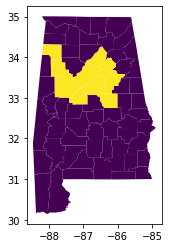

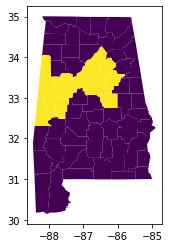

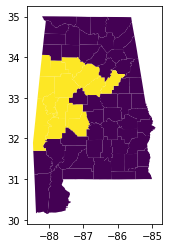

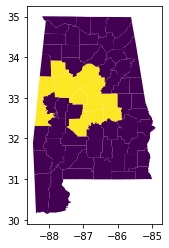

In [9]:
obj_type = 'cut_edges'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )

For objective type perimeter here are the identified maps within 10% of the incumbent objective = 10.757306052445392


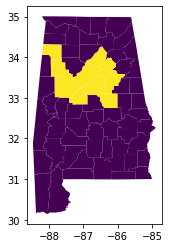

In [10]:
obj_type = 'perimeter'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )

For objective type inverse_polsby_popper here are the identified maps within 10% of the incumbent objective = 4.15960298079289


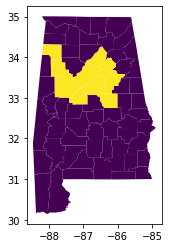

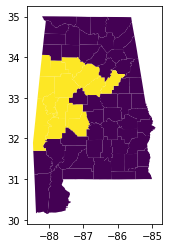

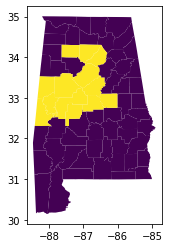

In [11]:
obj_type = 'inverse_polsby_popper'
min_obj = min( objective(G, districts[p], obj_type) for p in range(len(districts)) )
print("For objective type",obj_type,"here are the identified maps within 10% of the incumbent objective =",min_obj)
for p in range(len(districts)):
    if objective(G, districts[p], obj_type) <= 1.10 * min_obj:
        draw_single_district( filepath, filename, G, districts[p], zoom=False )